In [1]:
'''
  author : @hunarbatra
'''

import numpy as np                            
import pandas as pd                           
import matplotlib.pyplot as plt                
import seaborn as sns                           
import datetime
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# Oxford, Mobility & Healthcare Combined Dataset - Latest 
# Data upto 6th May for all variables except for Mobility which is available upto 30th April
# Dataset download link : https://drive.google.com/open?id=1kaEPXAORXkPg-AWWdBPD0nINl5jdukS8
link = '/content/drive/My Drive/Oxford_Mobility_Task6Latest.csv'
df = pd.read_csv(link, header=0, engine = 'python', parse_dates = True)
df.head()

CountryName  ... Hospital_Beds_per_10000_population
0  Afghanistan  ...                                5.0
1  Afghanistan  ...                                5.0
2  Afghanistan  ...                                5.0
3  Afghanistan  ...                                5.0
4  Afghanistan  ...                                5.0

[5 rows x 61 columns]

In [4]:
# List of Dates for Plotting - x-axis
dates = df.Date.unique()
dates = dates.tolist()
dates = dates[45:] # remove 01/01 ... 14/02
print(dates)

['2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25', '2020

In [5]:
# List of countries to iterate over
countries = df.CountryName.unique()
countries = countries.tolist()
print(countries)
print(len(countries))

['Afghanistan', 'Angola', 'Argentina', 'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Barbados', 'Belgium', 'Belize', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cameroon', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Finland', 'France', 'Gabon', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Honduras', 'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Laos', 'Lebanon', 'Libya', 'Luxembourg', 'Malaysia', 'Mali', 'Mauritius', 'Mexico', 'Moldova', 'Mongolia', 'Mozambique', 'Namibia', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Rwanda', 'Saudi Arabia', 'Serbia', 'Singapore', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka',

In [0]:
def plot_country(country_name) :
  data = df.loc[df['CountryName'] == country_name] # 01/01 ... 06/05
  data = data.iloc[45:] # remove 01/01 ... 14/02

  # Baseline for the healthcare variables
  nurses_baseline = data['Daily_Nurses_per_10000'].tolist()
  nurses_baseline = nurses_baseline[0]
  doctors_baseline = data['Daily_Medical_Doctors_per_10000'].tolist()
  doctors_baseline = doctors_baseline[0]
  beds_baseline = data['Daily_Hospital_Beds_per_10000'].tolist()
  beds_baseline = beds_baseline[0]

  population = data['population'].tolist()
  country_population = population[0]

  fig, ax = plt.subplots(figsize=(30,12))

  nurses_data = data['Daily_Nurses_per_10000'].tolist()
  daily_nurses = [None] * 82
  daily_nurses[0] = 0
  for i in range(1, len(daily_nurses)) : 
    daily_nurses[i] = (nurses_data[i] - nurses_baseline)/nurses_baseline * 100
  plt.scatter(dates, daily_nurses, marker = 'o', label = 'Daily Nurses/10k') 

  doctors_data = data['Daily_Medical_Doctors_per_10000'].tolist()
  daily_doctors = [None] * 82
  daily_doctors[0] = 0
  for i in range(1, len(daily_doctors)) : 
    daily_doctors[i] = (doctors_data[i] - doctors_baseline)/doctors_baseline * 100
  plt.scatter(dates, daily_doctors, marker = 'o', label = 'Daily Doctors/10k') 

  beds_data = data['Daily_Hospital_Beds_per_10000'].tolist()
  daily_beds = [None] * 82
  daily_beds[0] = 0
  for i in range(1, len(daily_beds)) : 
    daily_beds[i] = (beds_data[i] - beds_baseline)/beds_baseline * 100
  plt.scatter(dates, daily_beds, marker = 'o', label = 'Daily Beds/10k')

  plt.scatter(dates, data.Daily_RecoveryCases/country_population * 10000, marker = 'o', label = 'Normalised Recovered Cases', color = 'red')

  plt.title(country_name)
  plt.grid(True)
  plt.xlabel("Dates")
  plt.ylabel("Value")
  plt.legend(loc="best")
  plt.axis('tight')
  plt.style.context('seaborn-white')
  plt.xticks(rotation=90)
  plt.show()

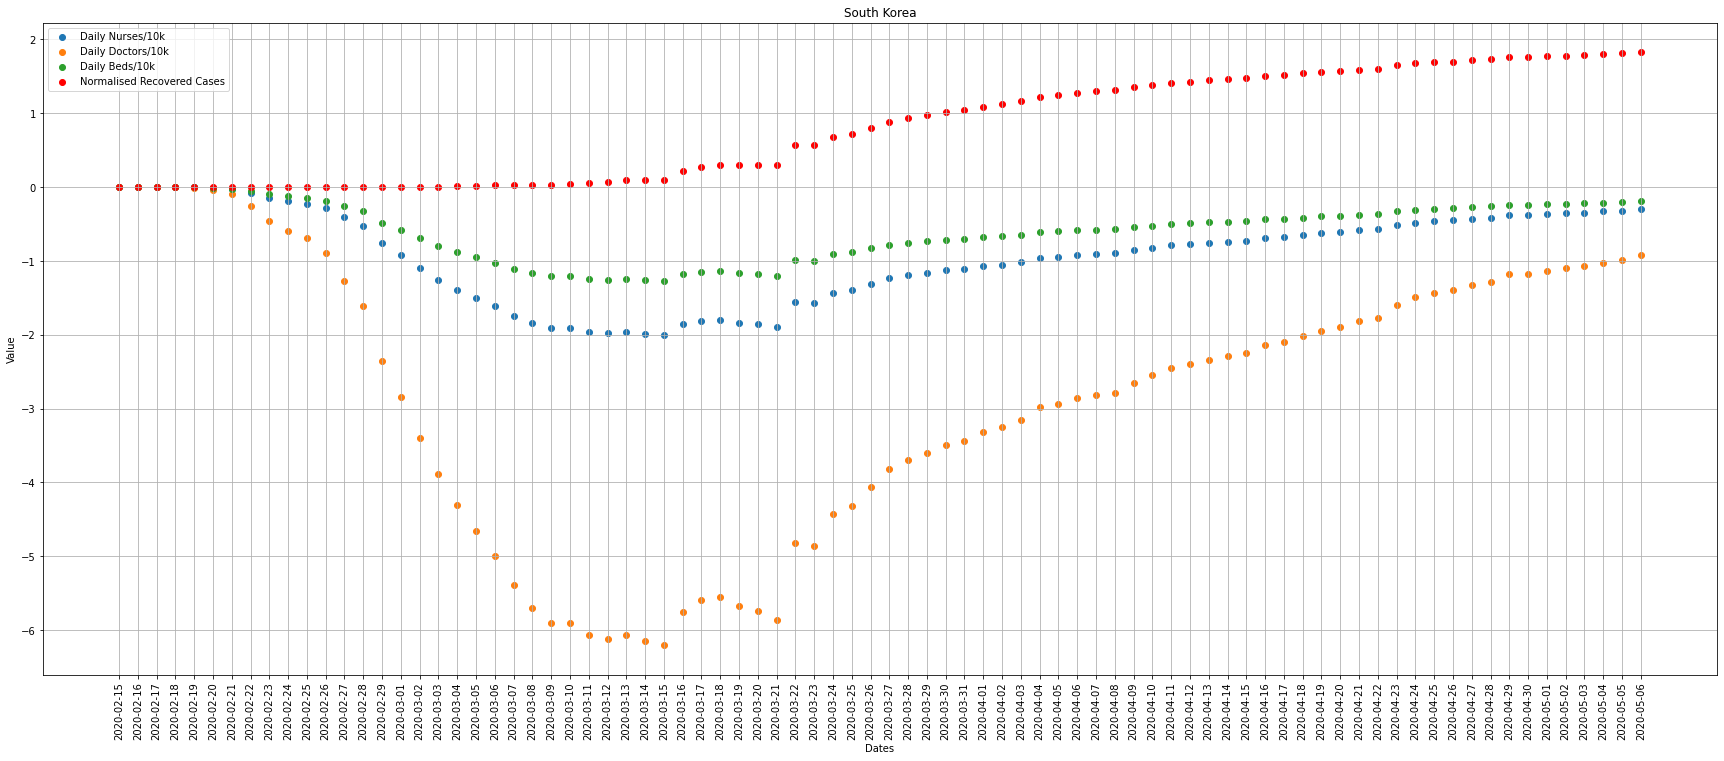

In [7]:
plot_country('South Korea')

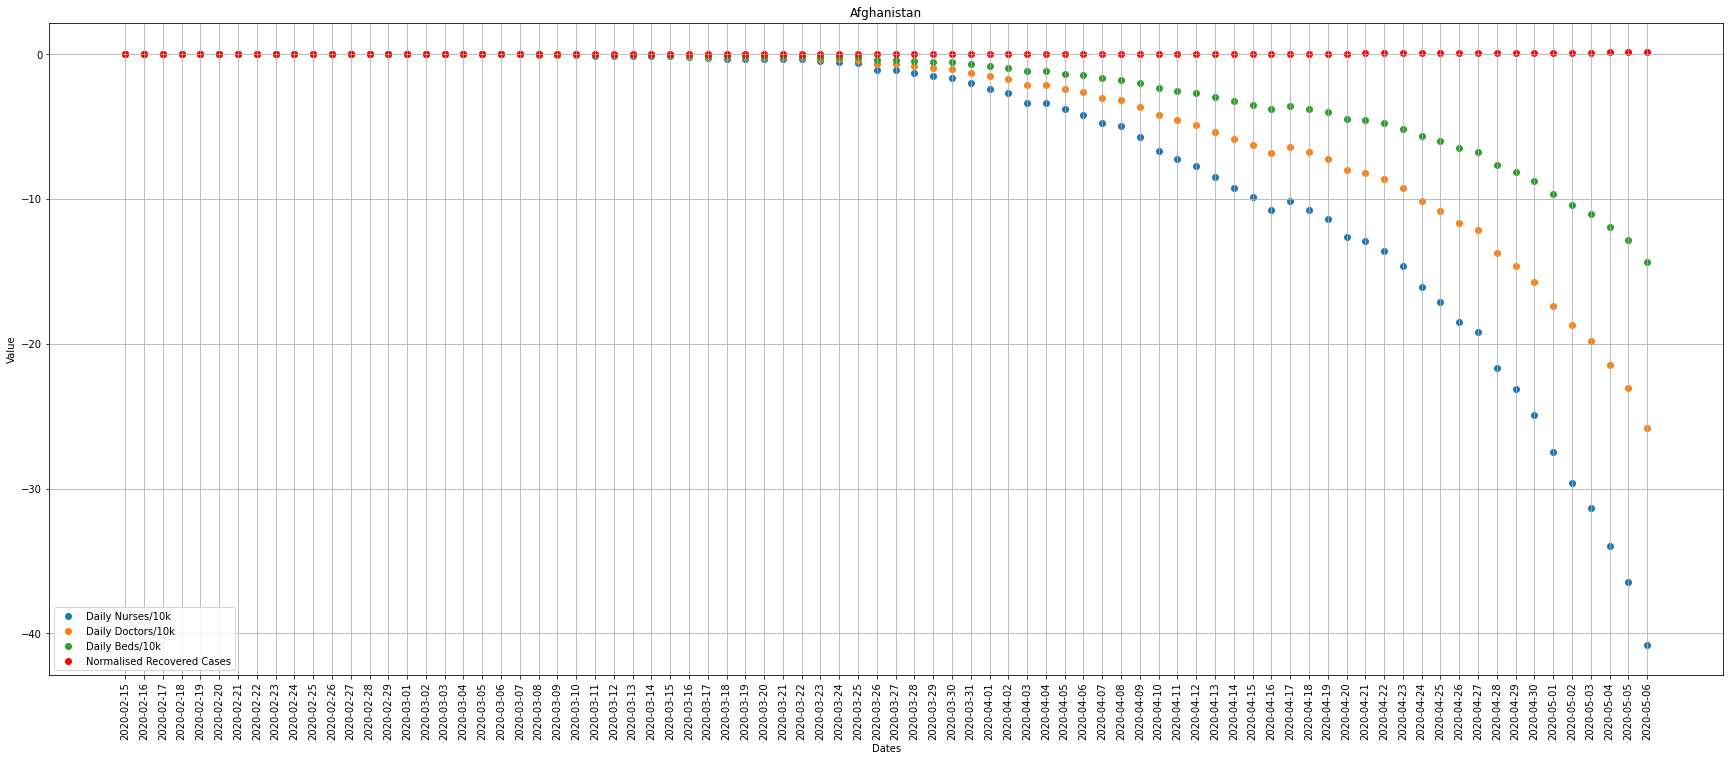

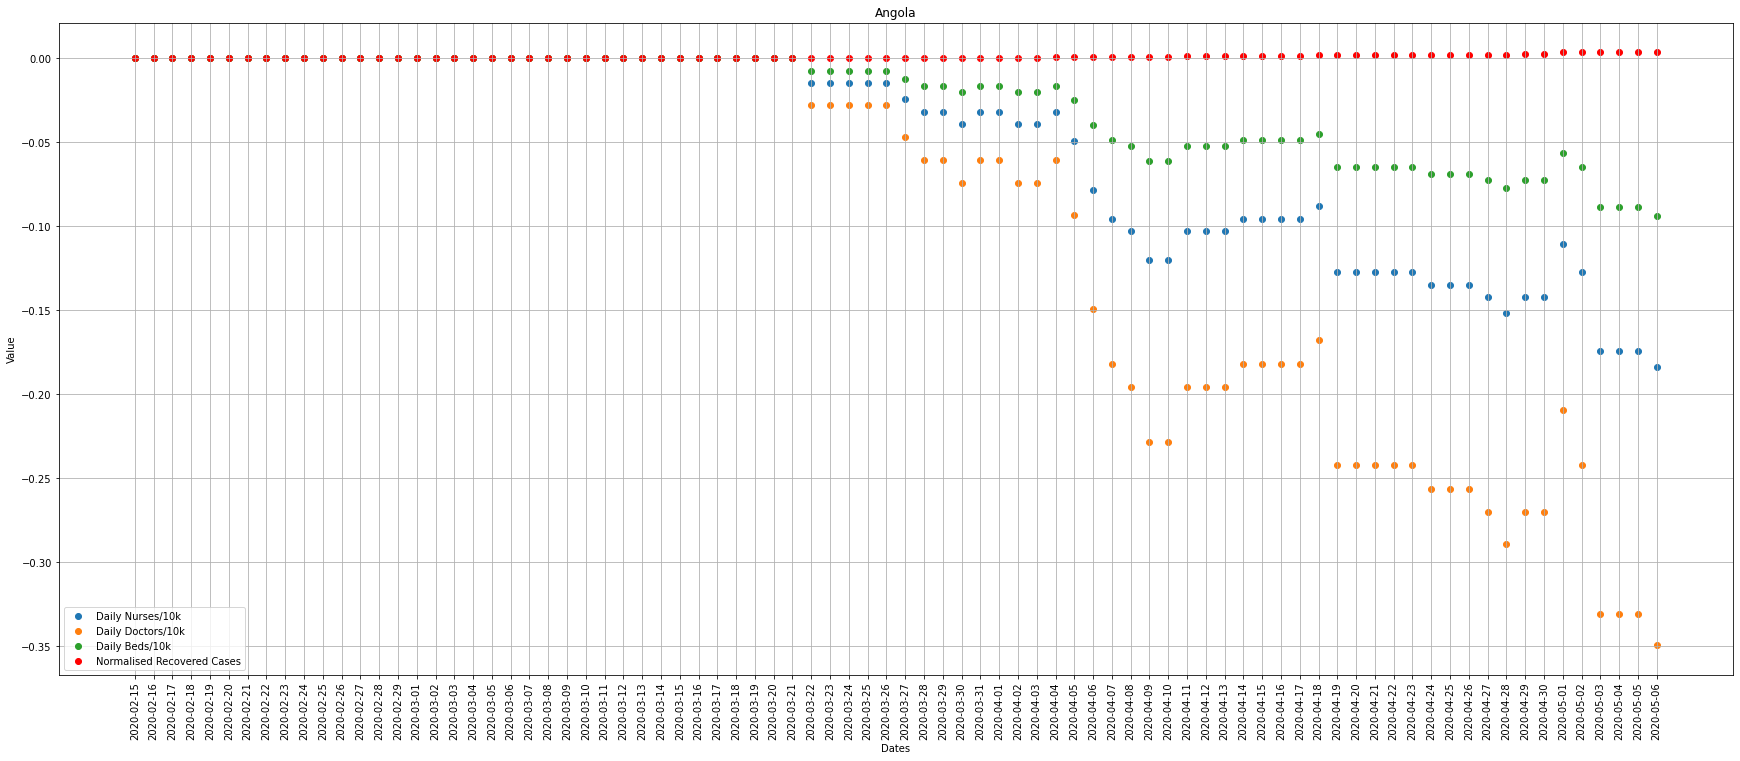

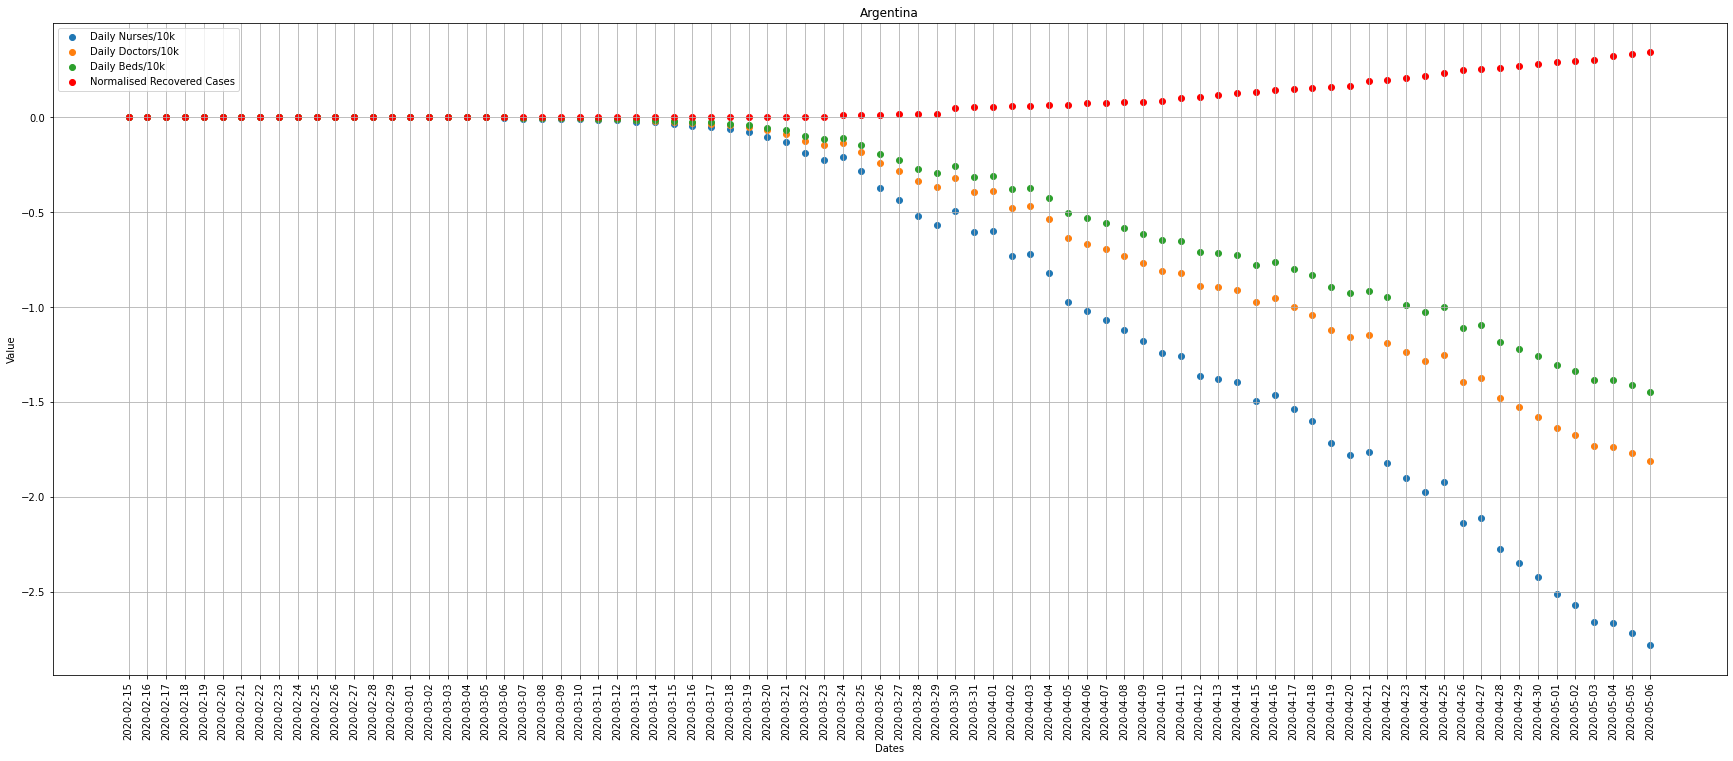

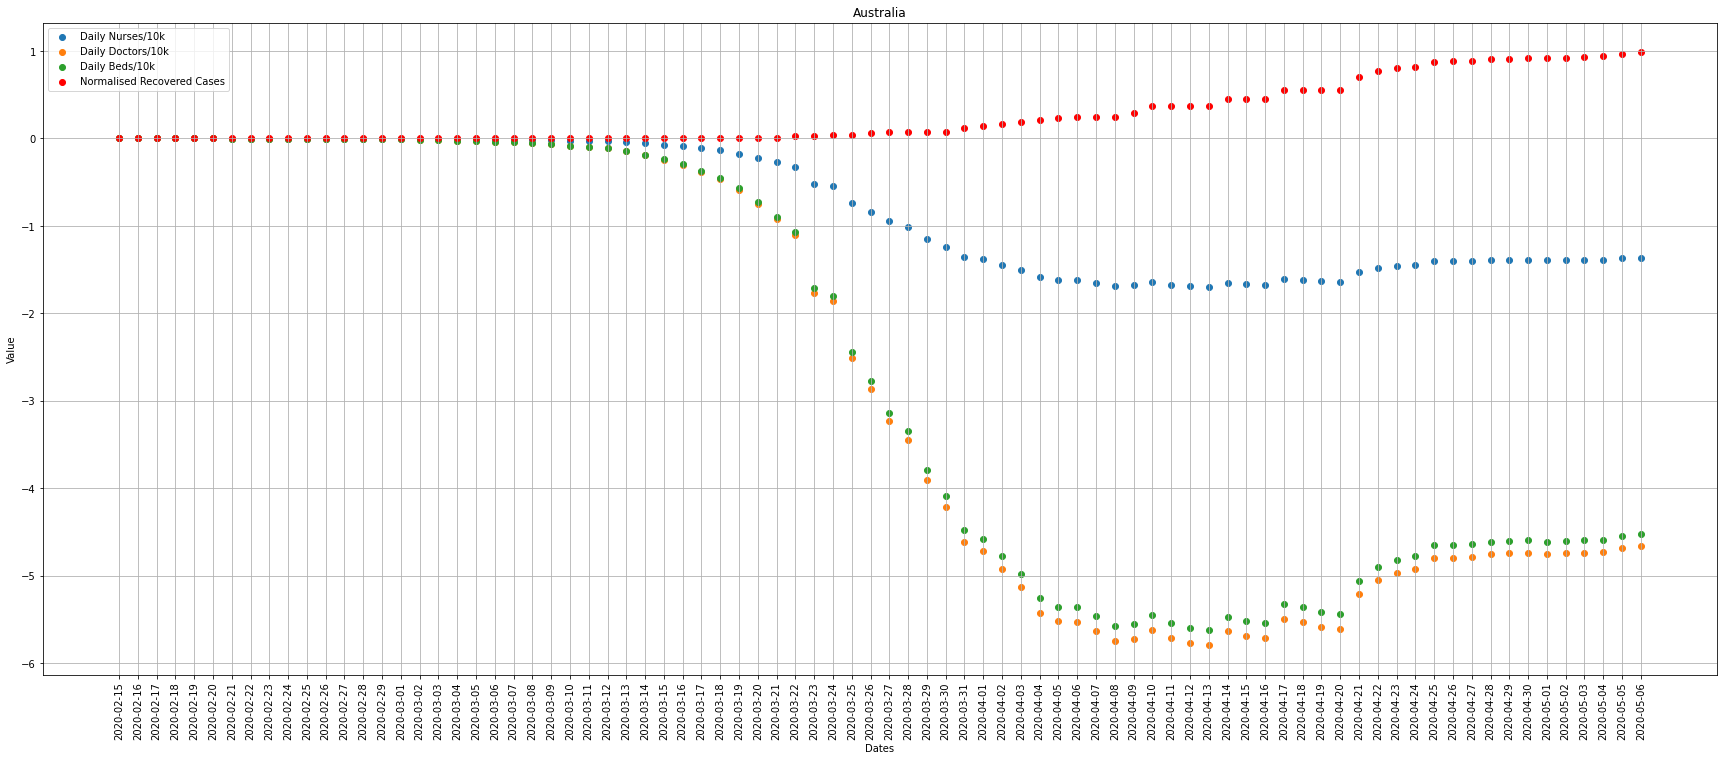

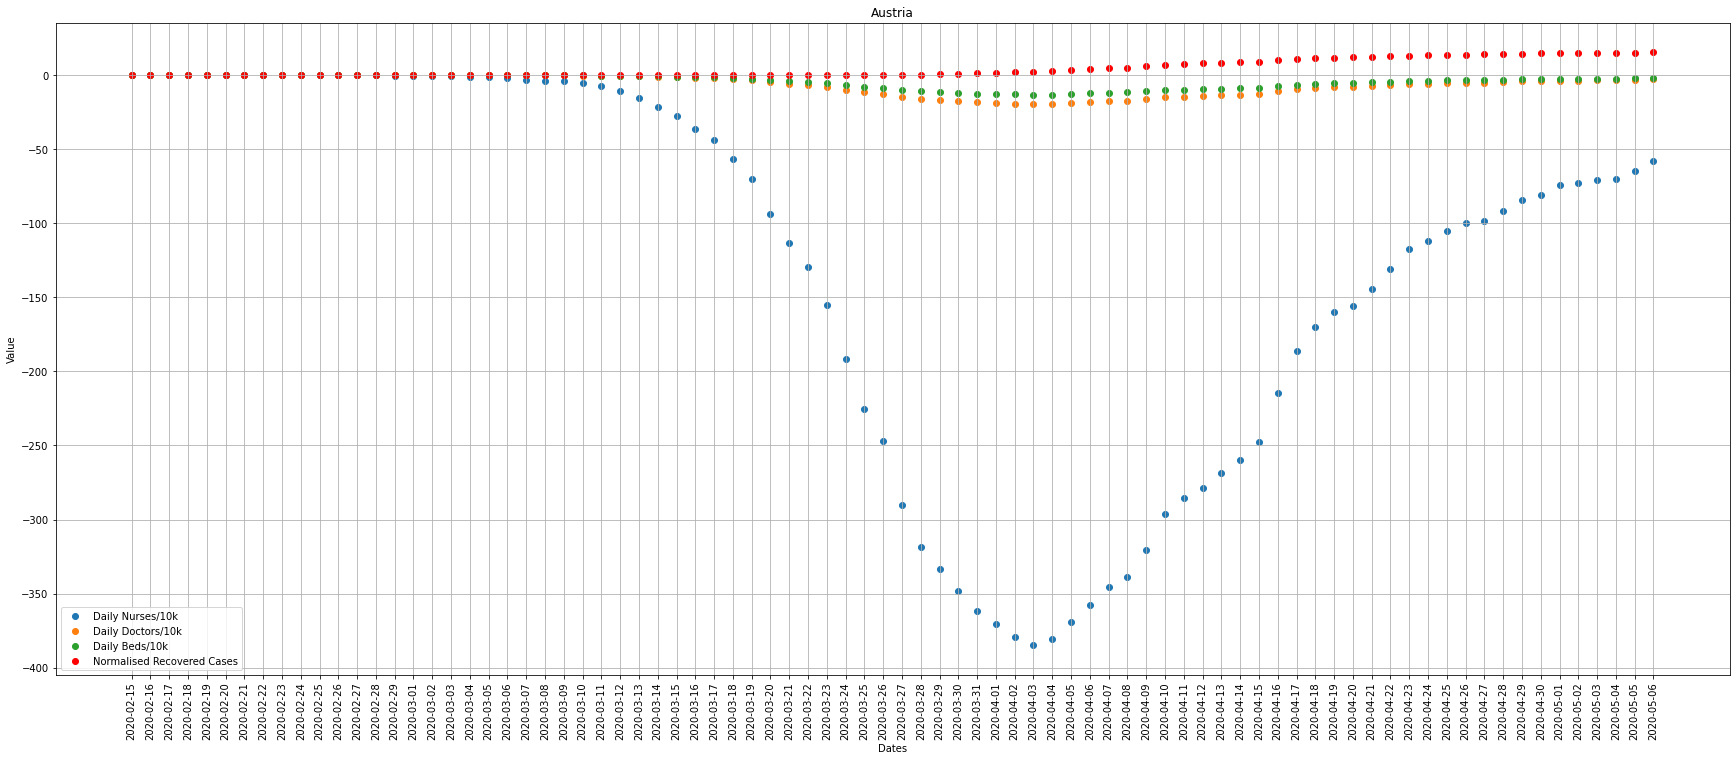

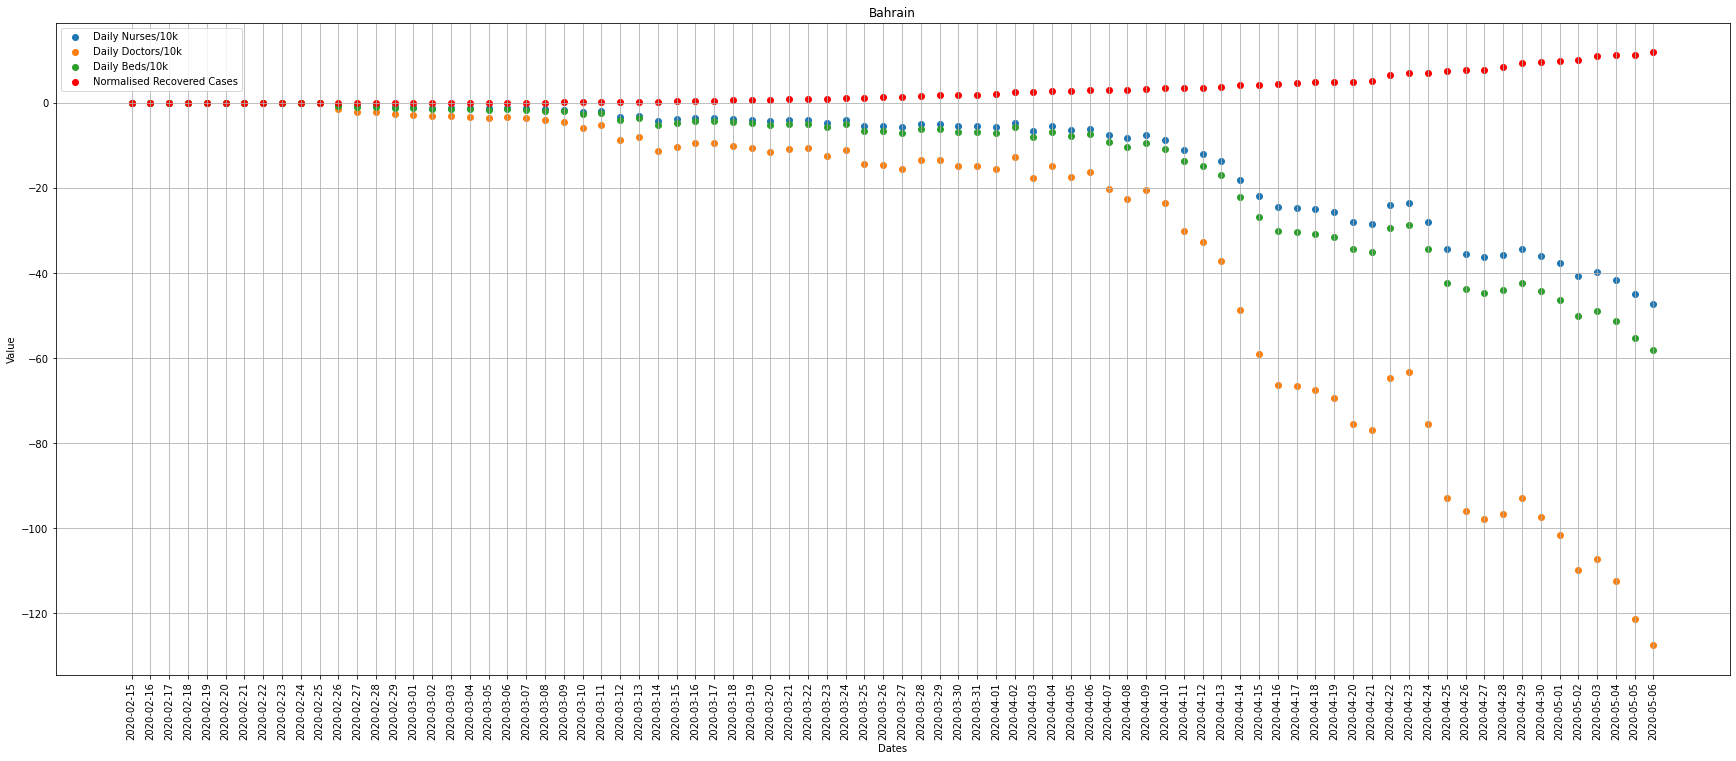

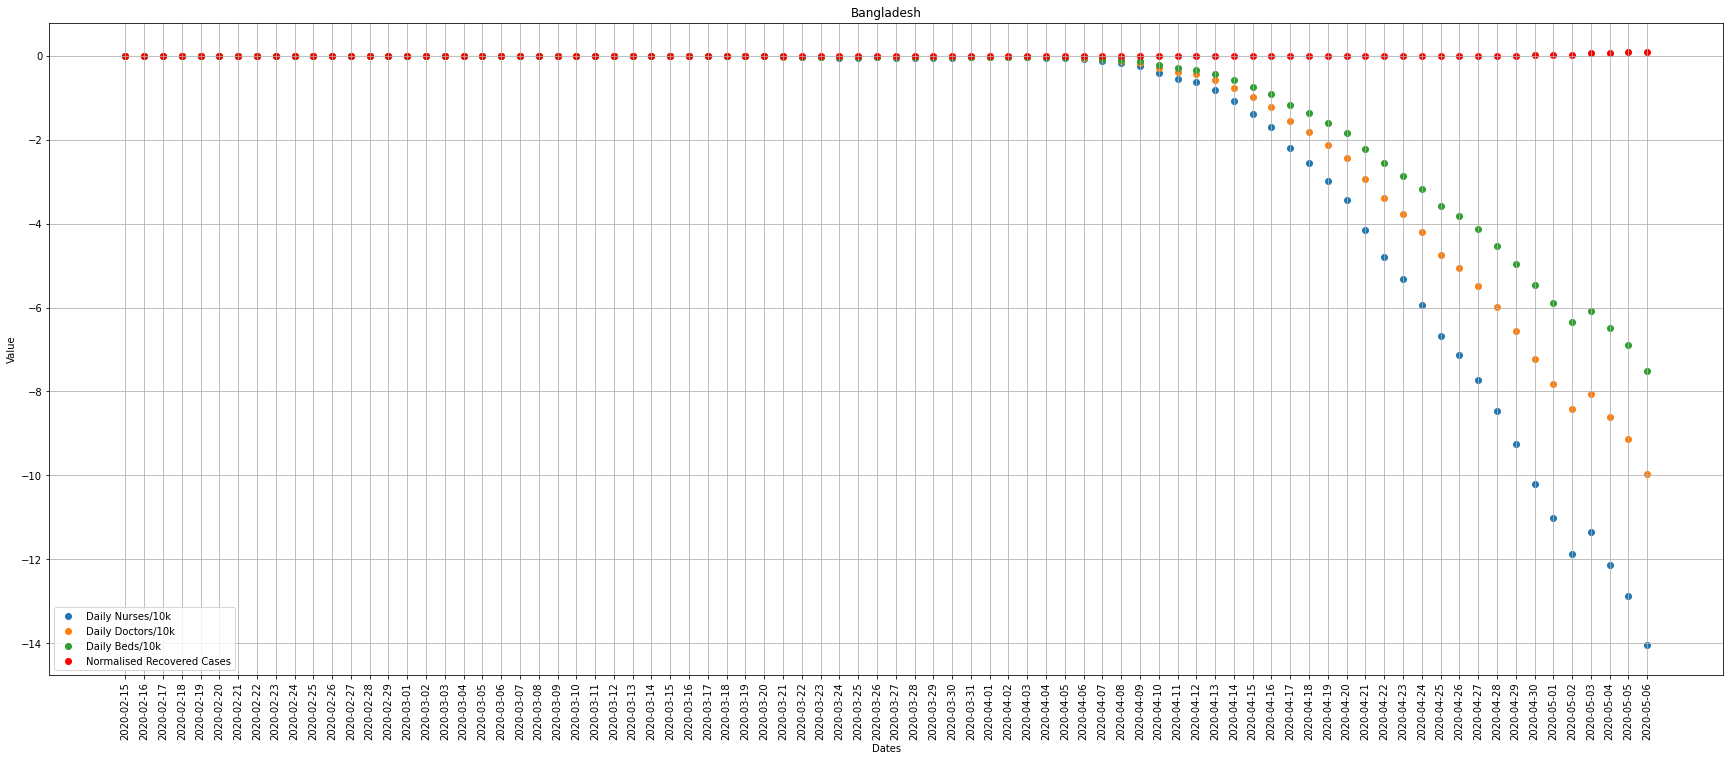

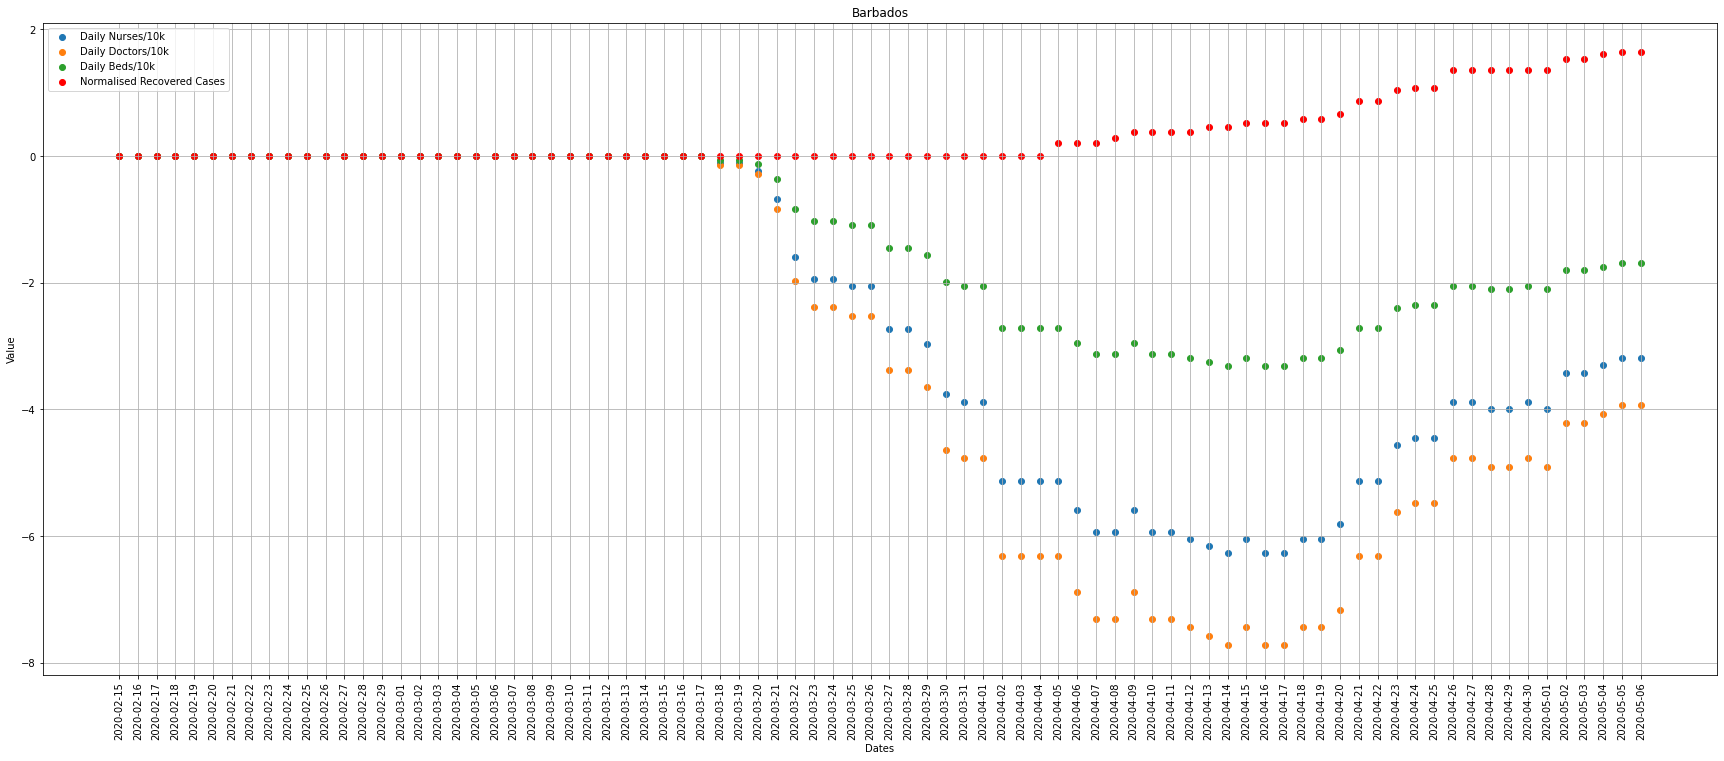

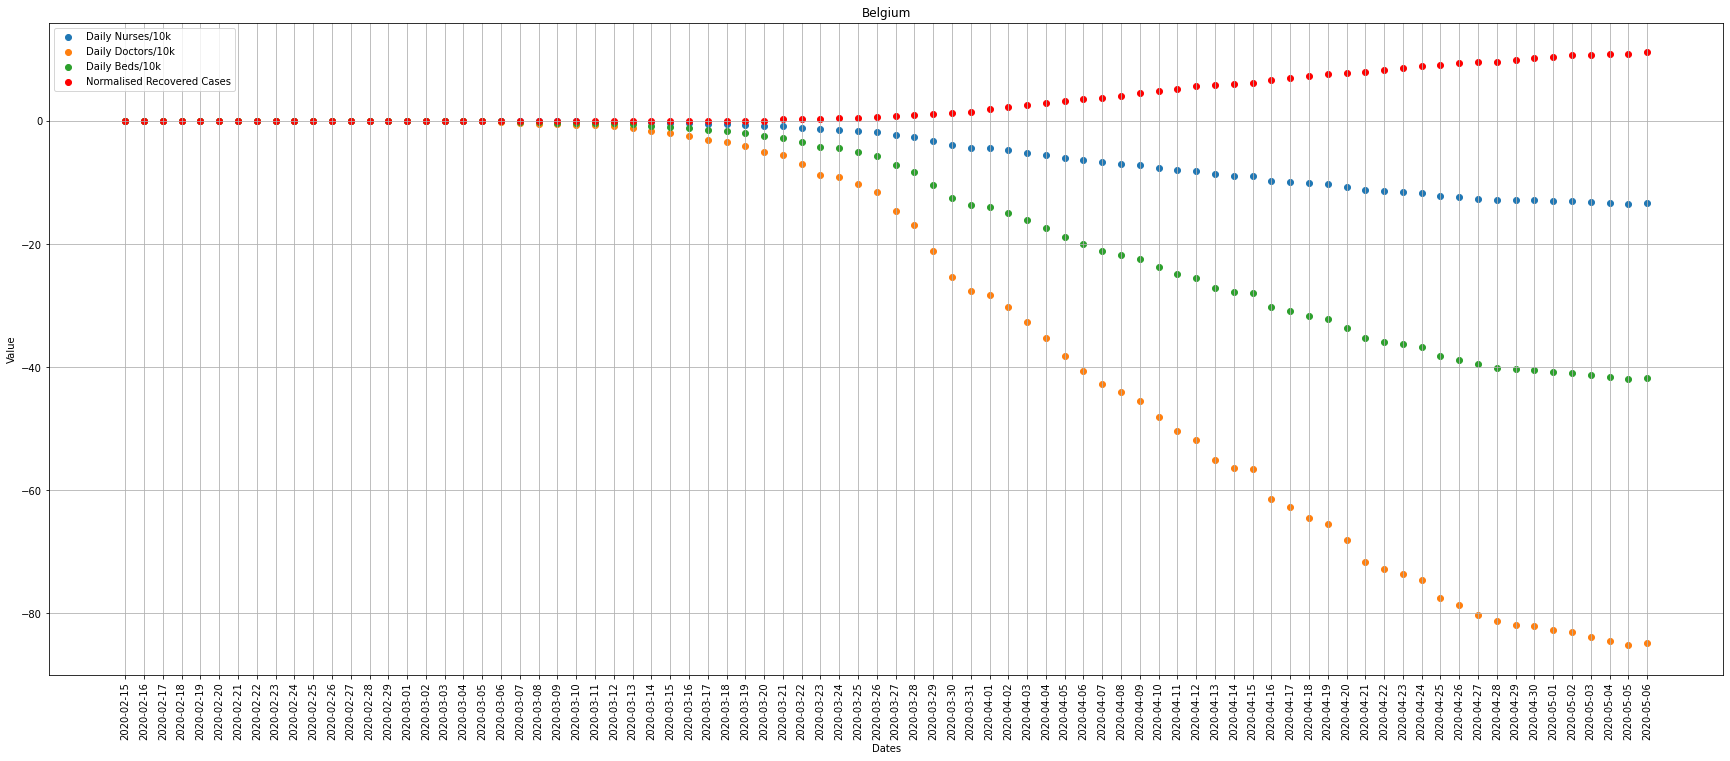

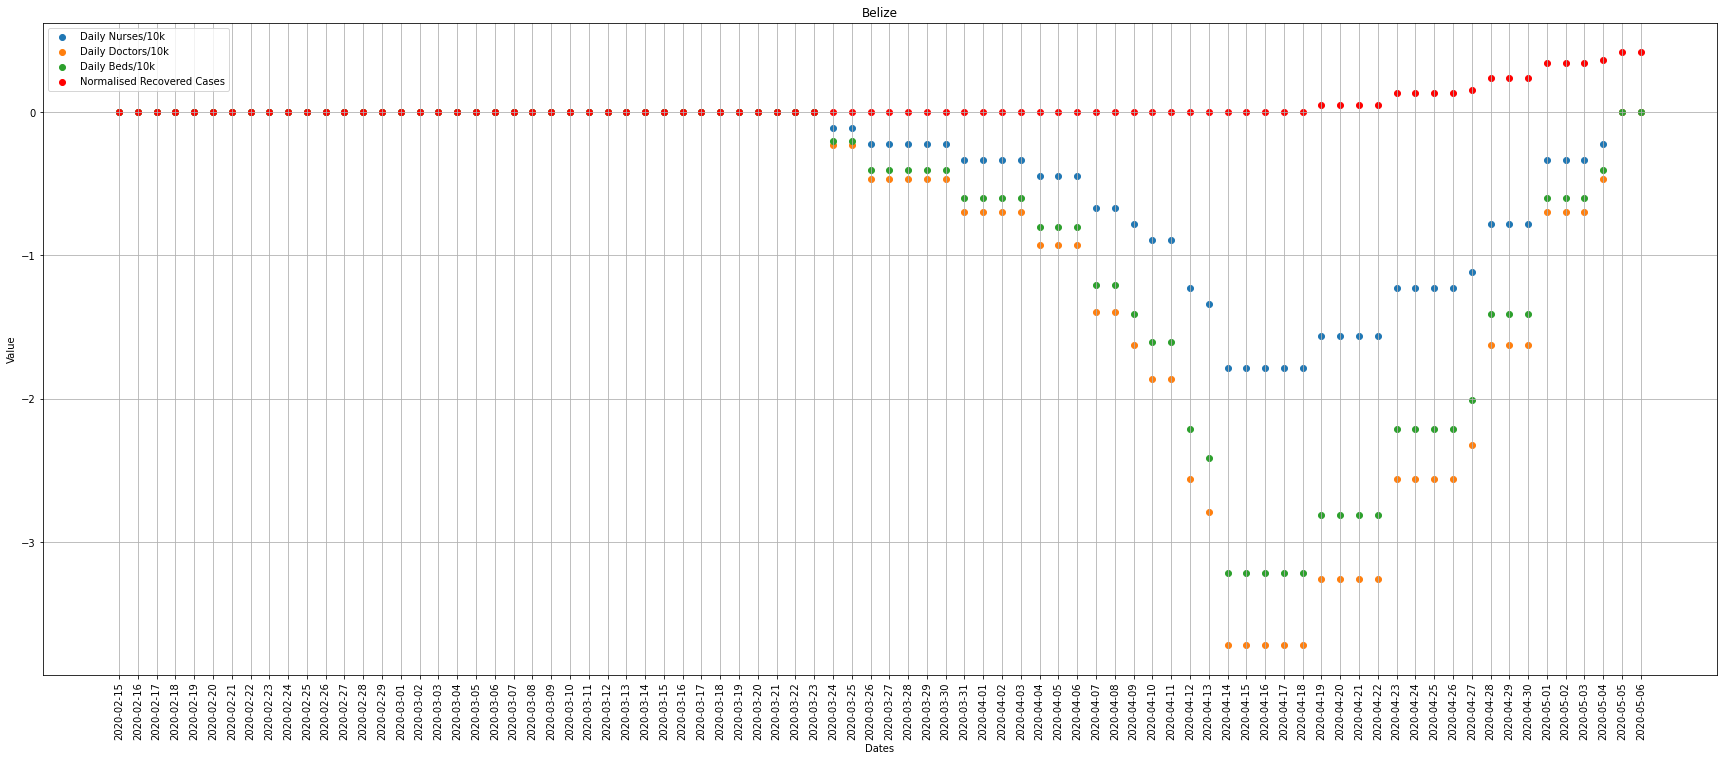

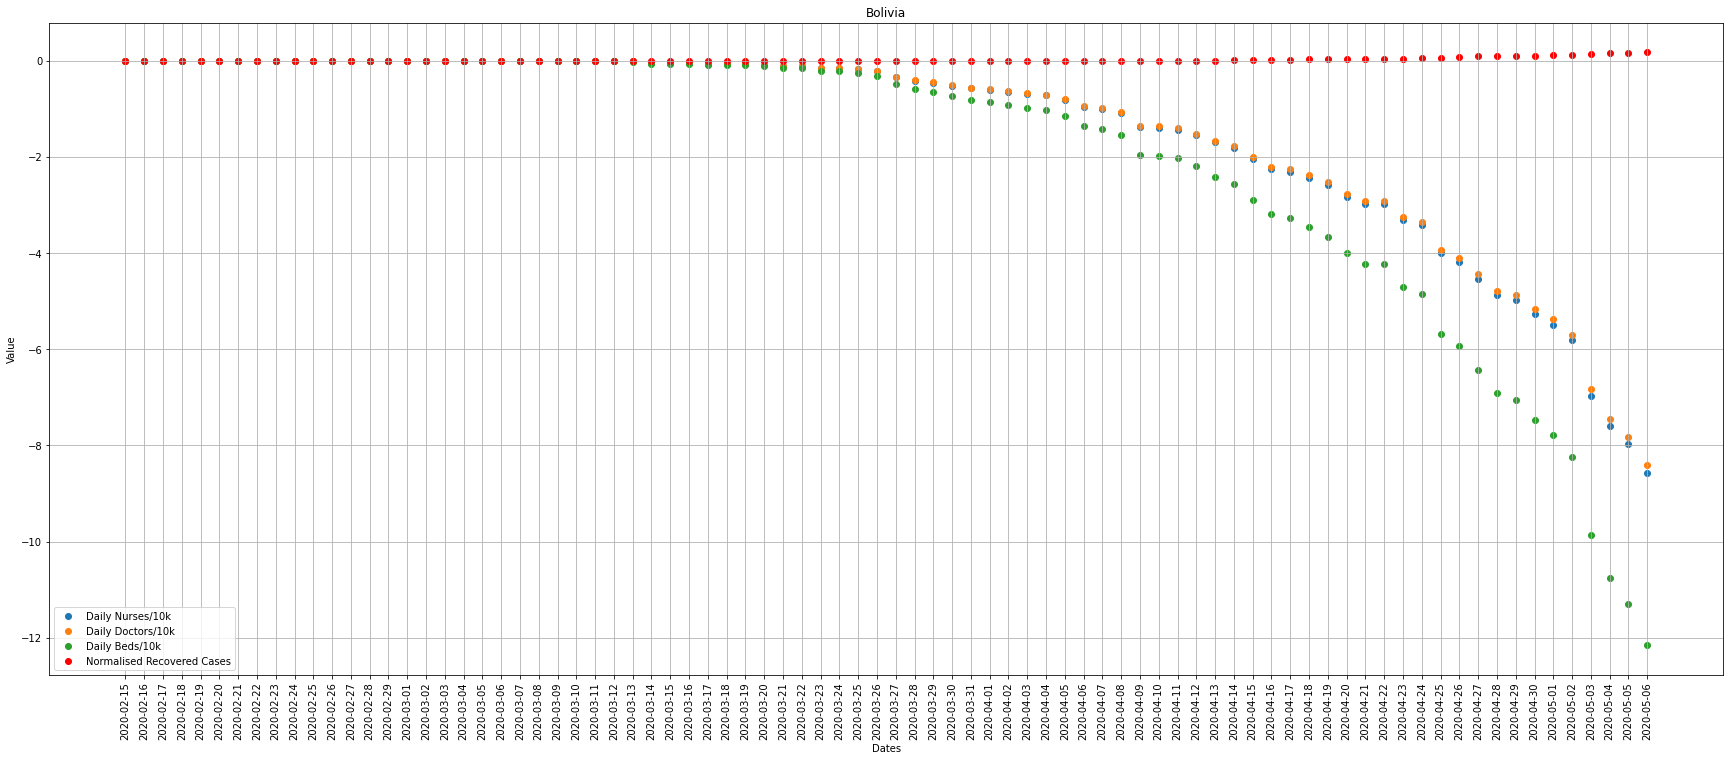

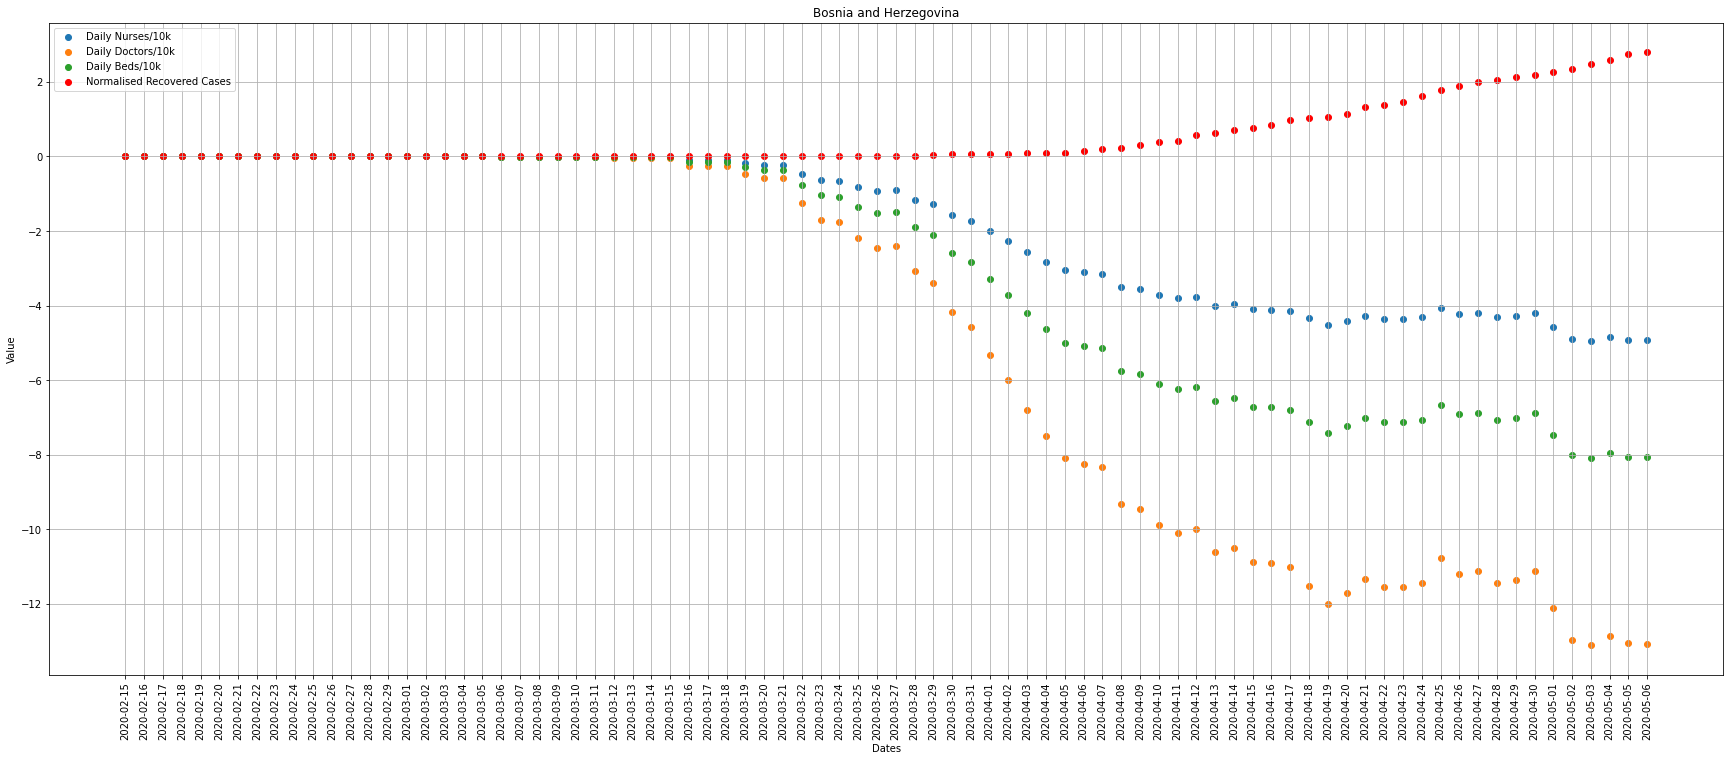

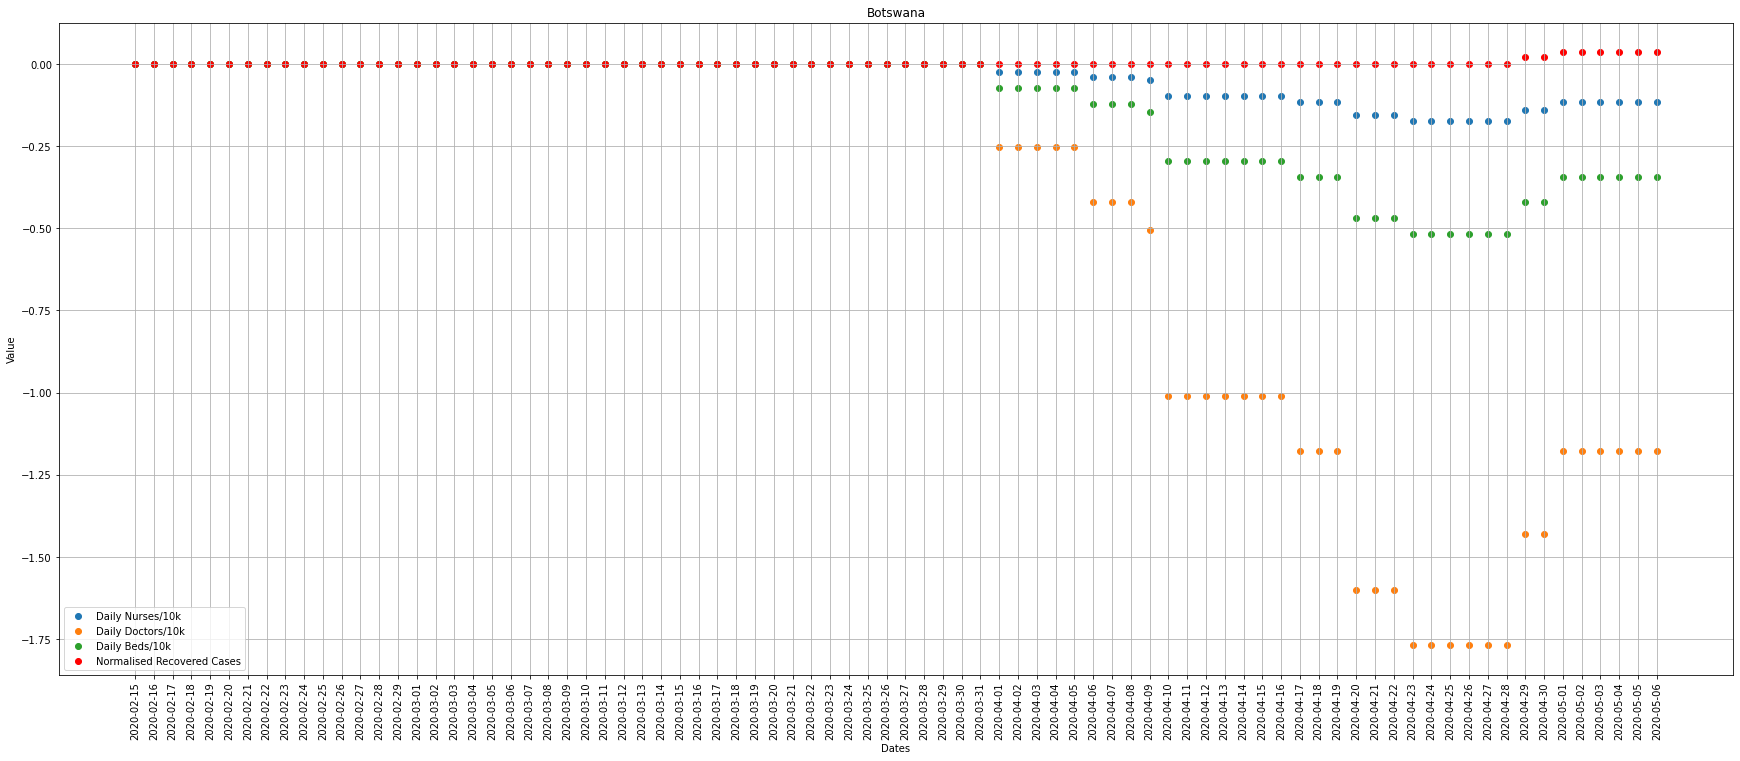

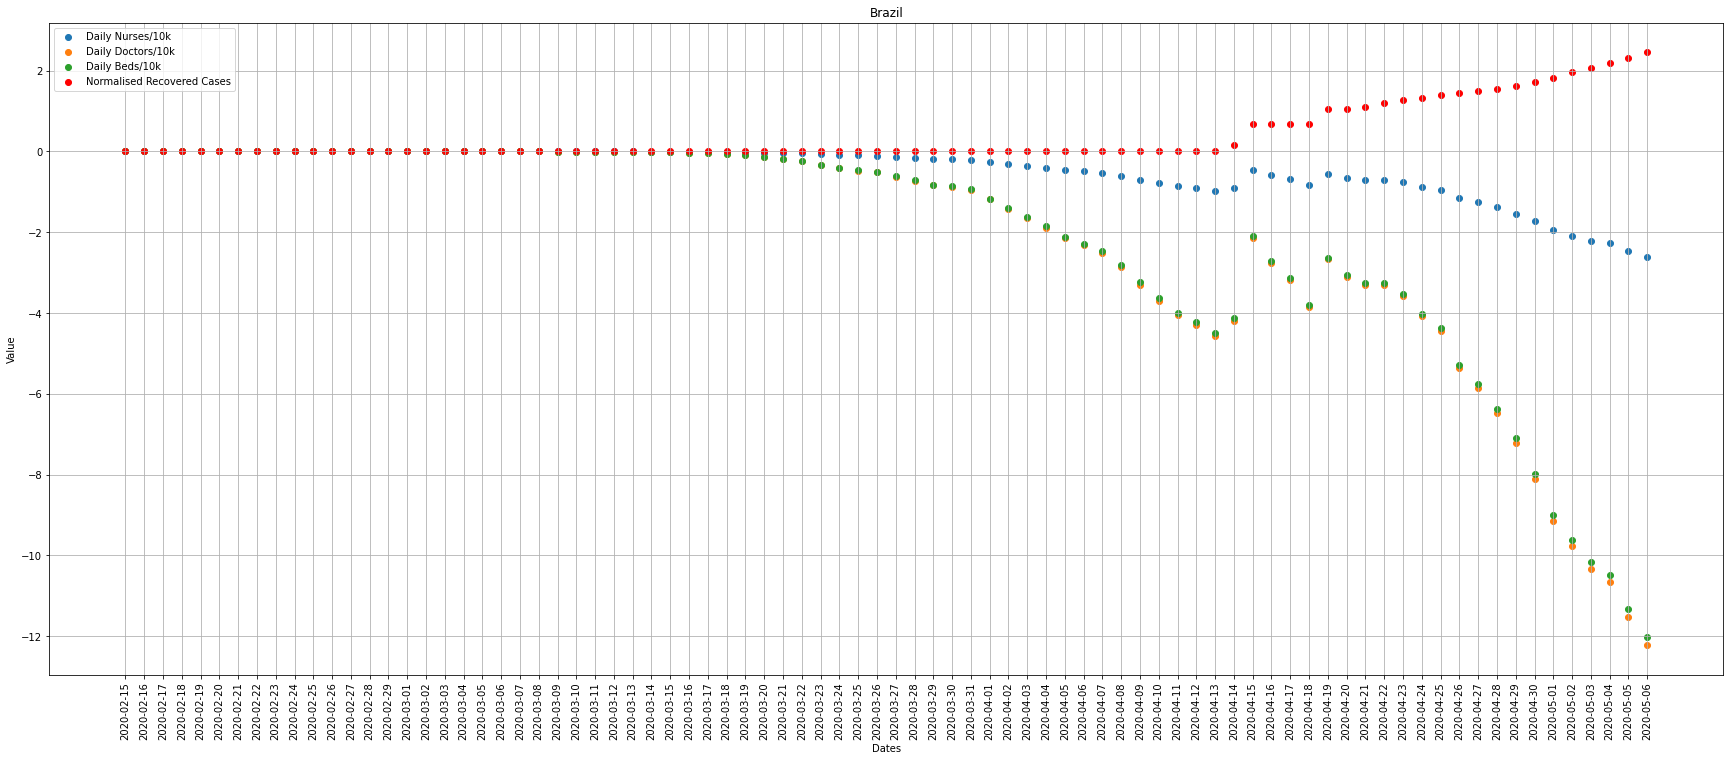

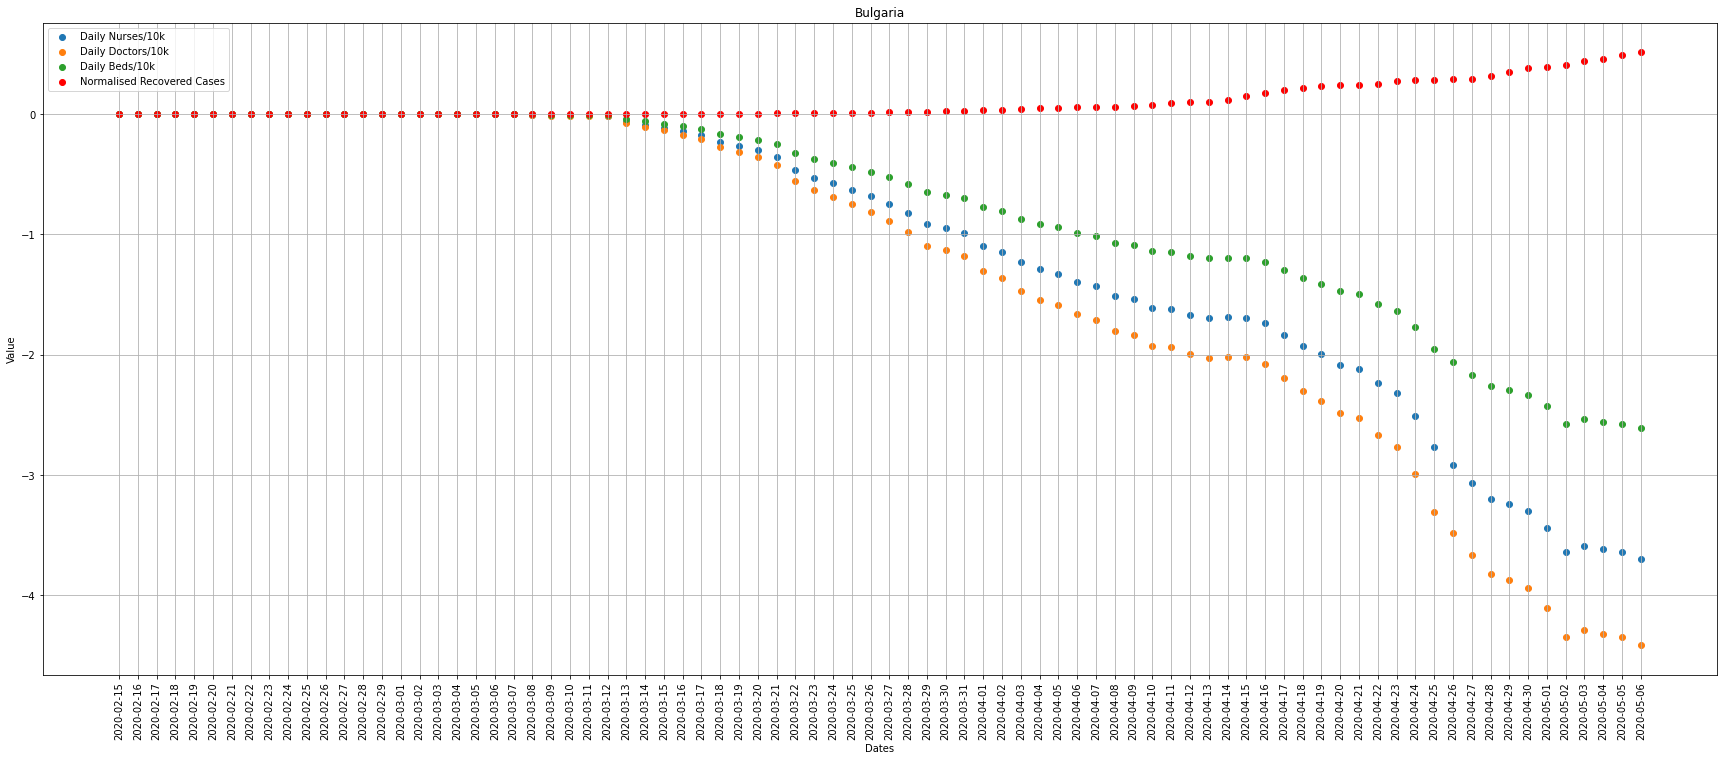

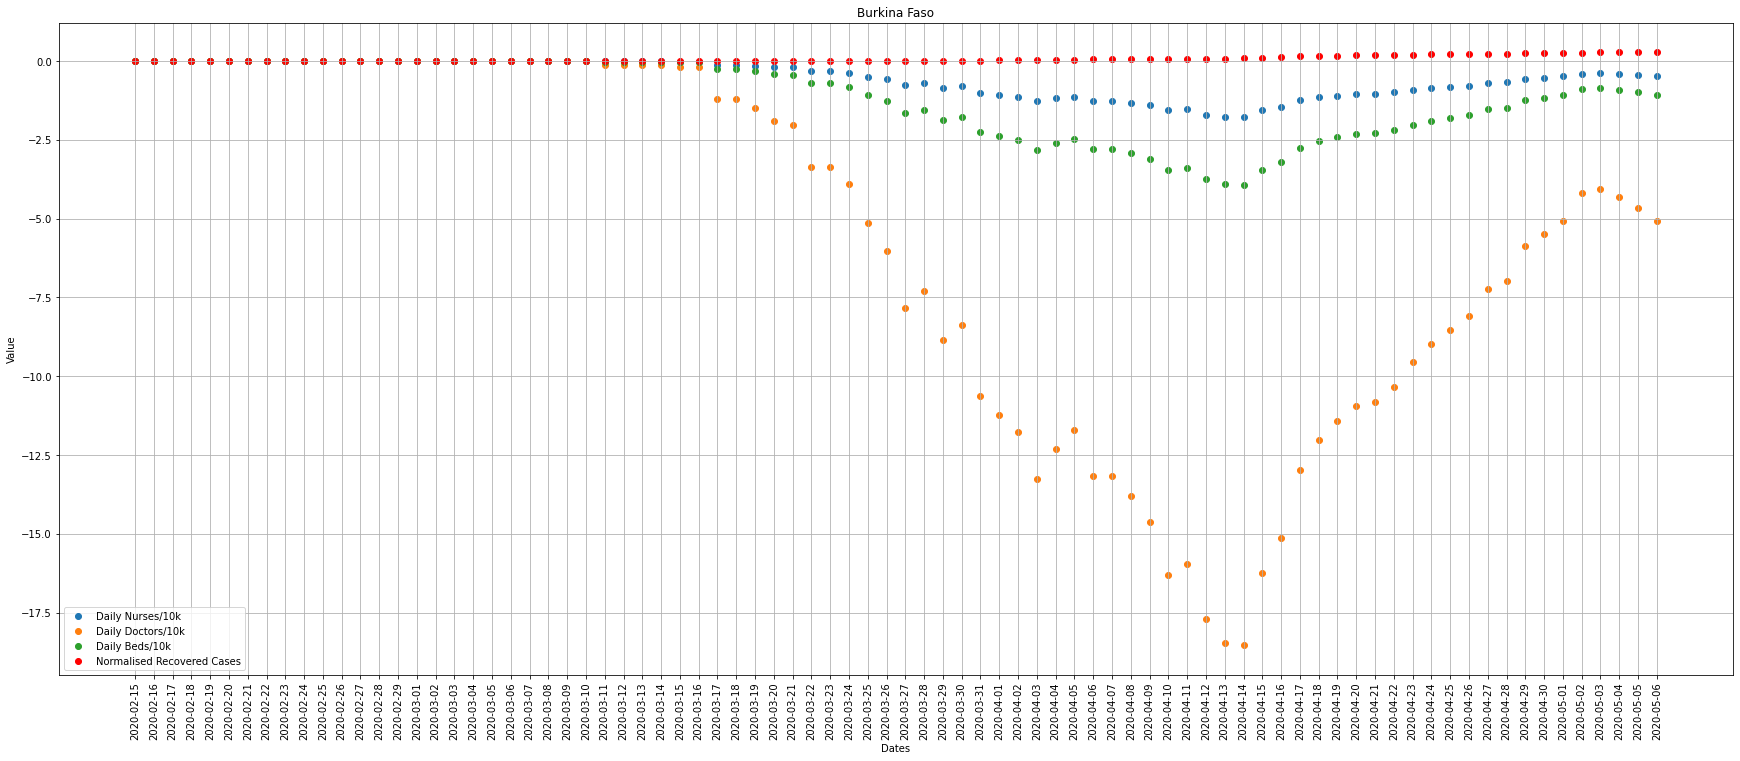

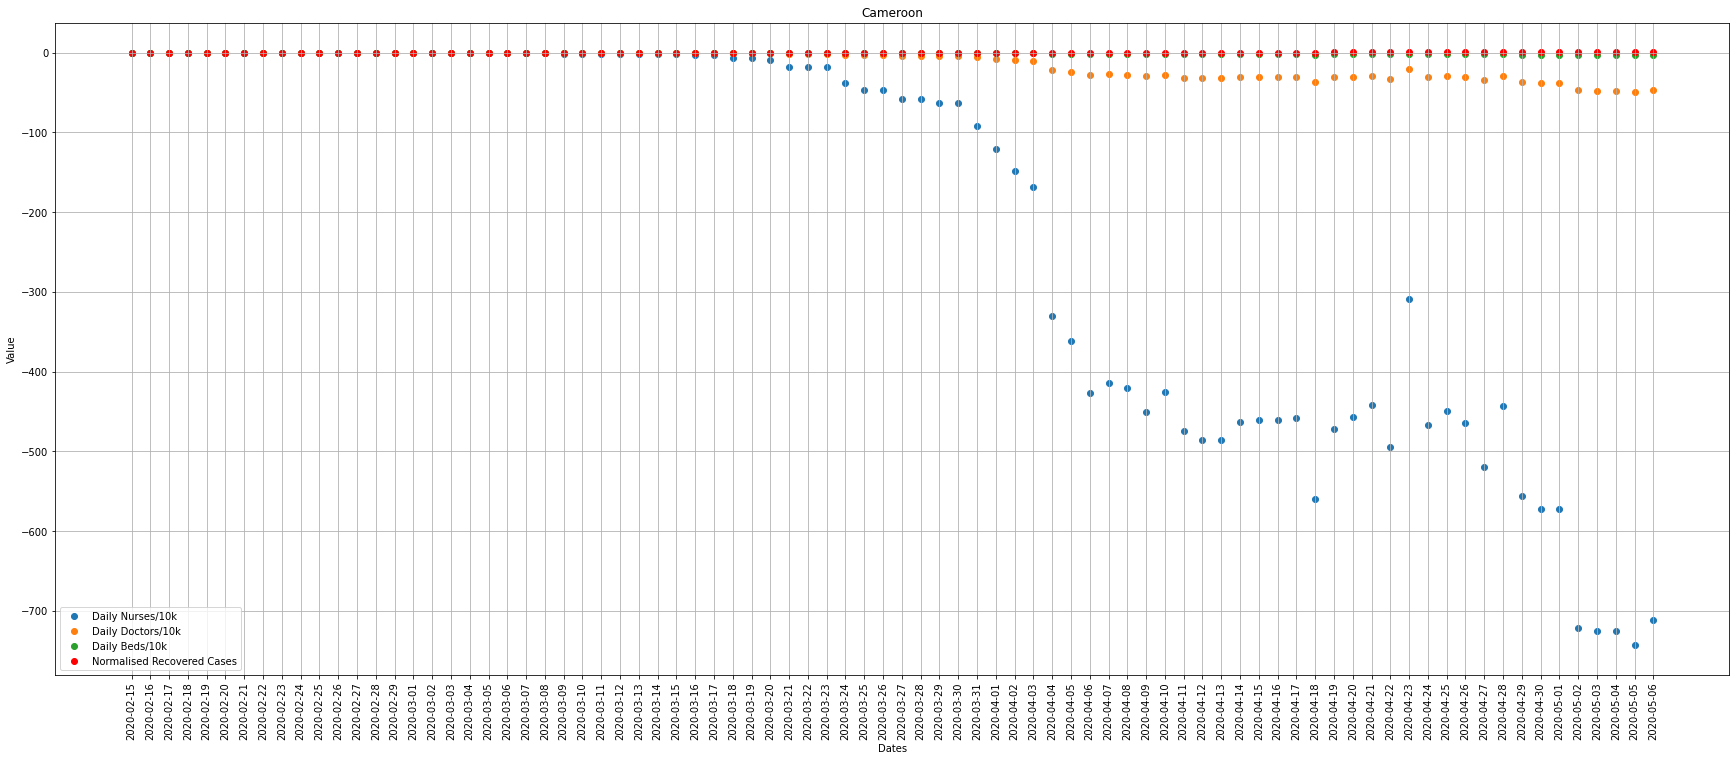

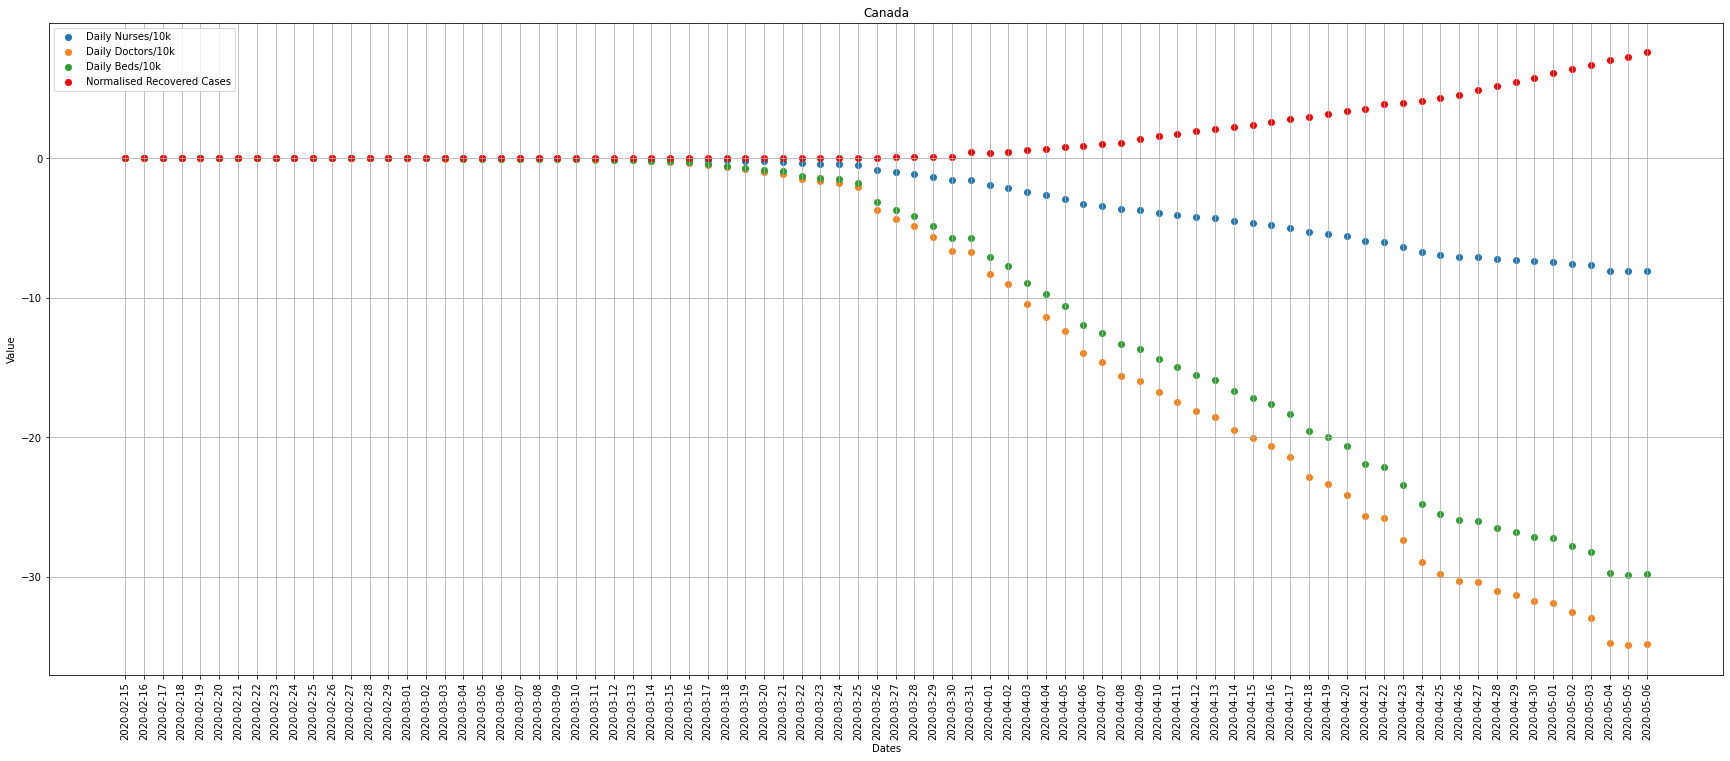

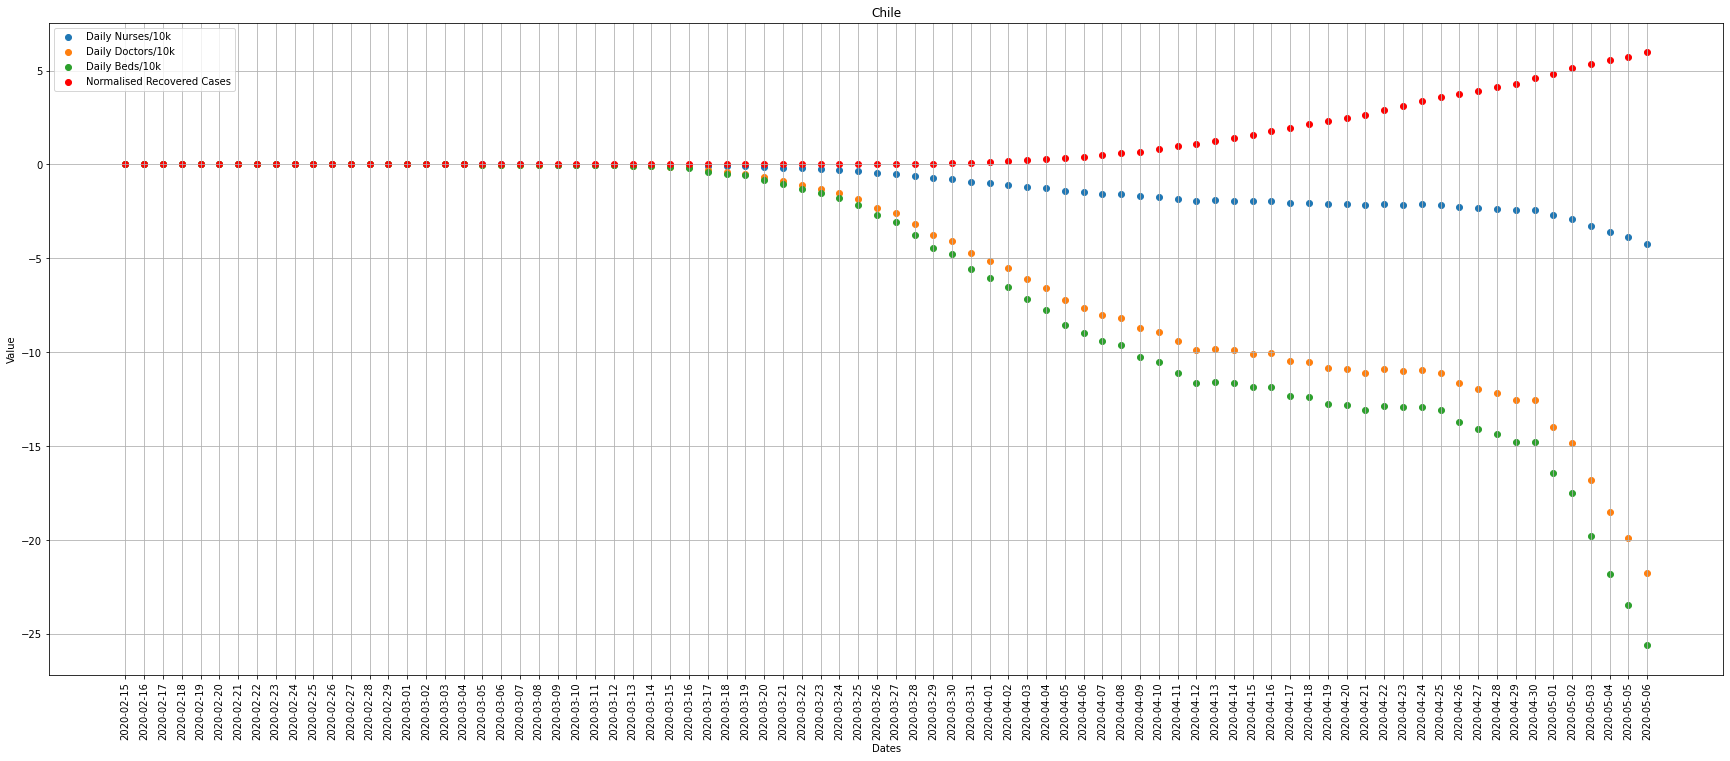

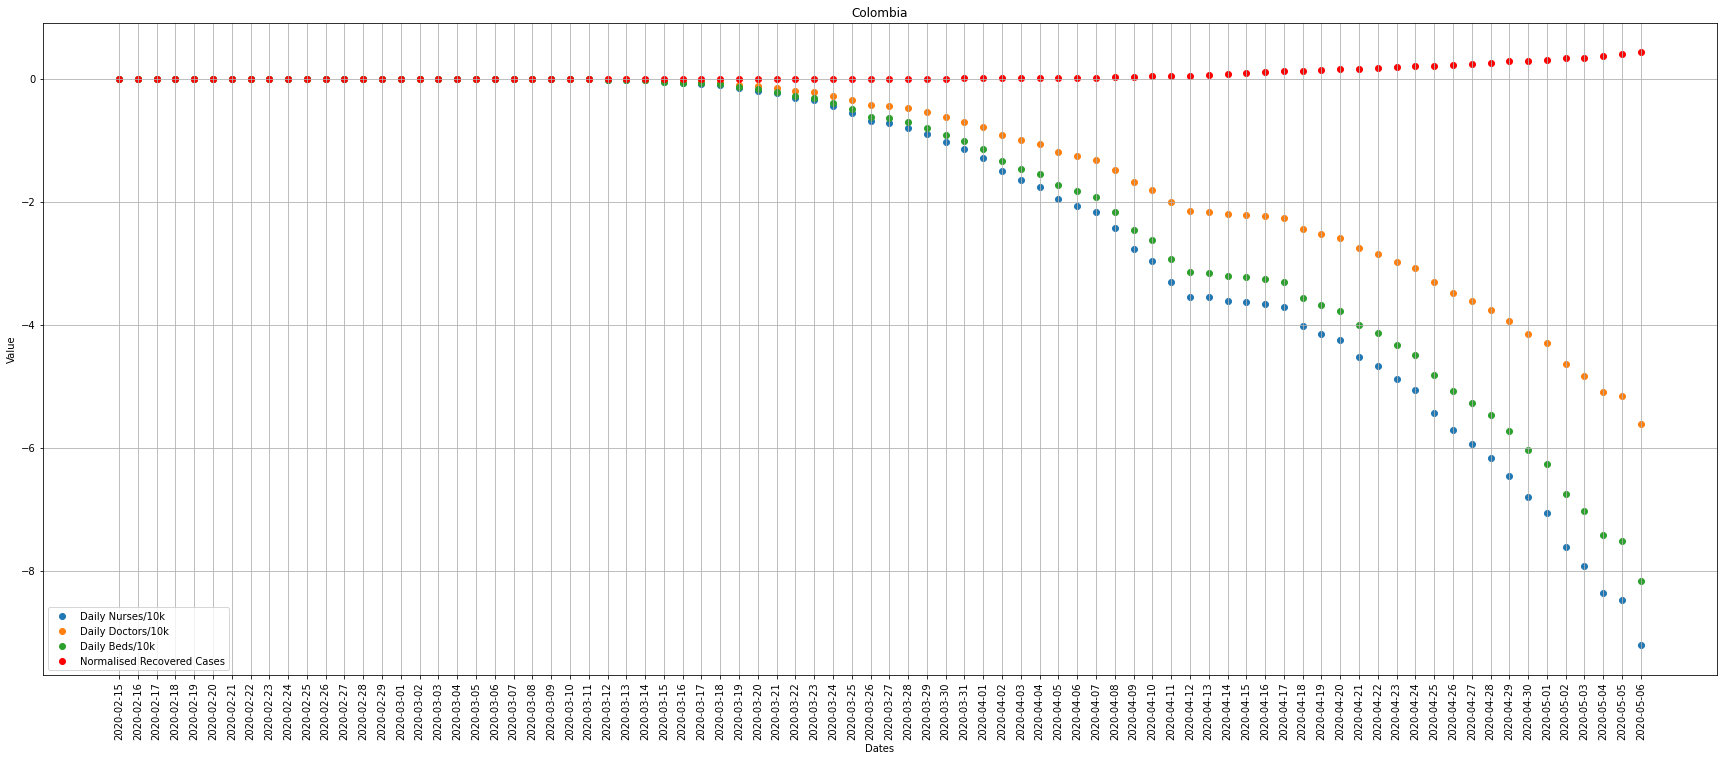

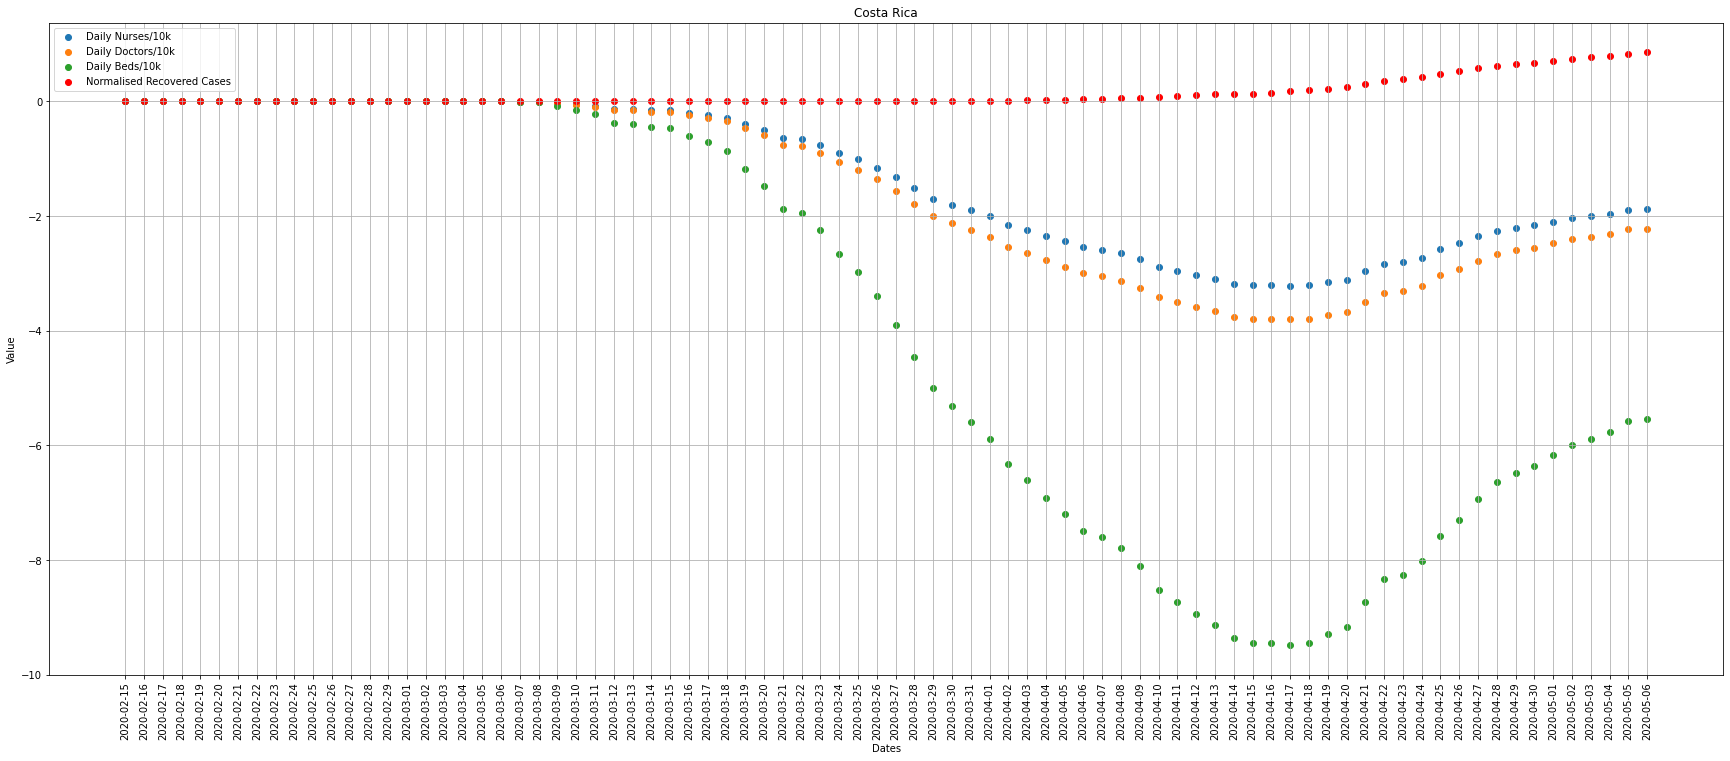

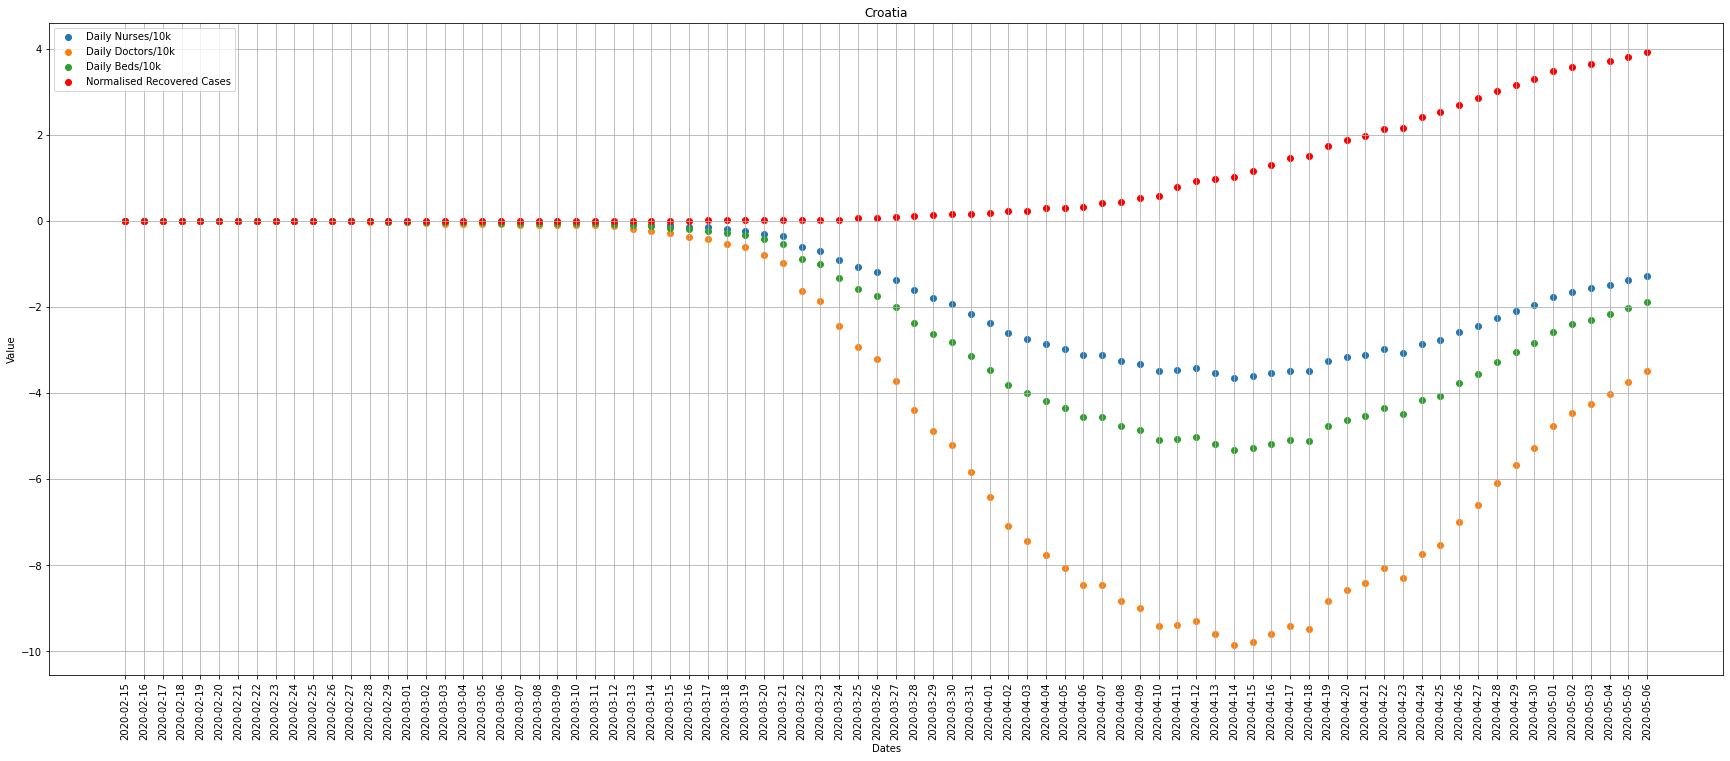

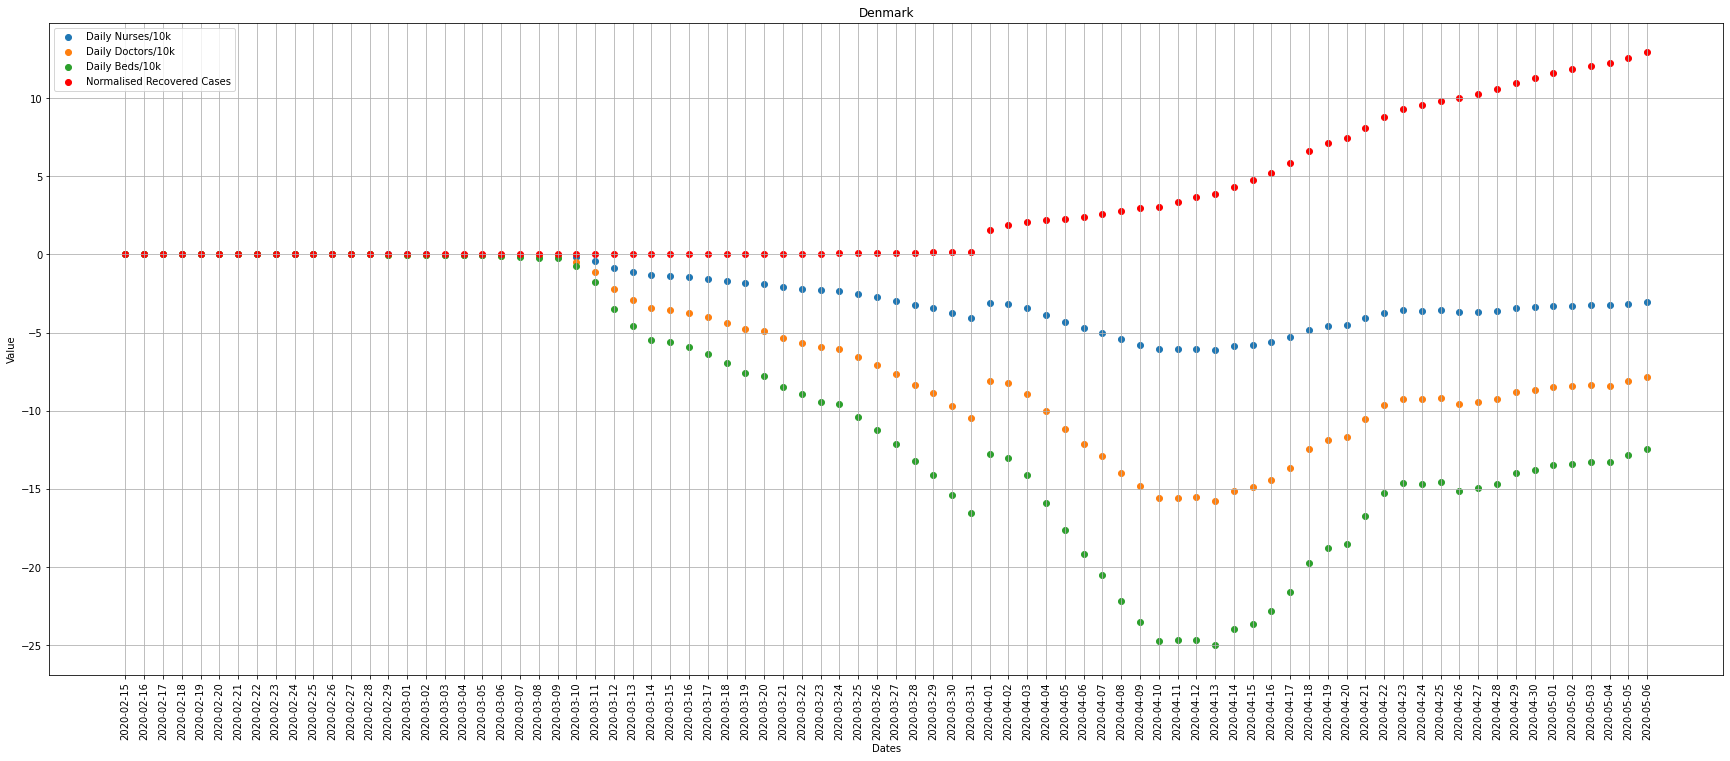

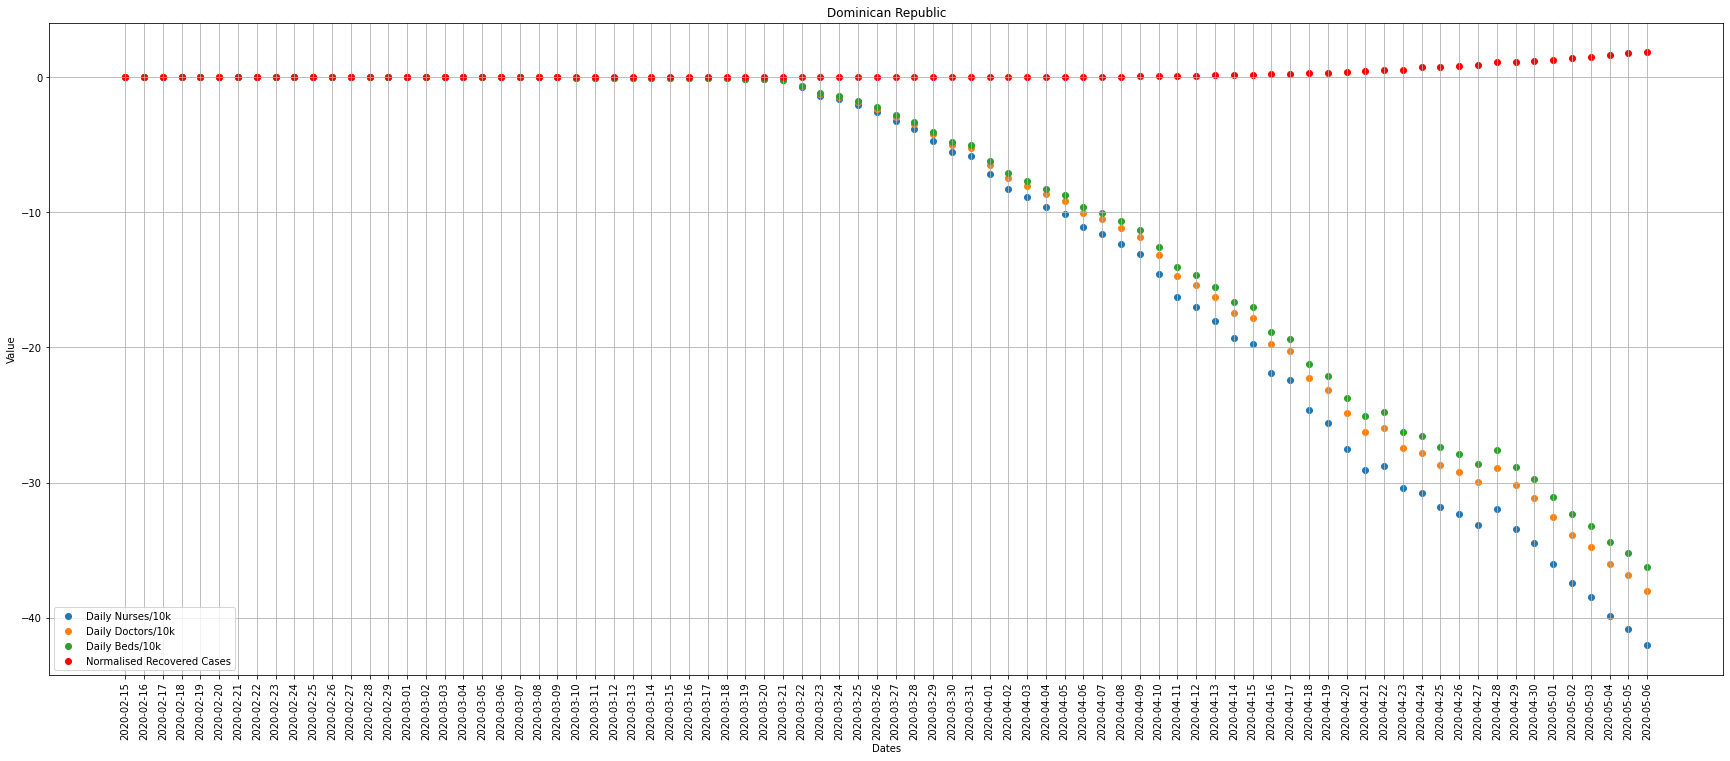

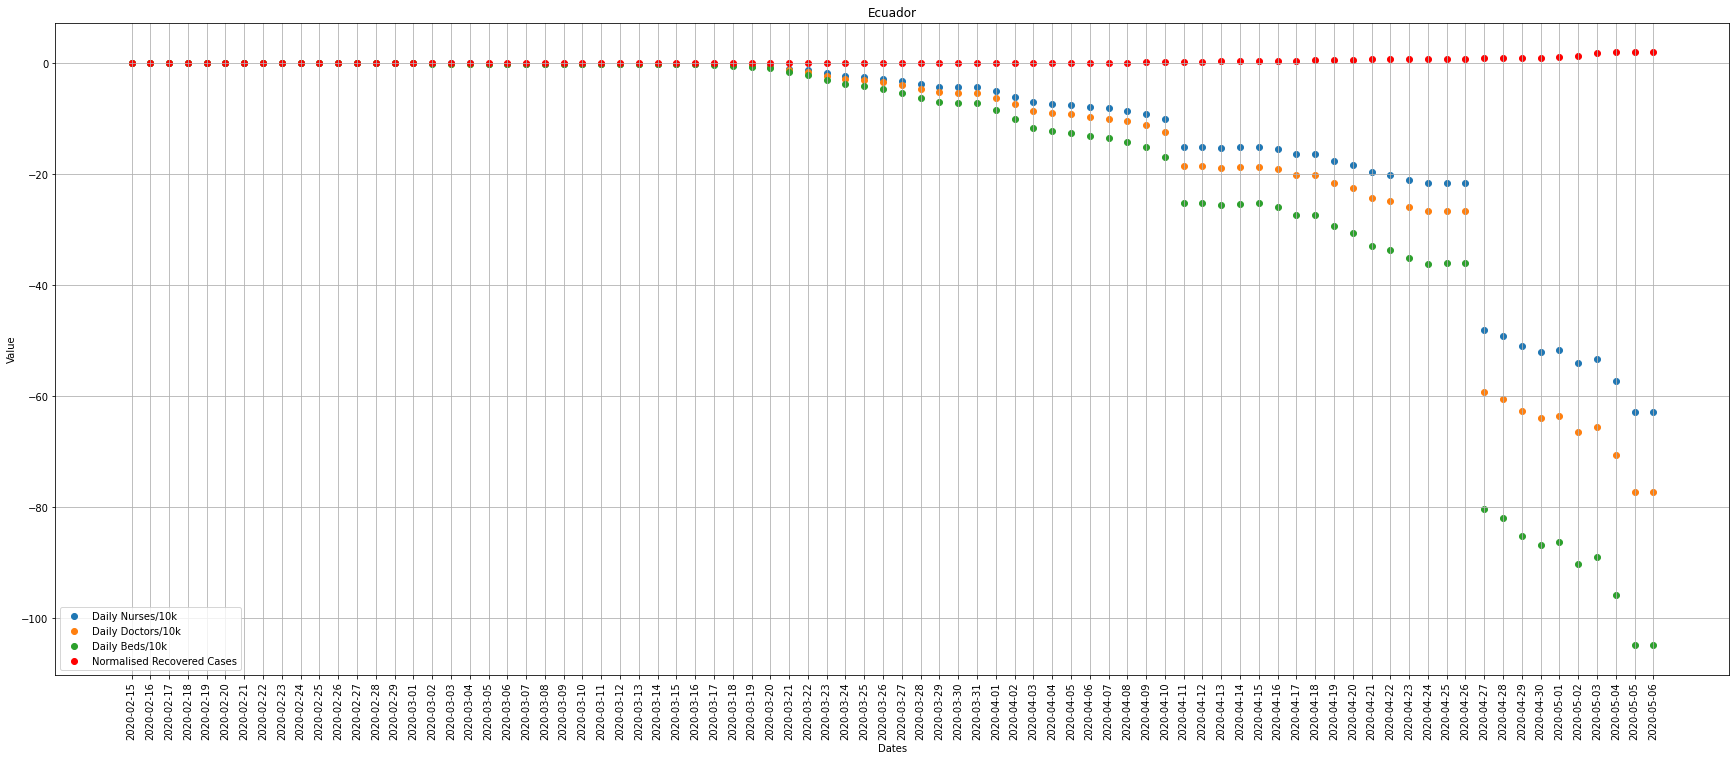

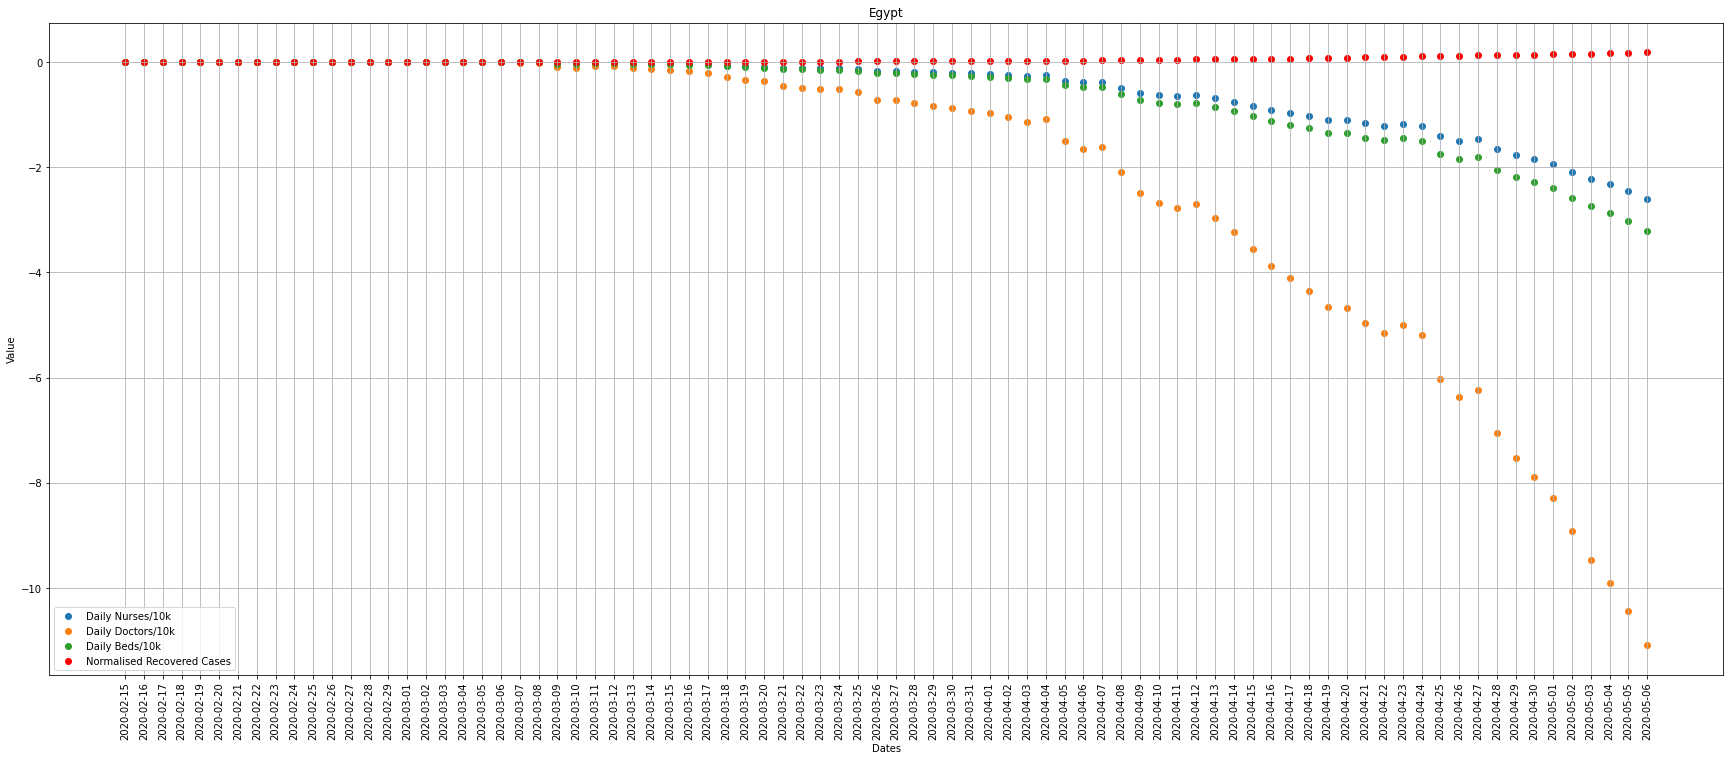

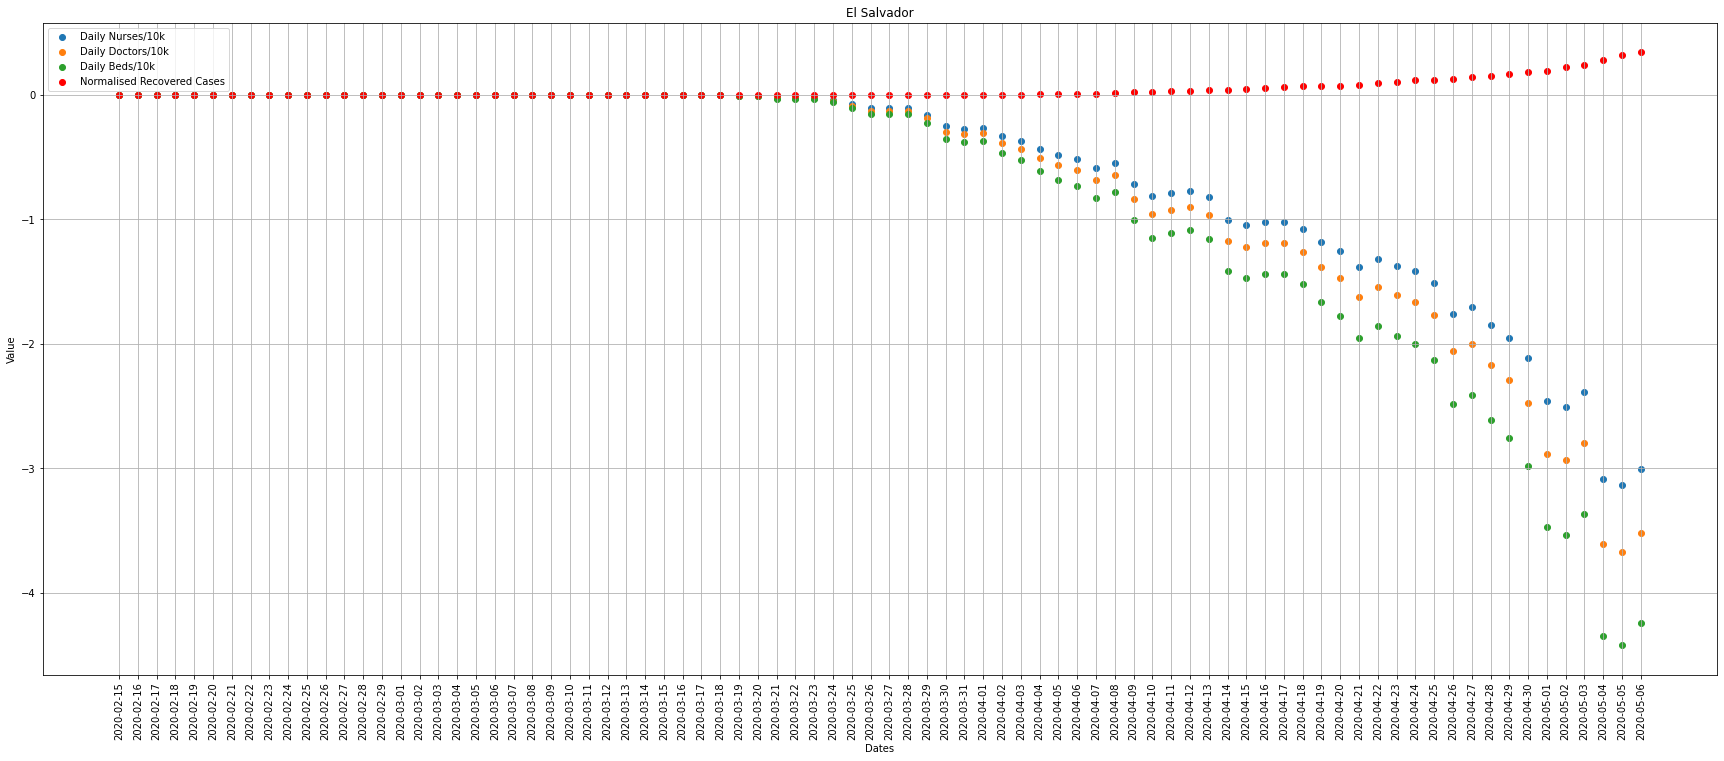

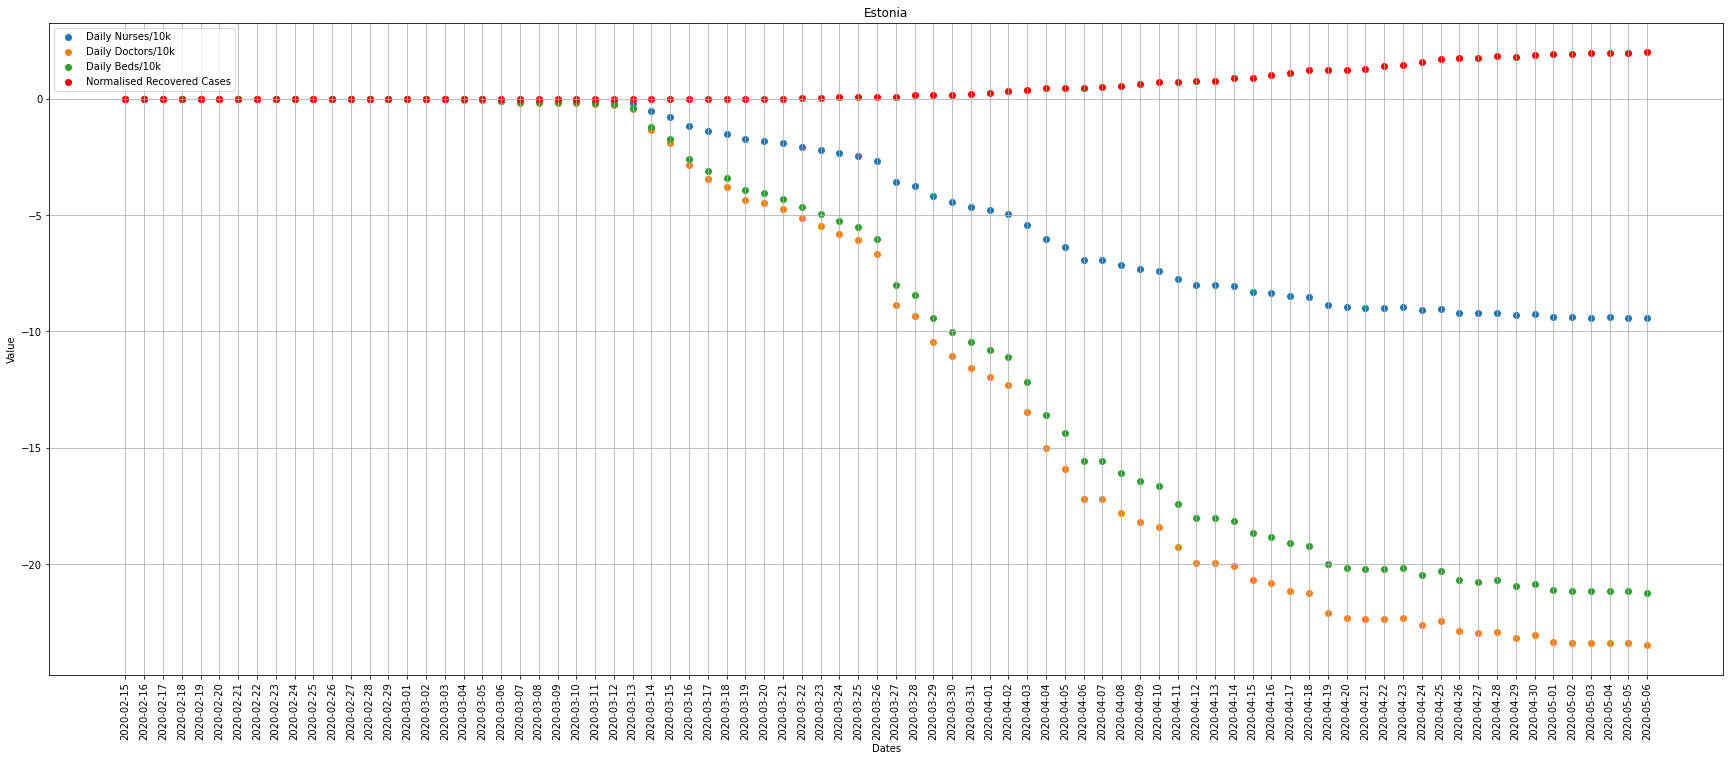

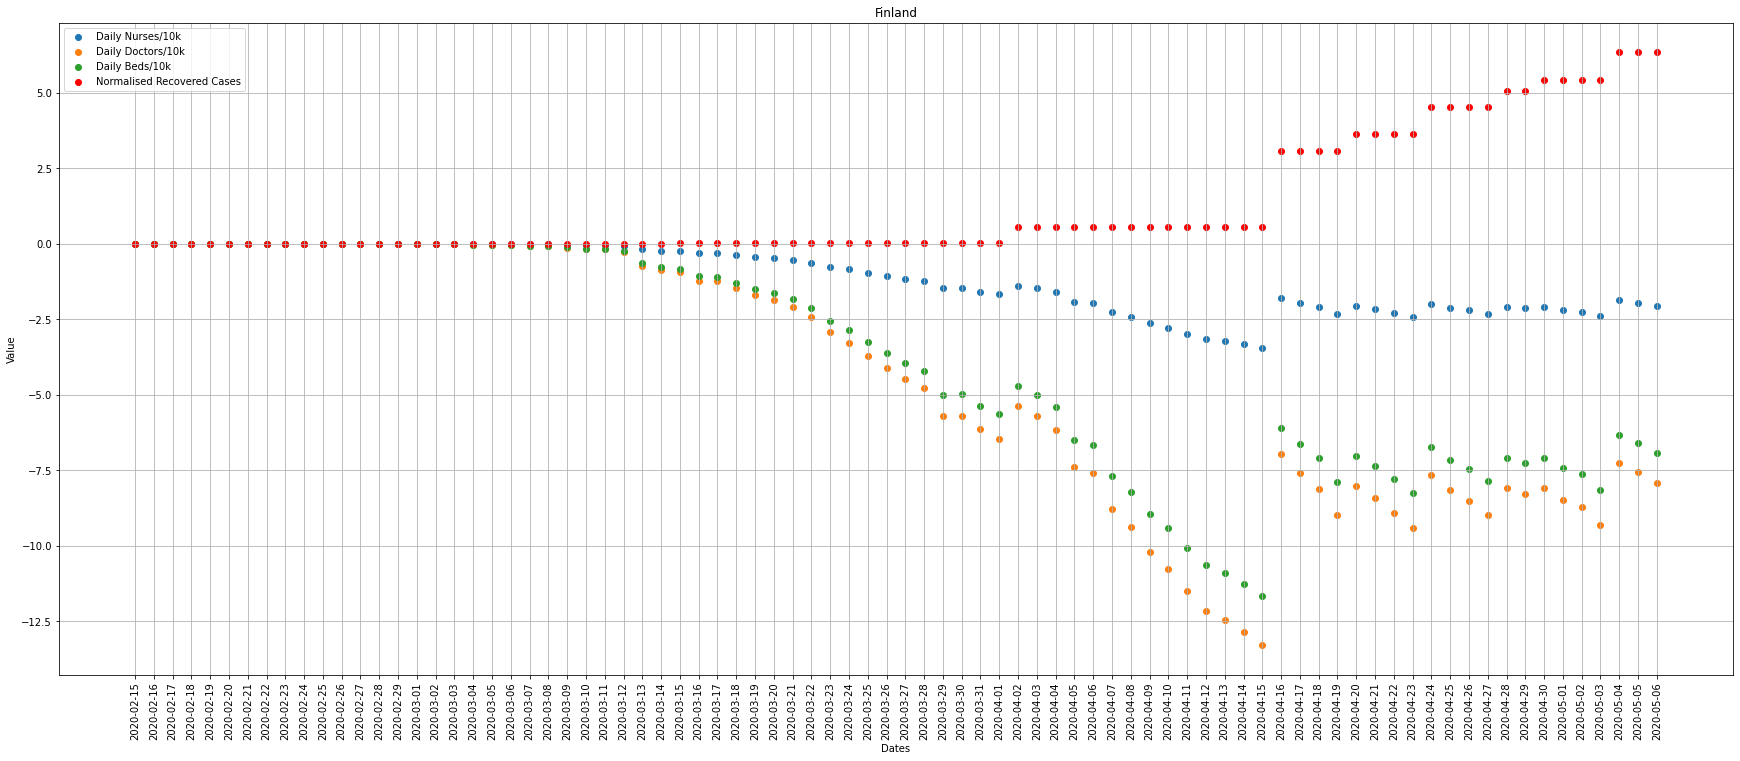

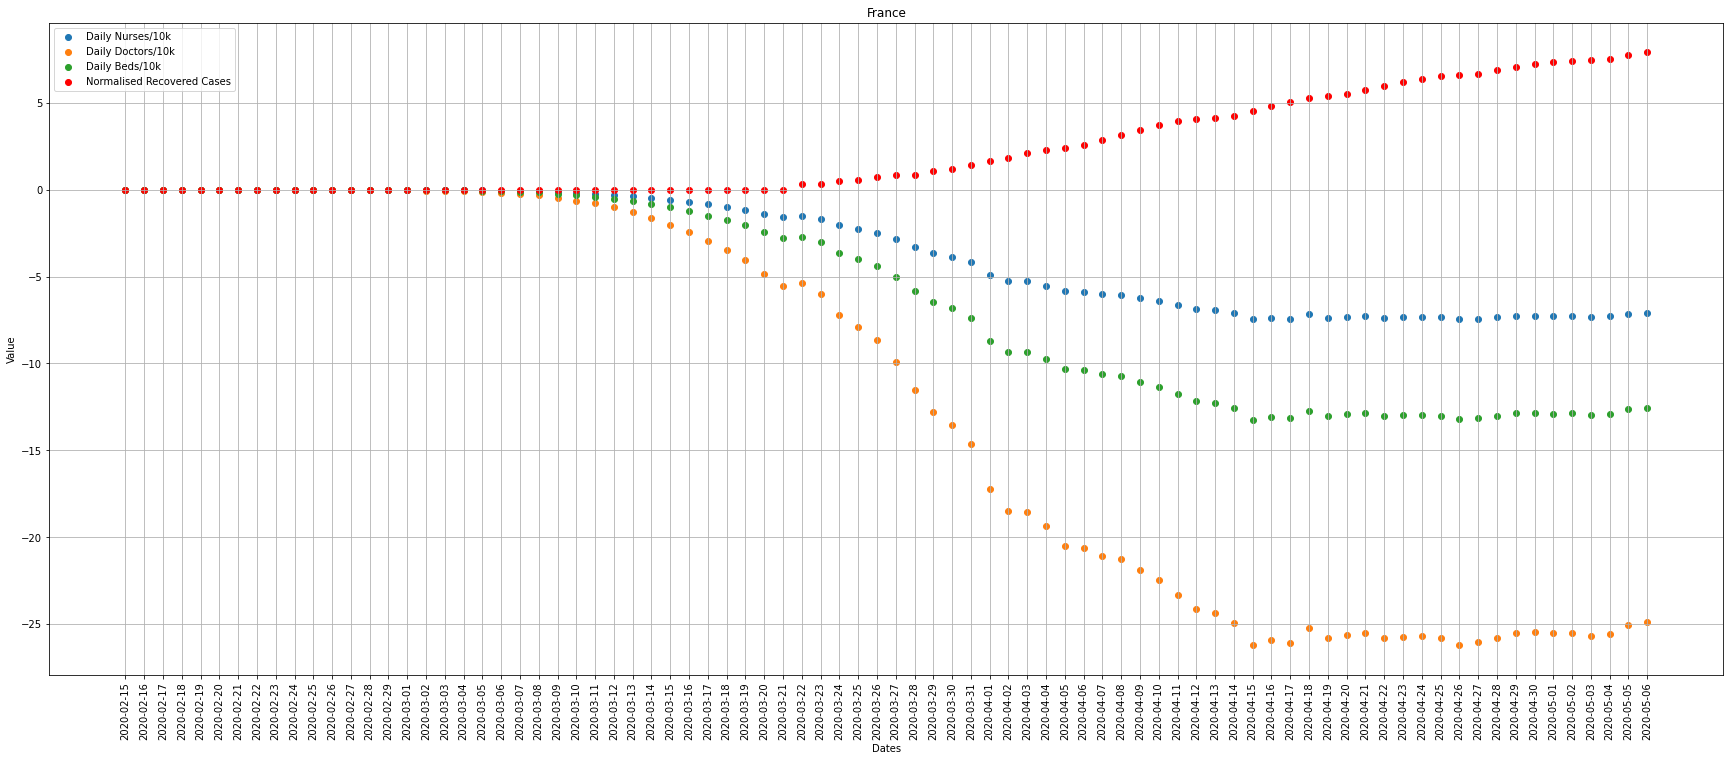

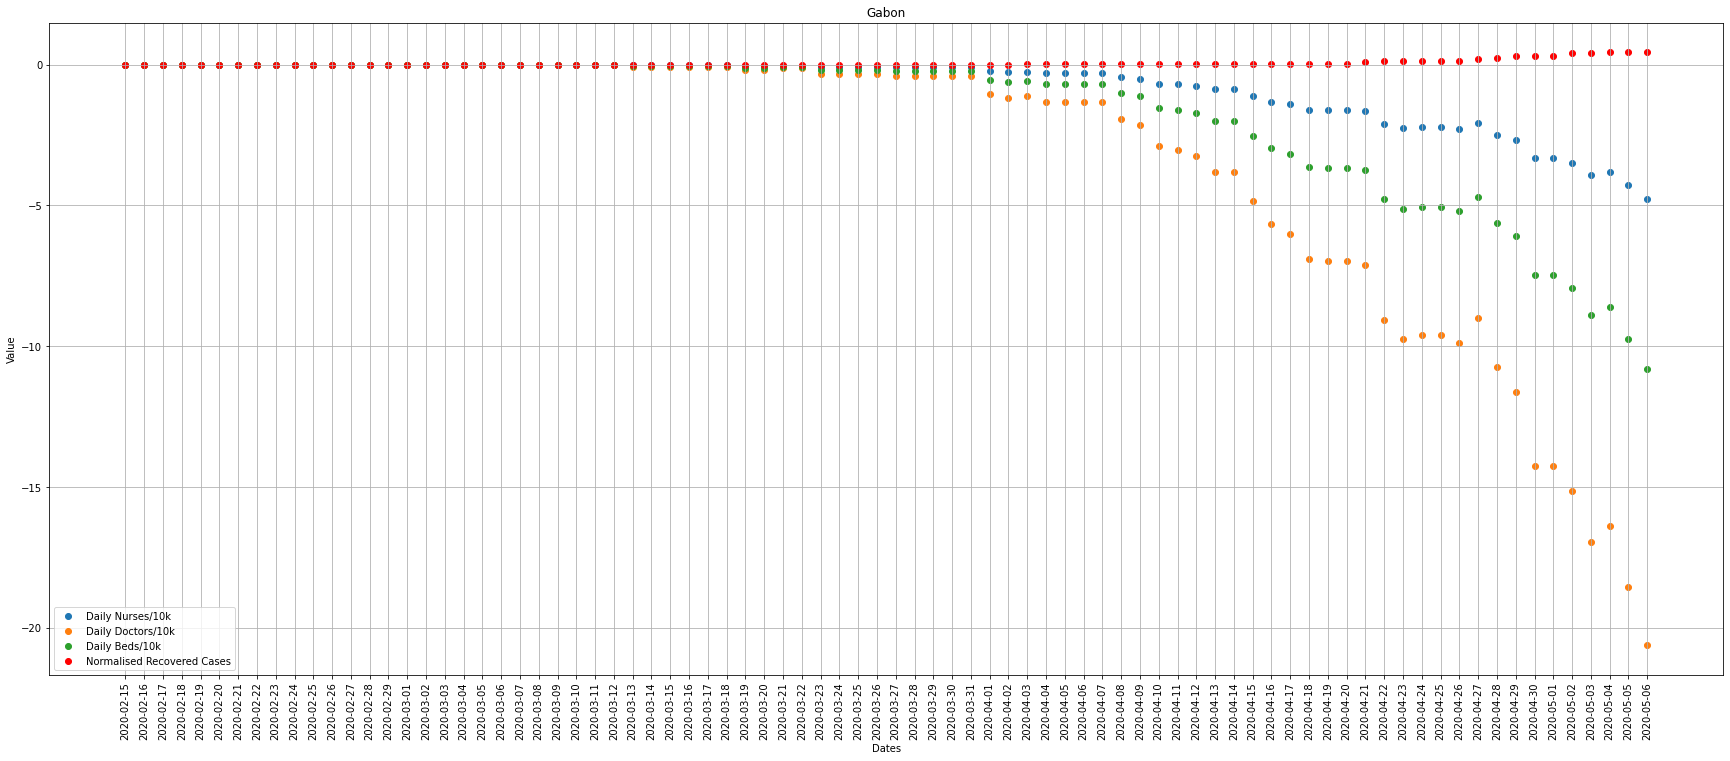

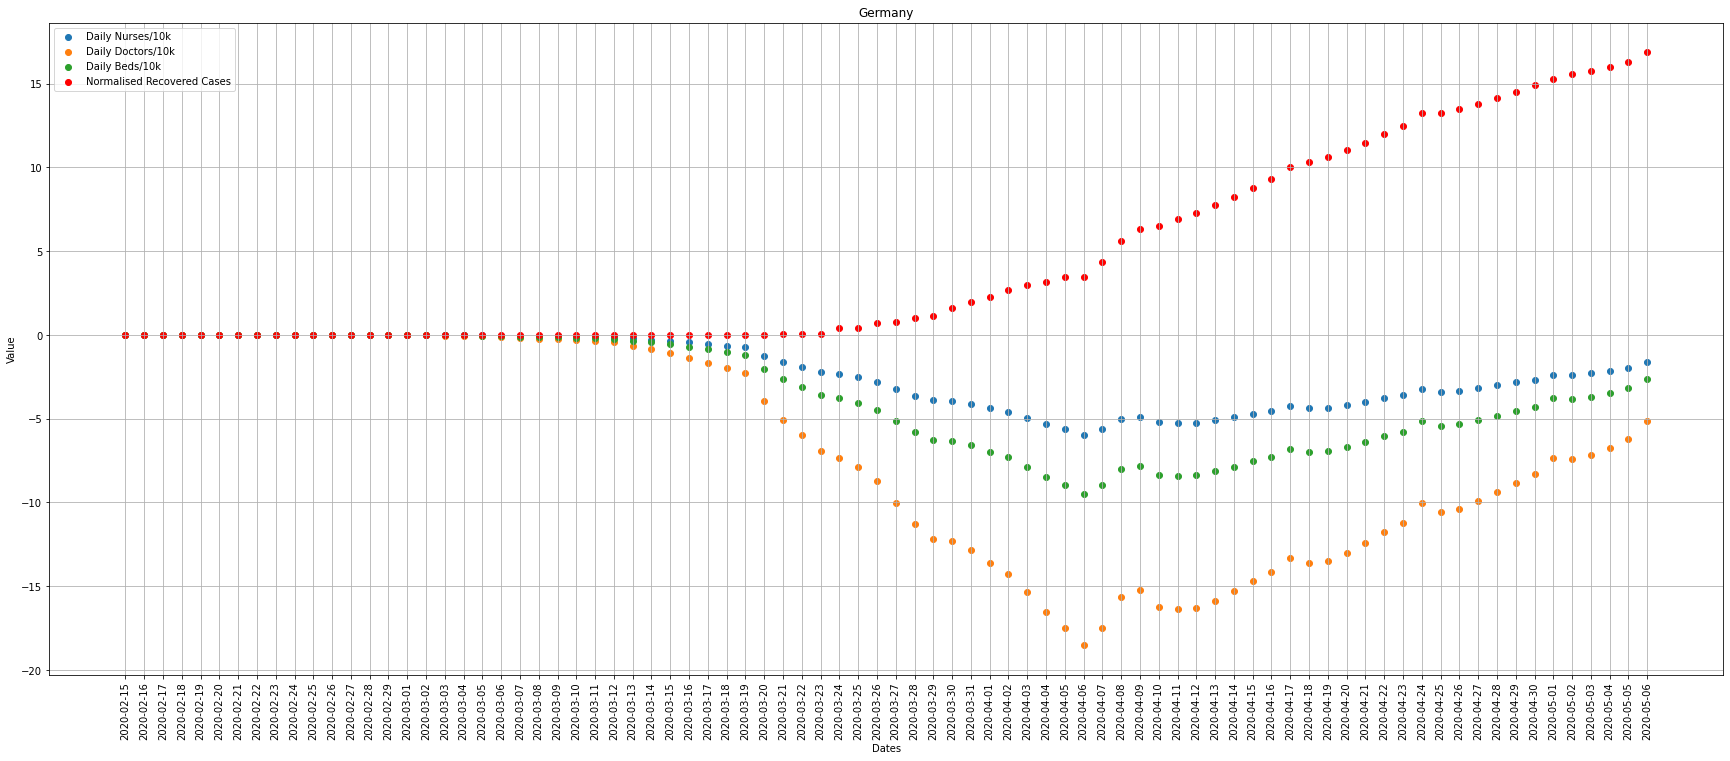

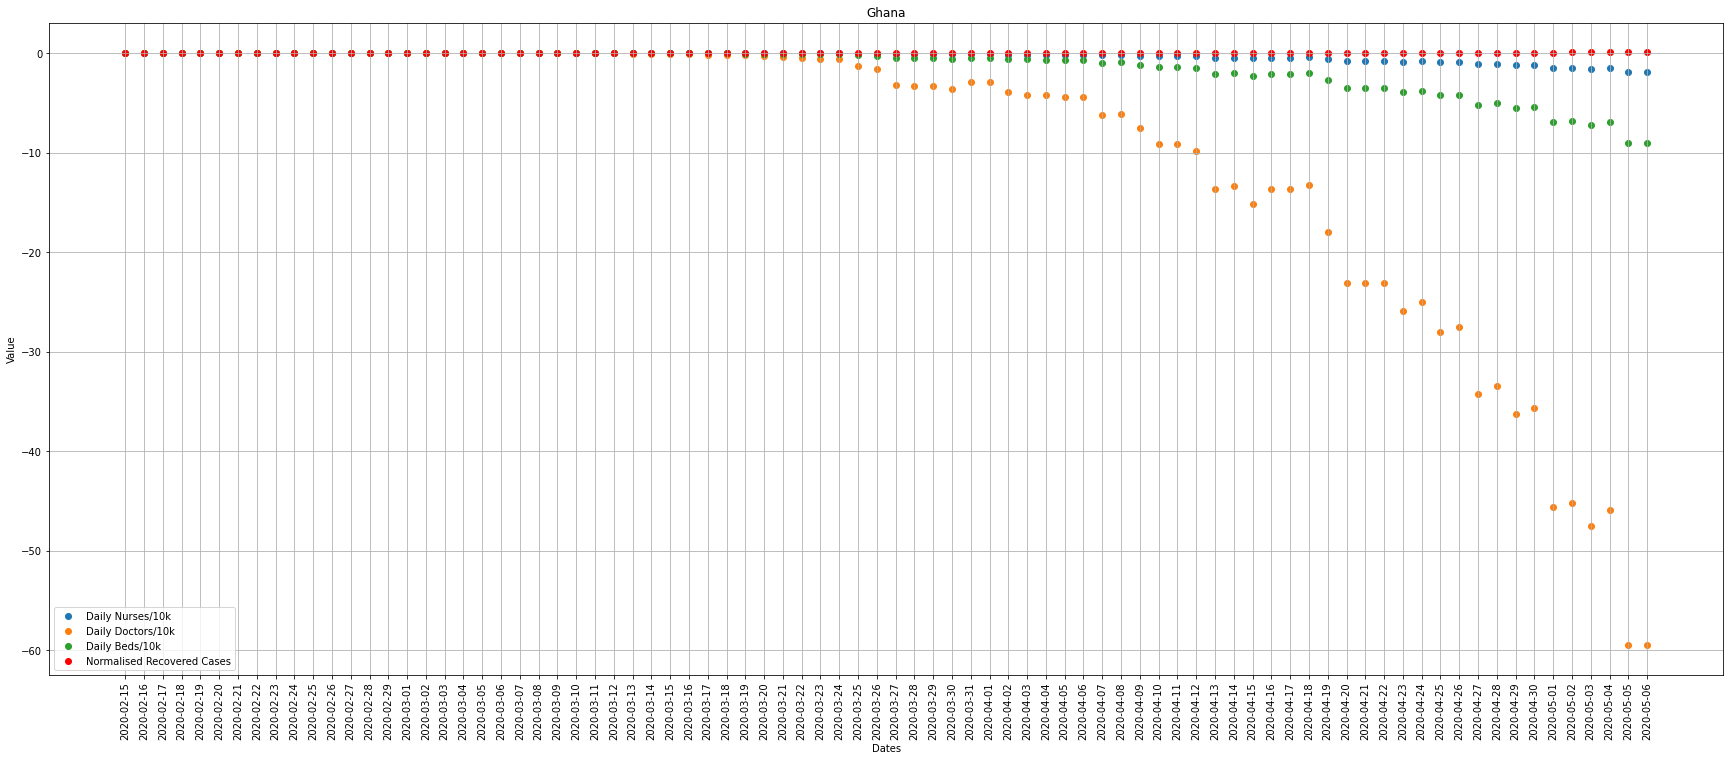

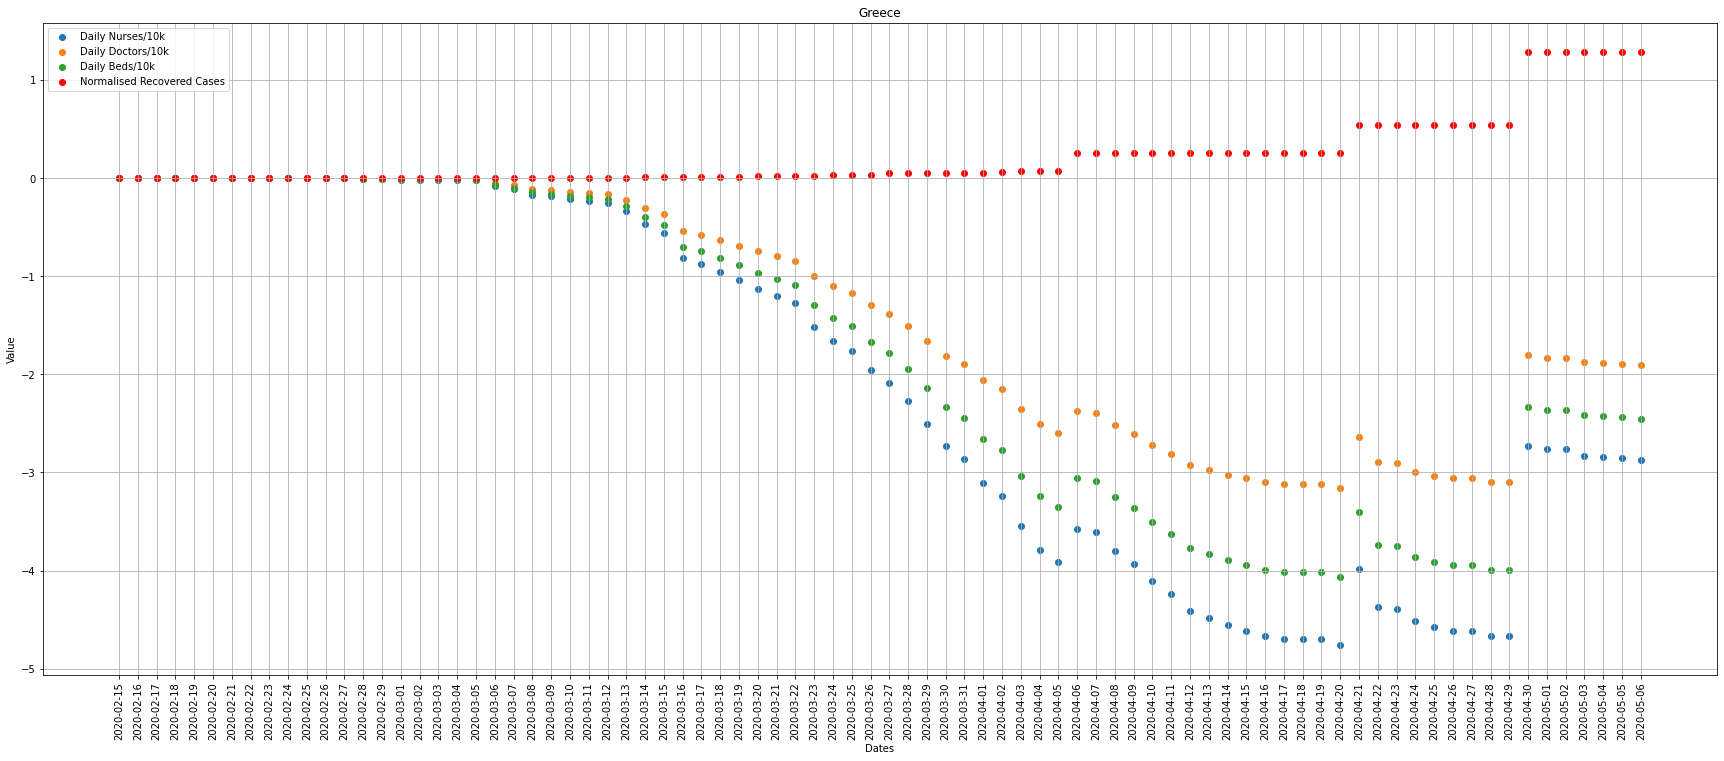

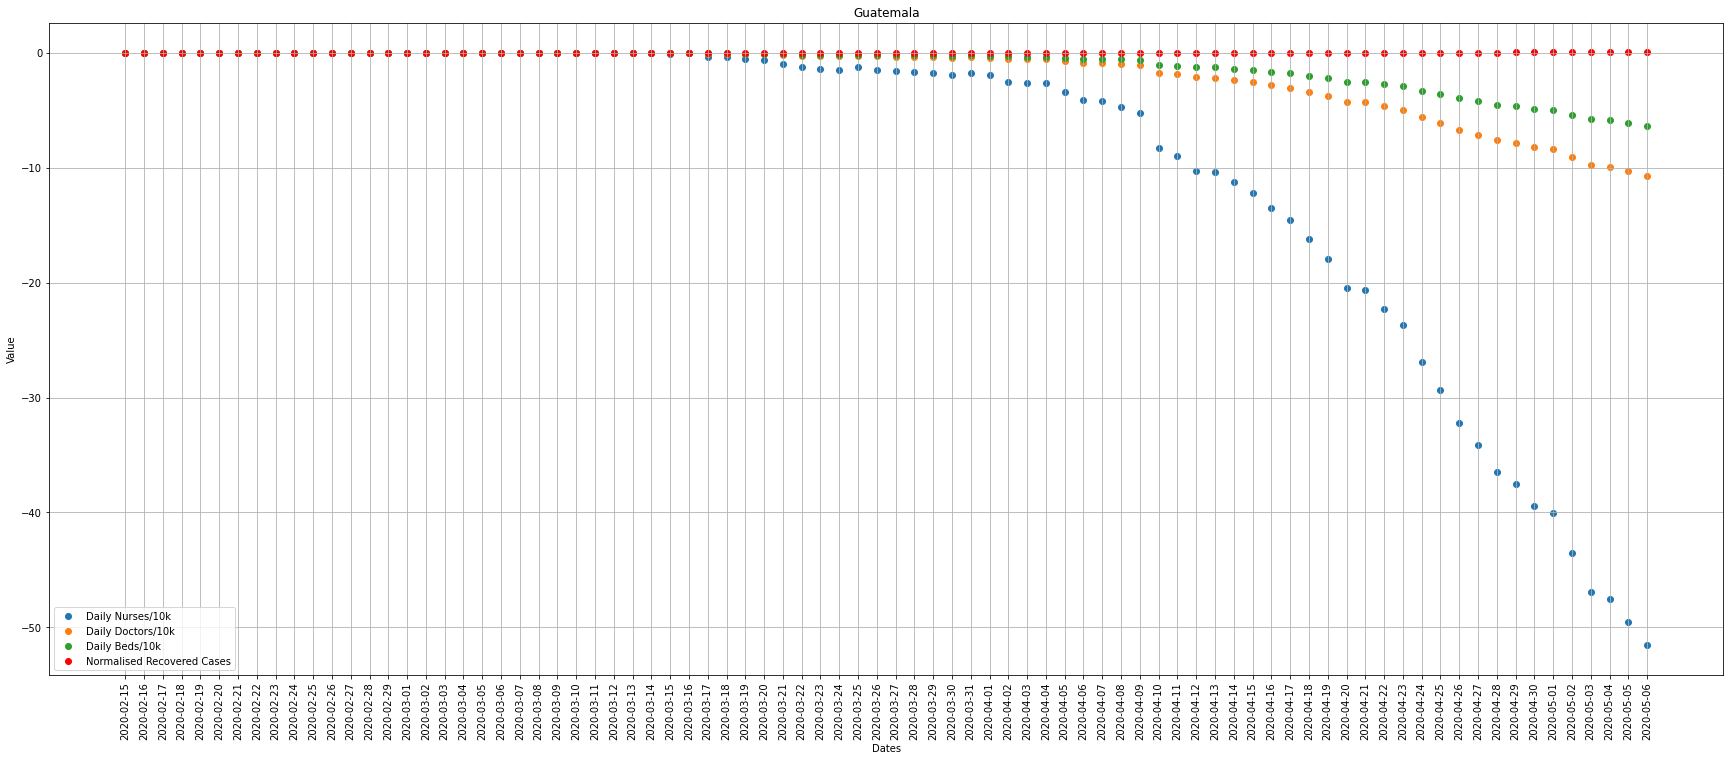

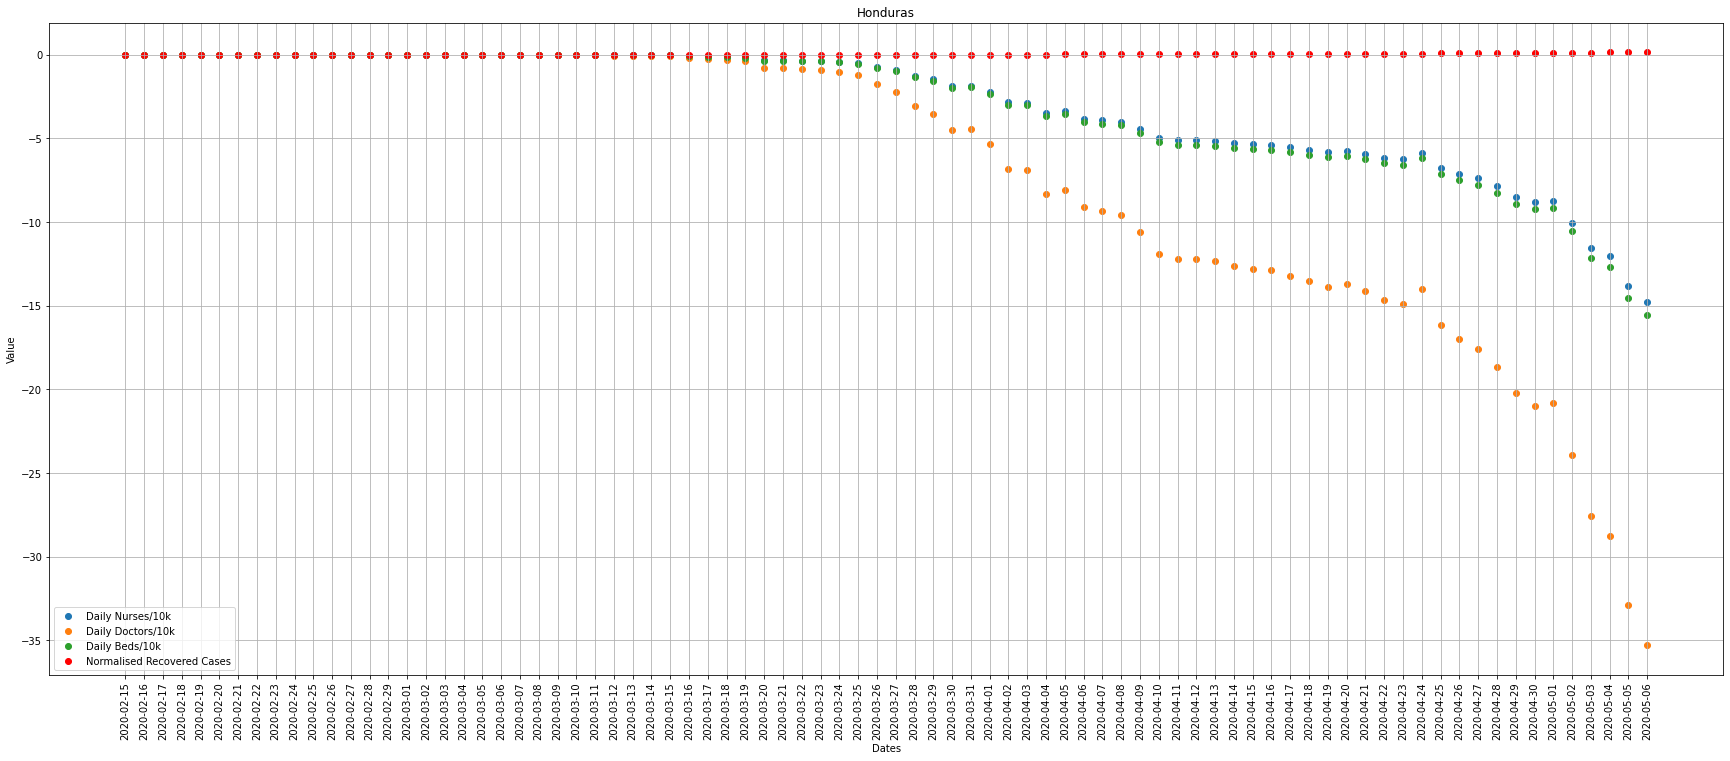

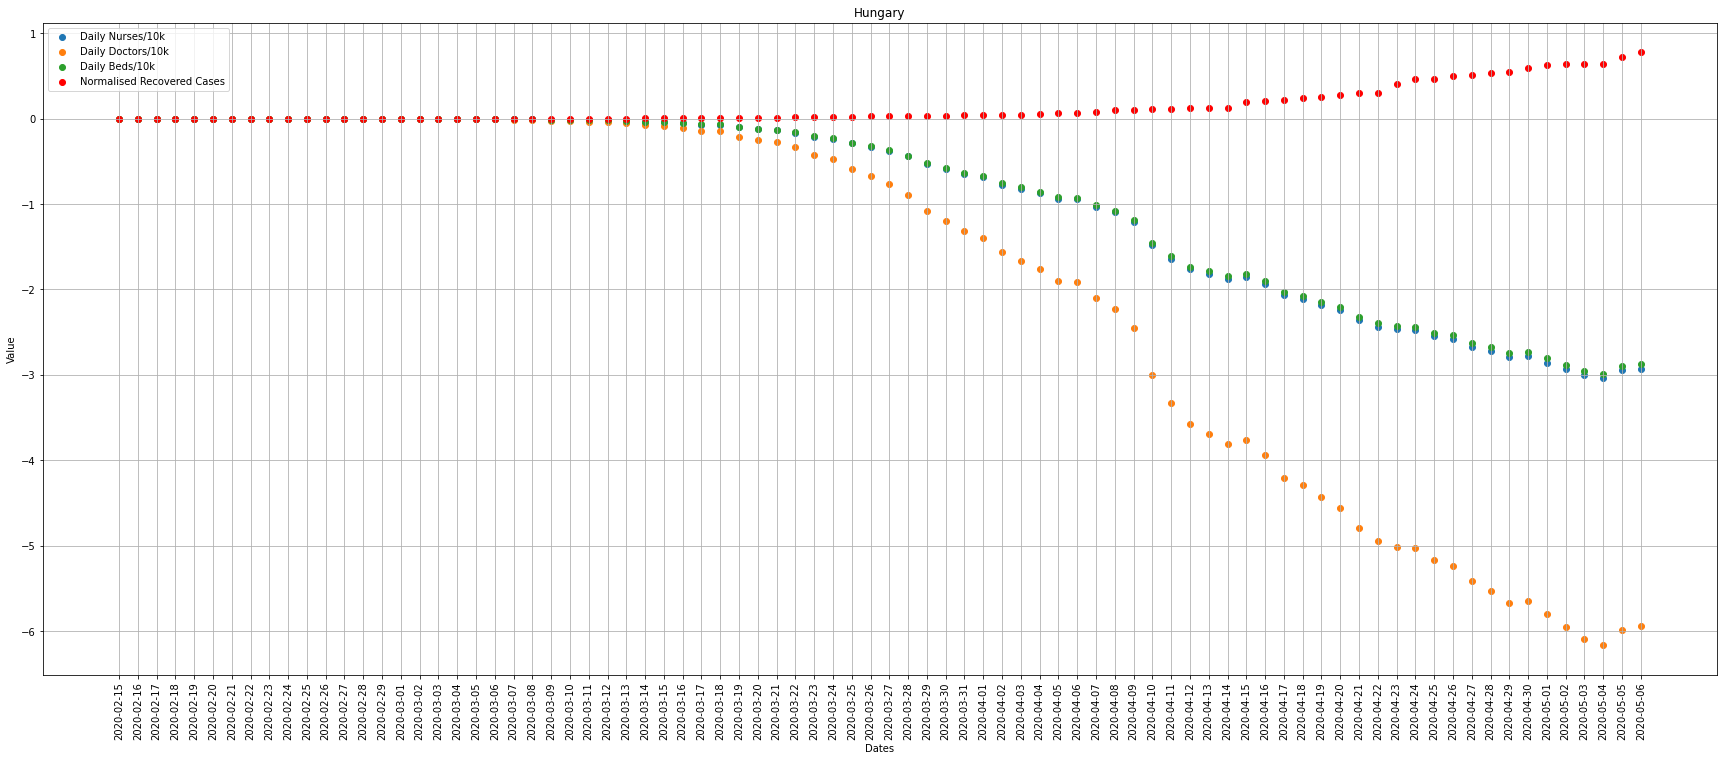

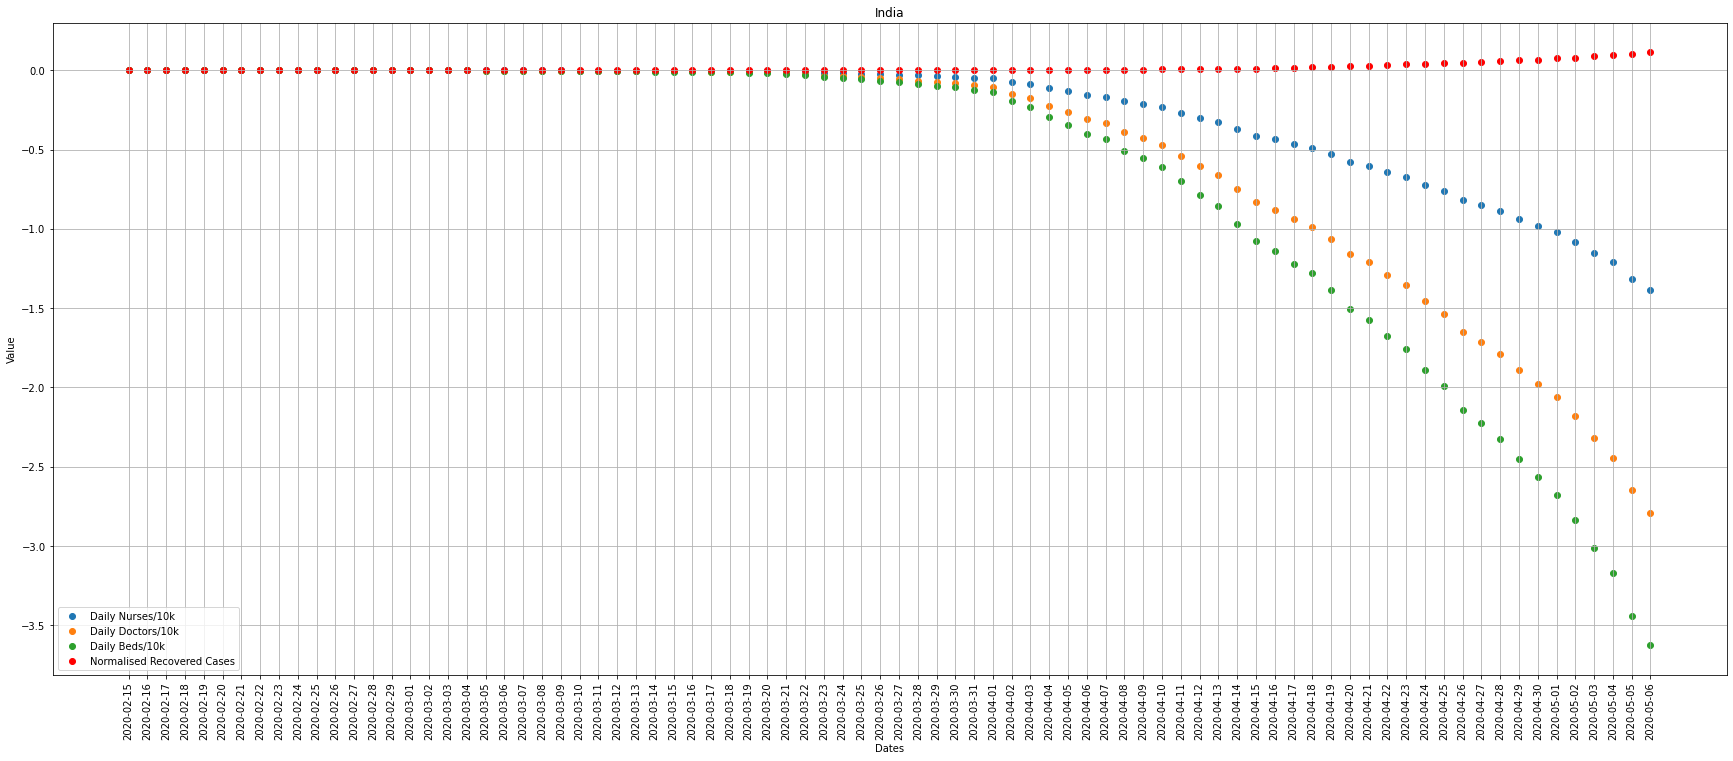

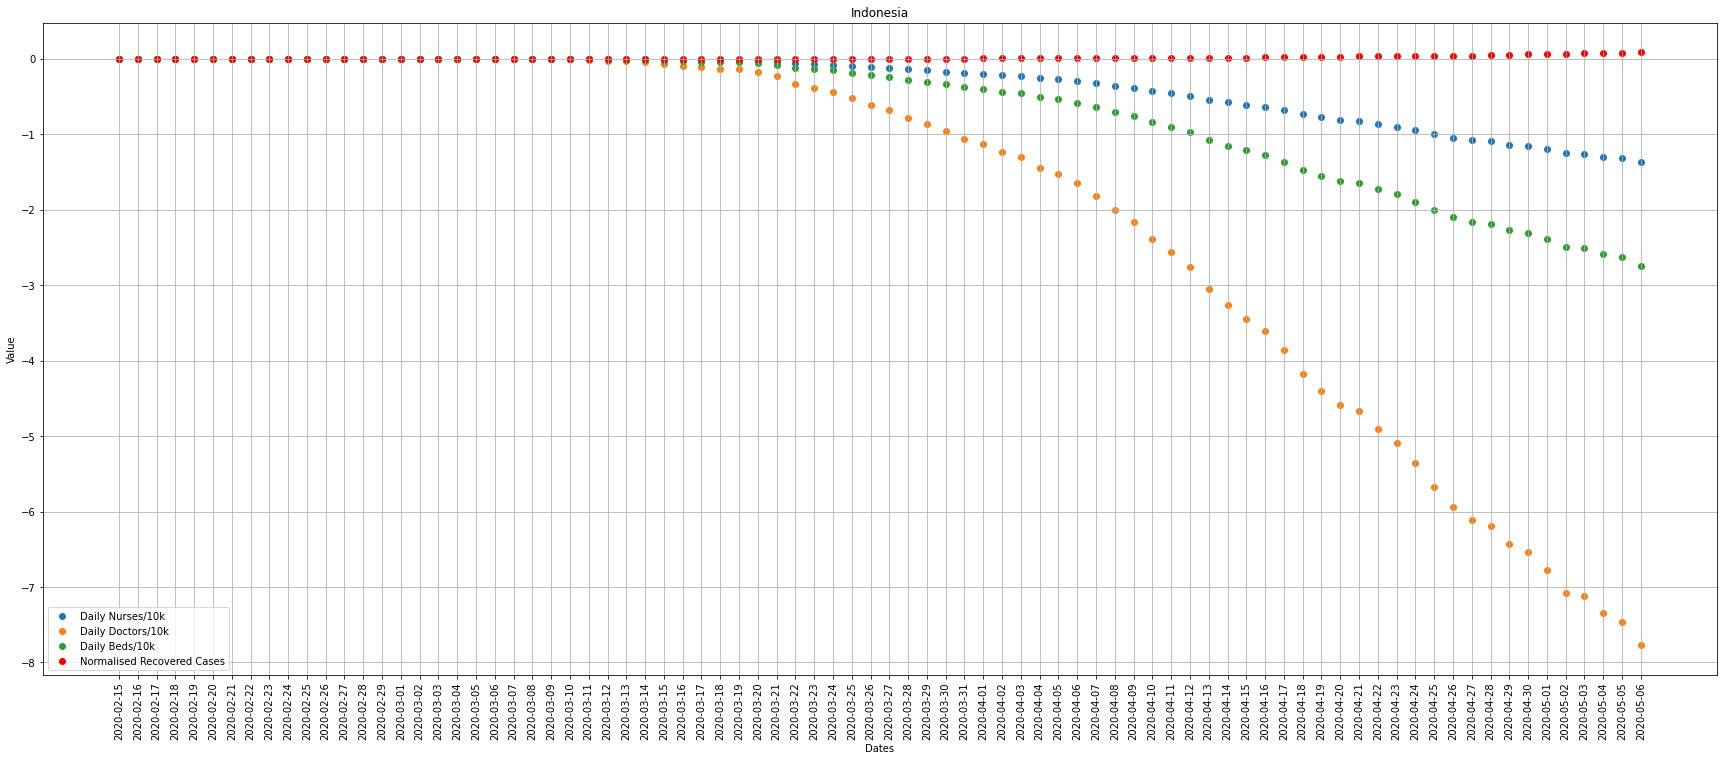

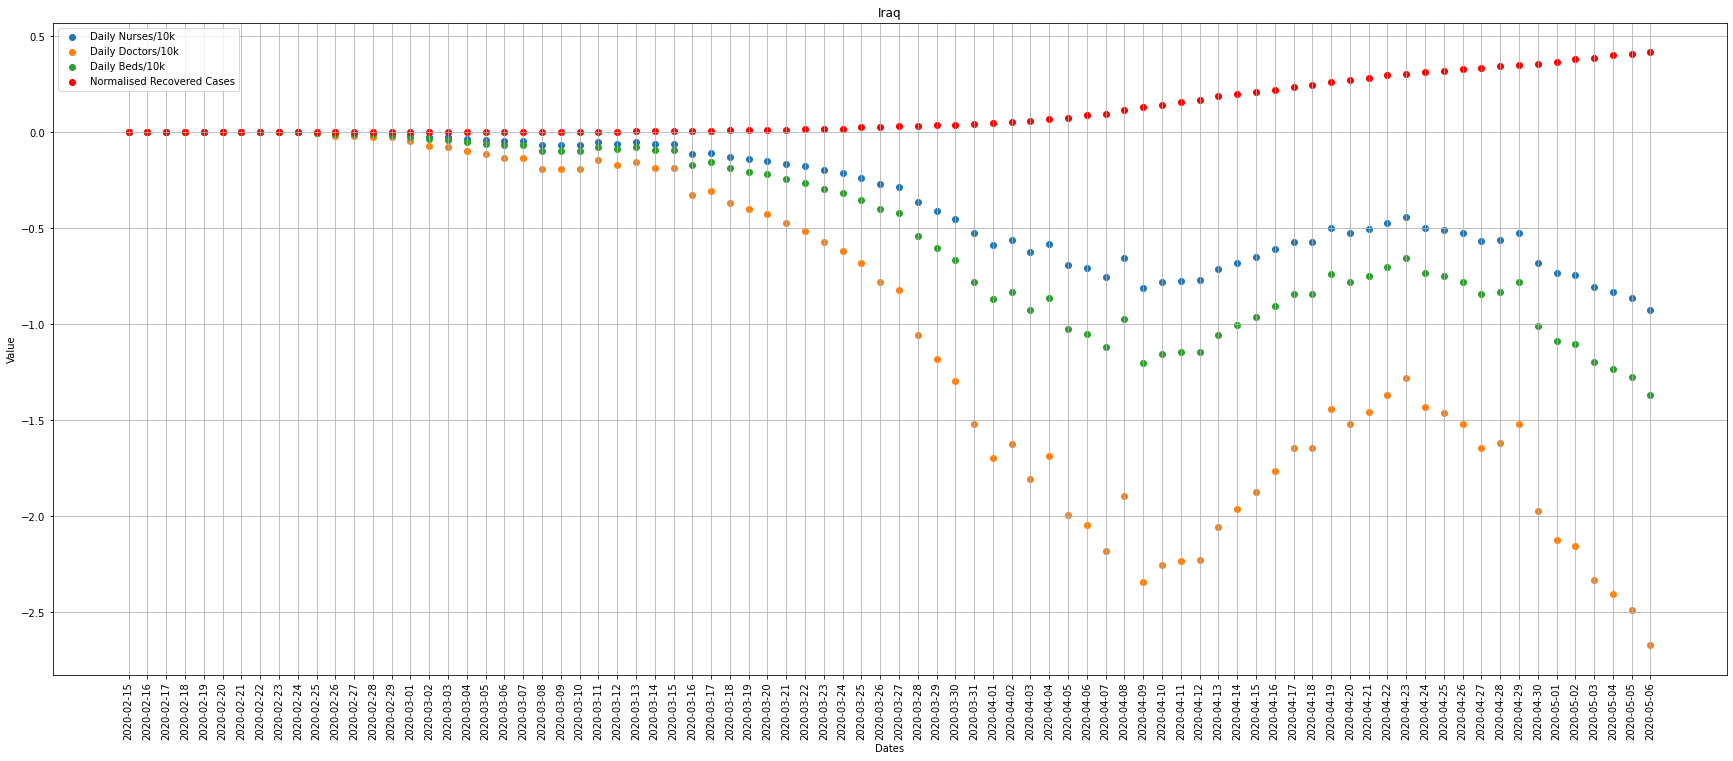

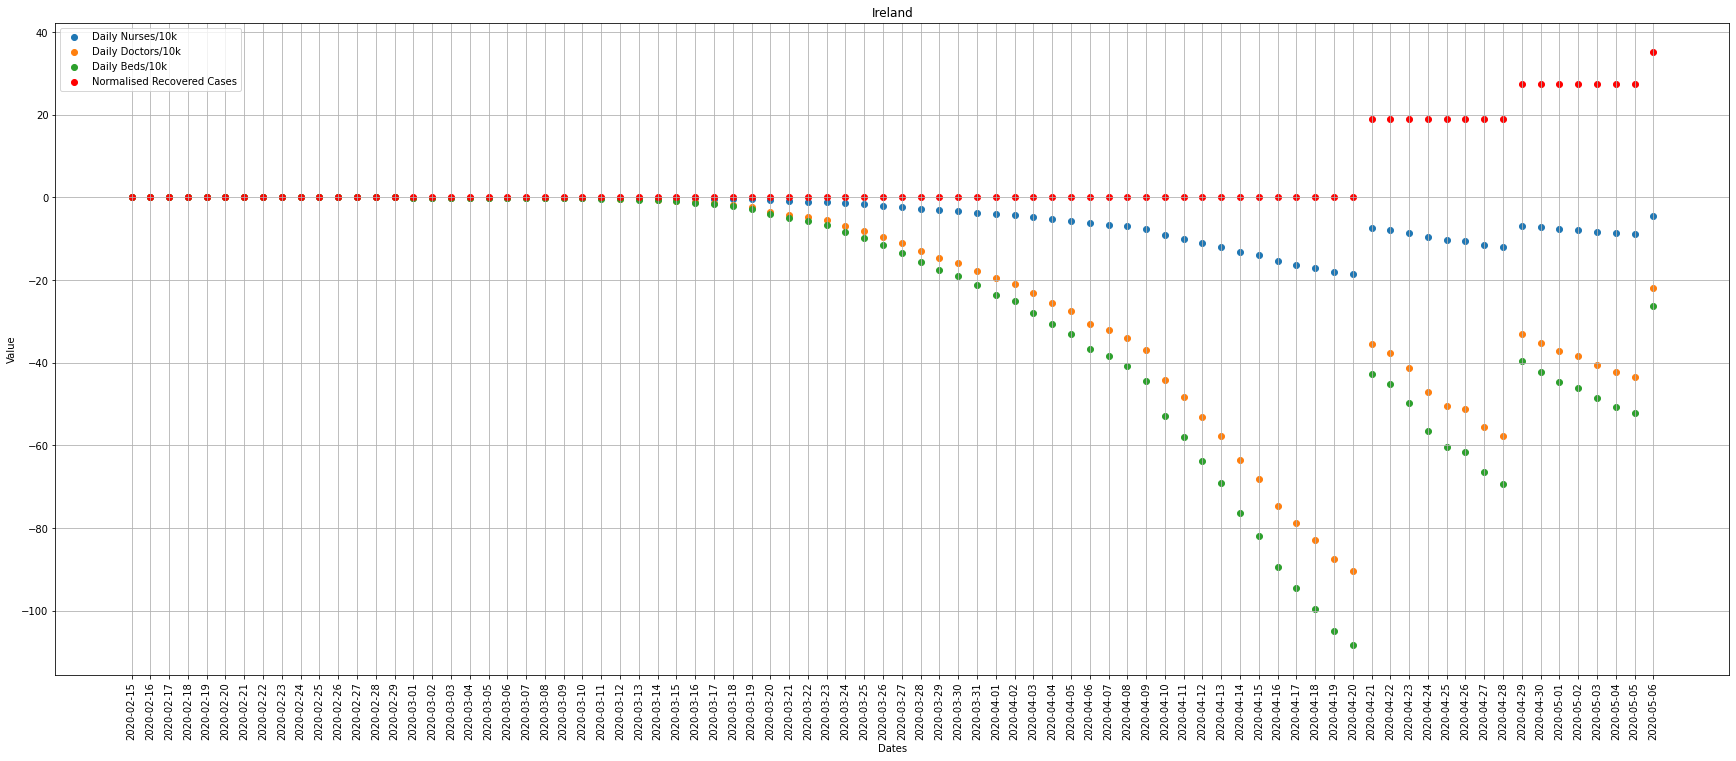

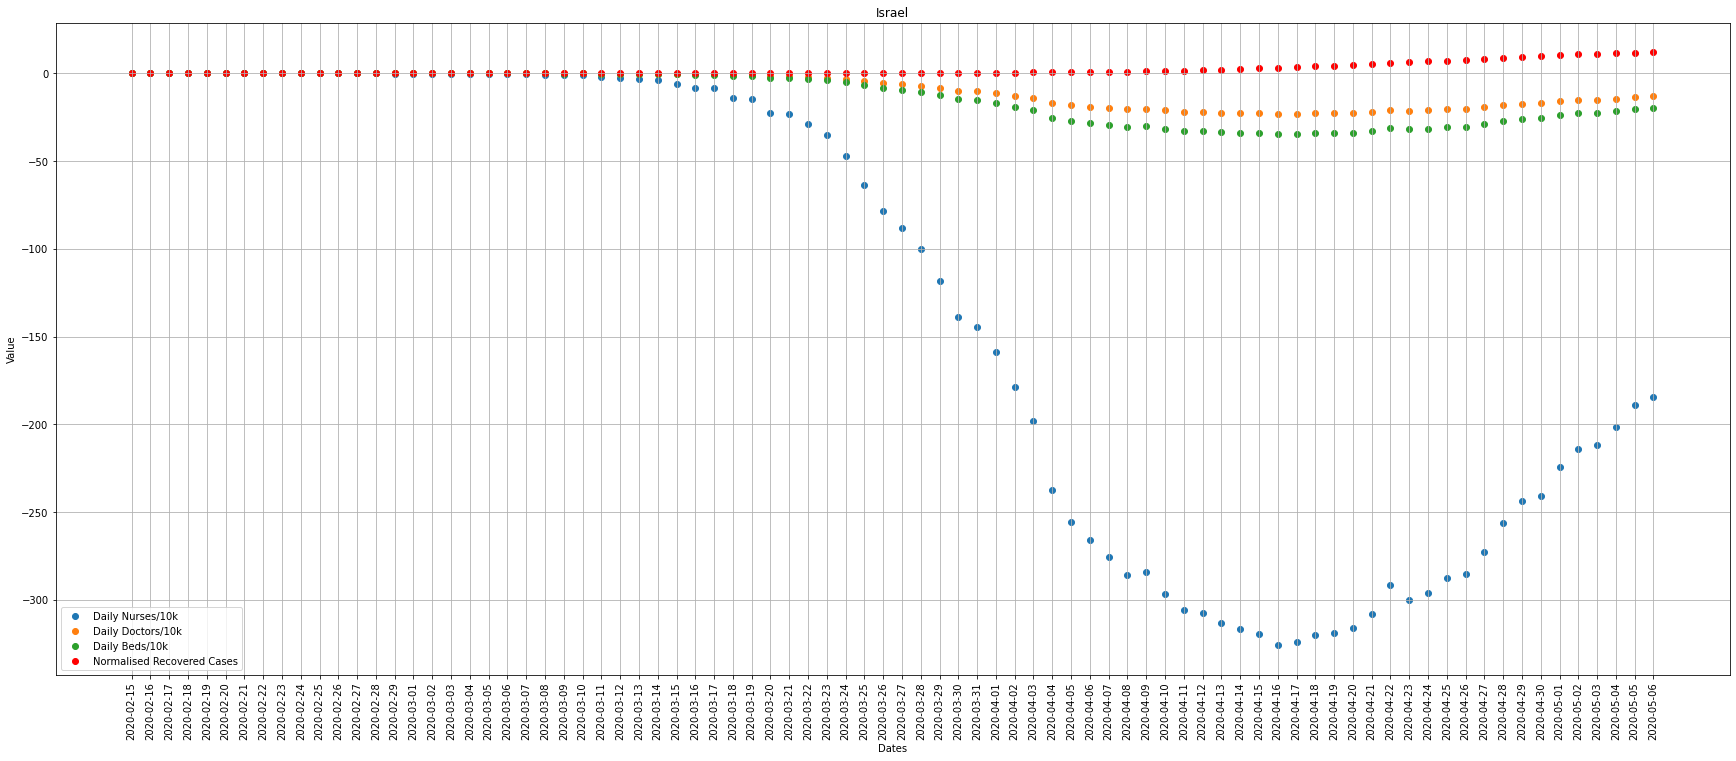

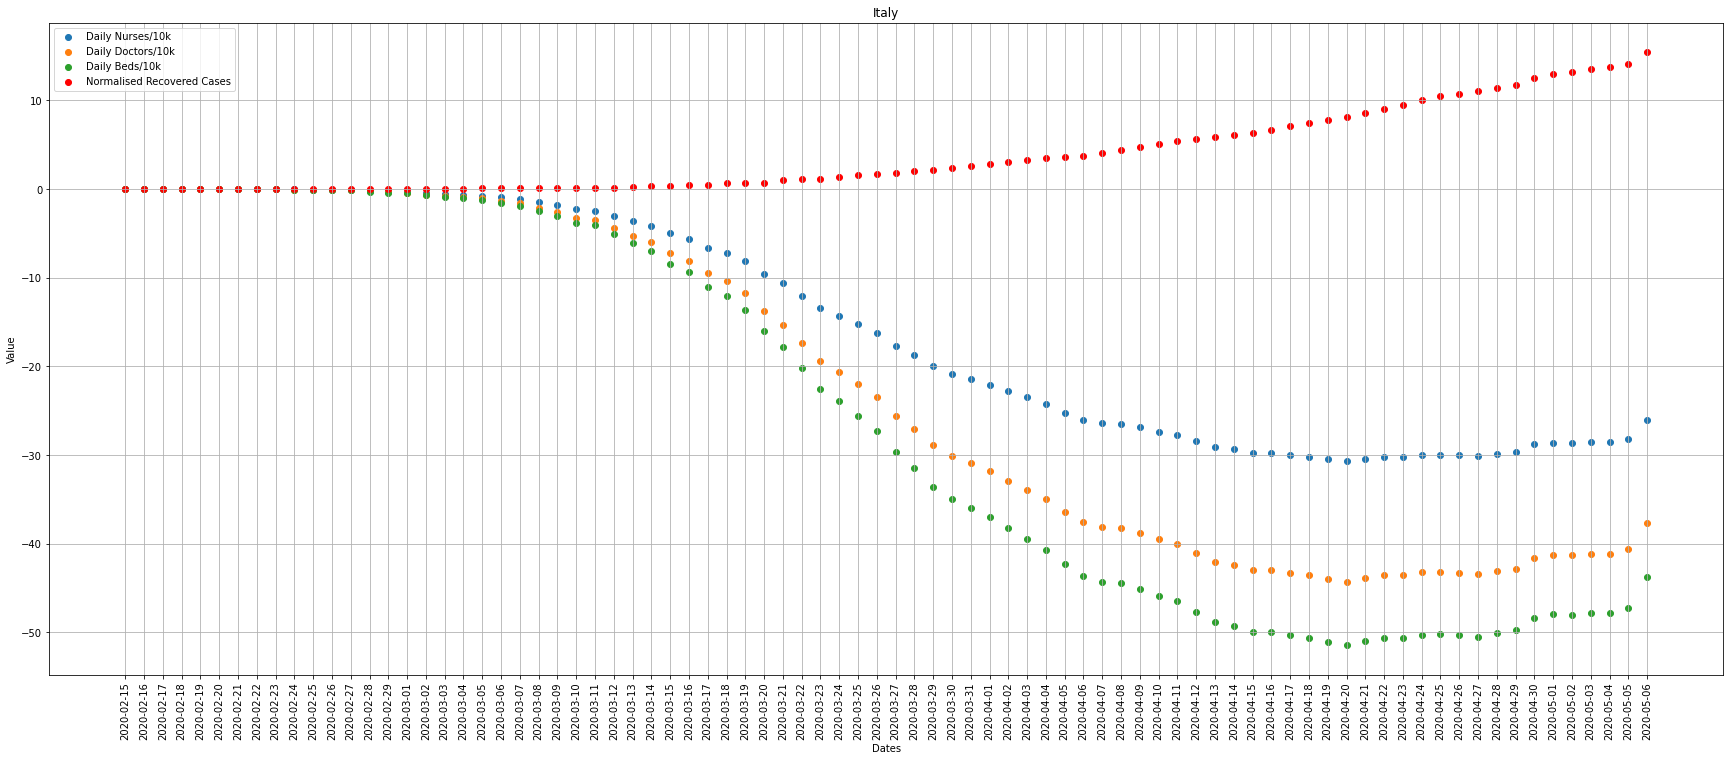

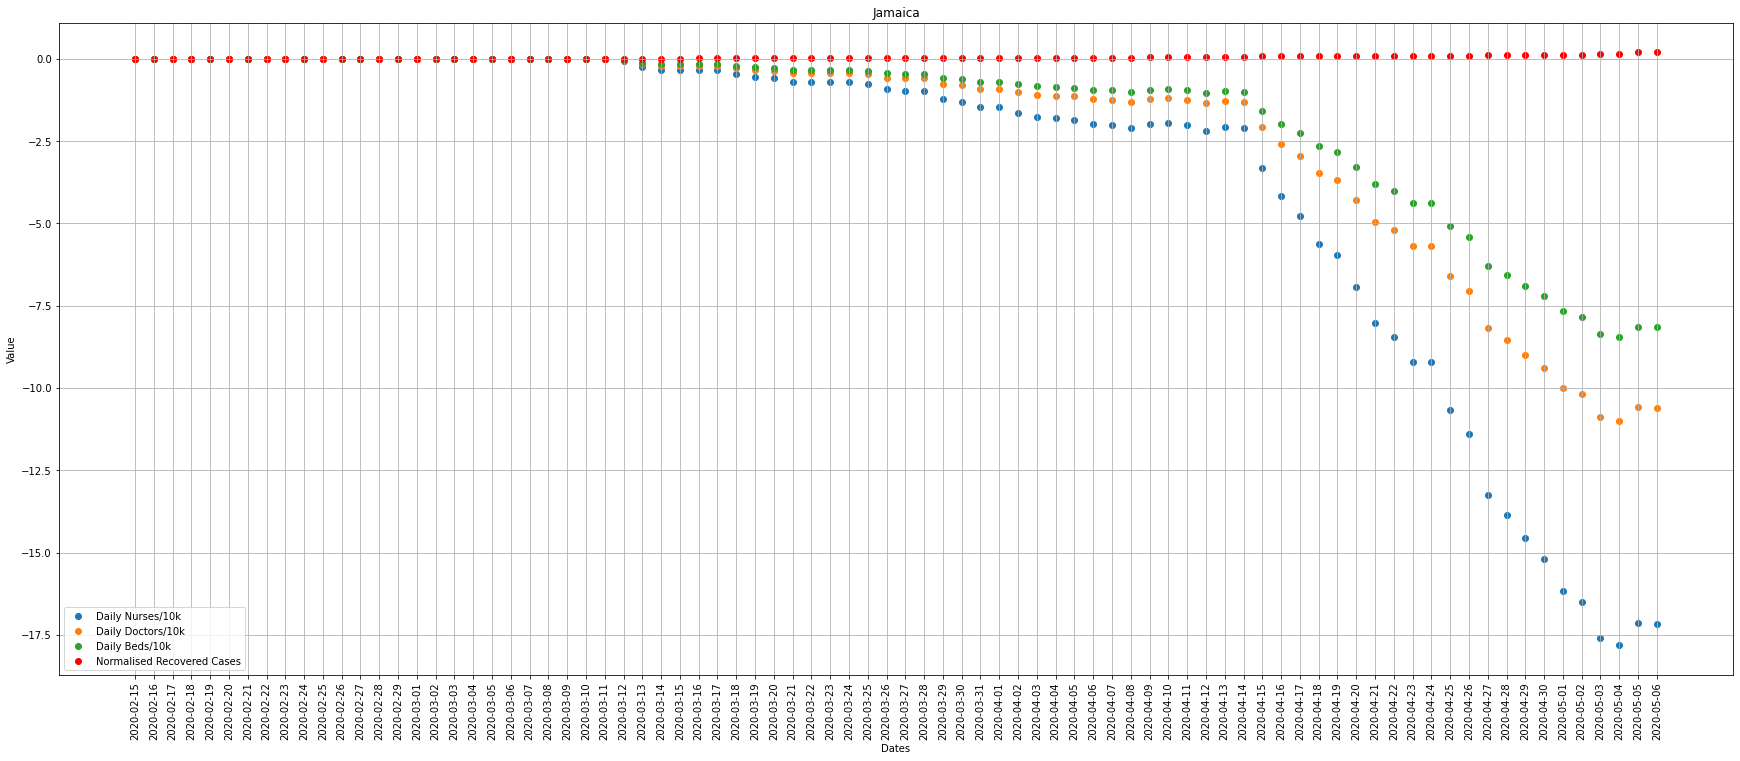

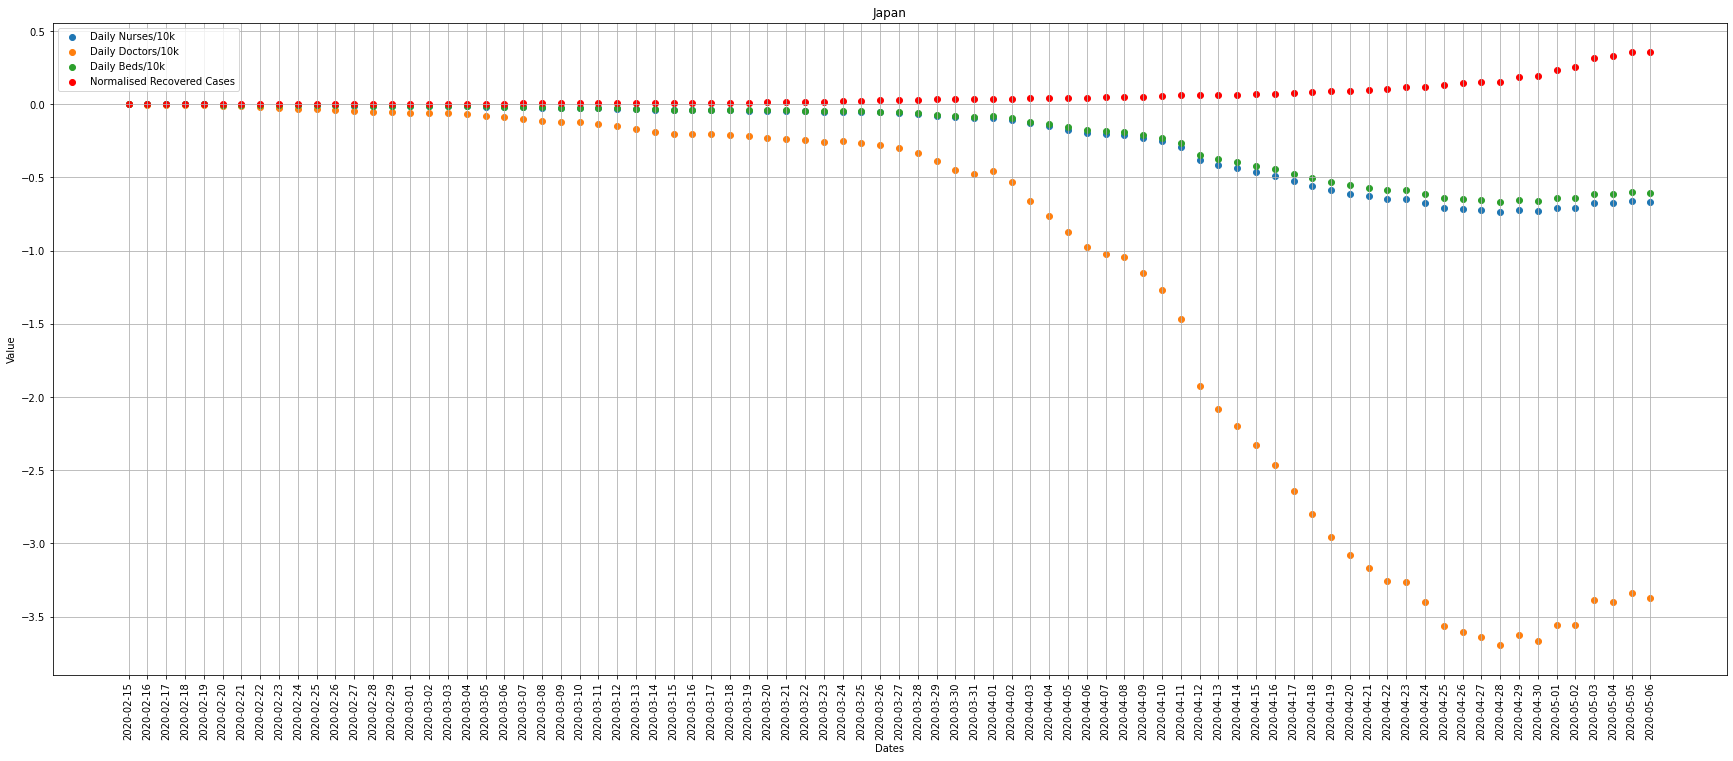

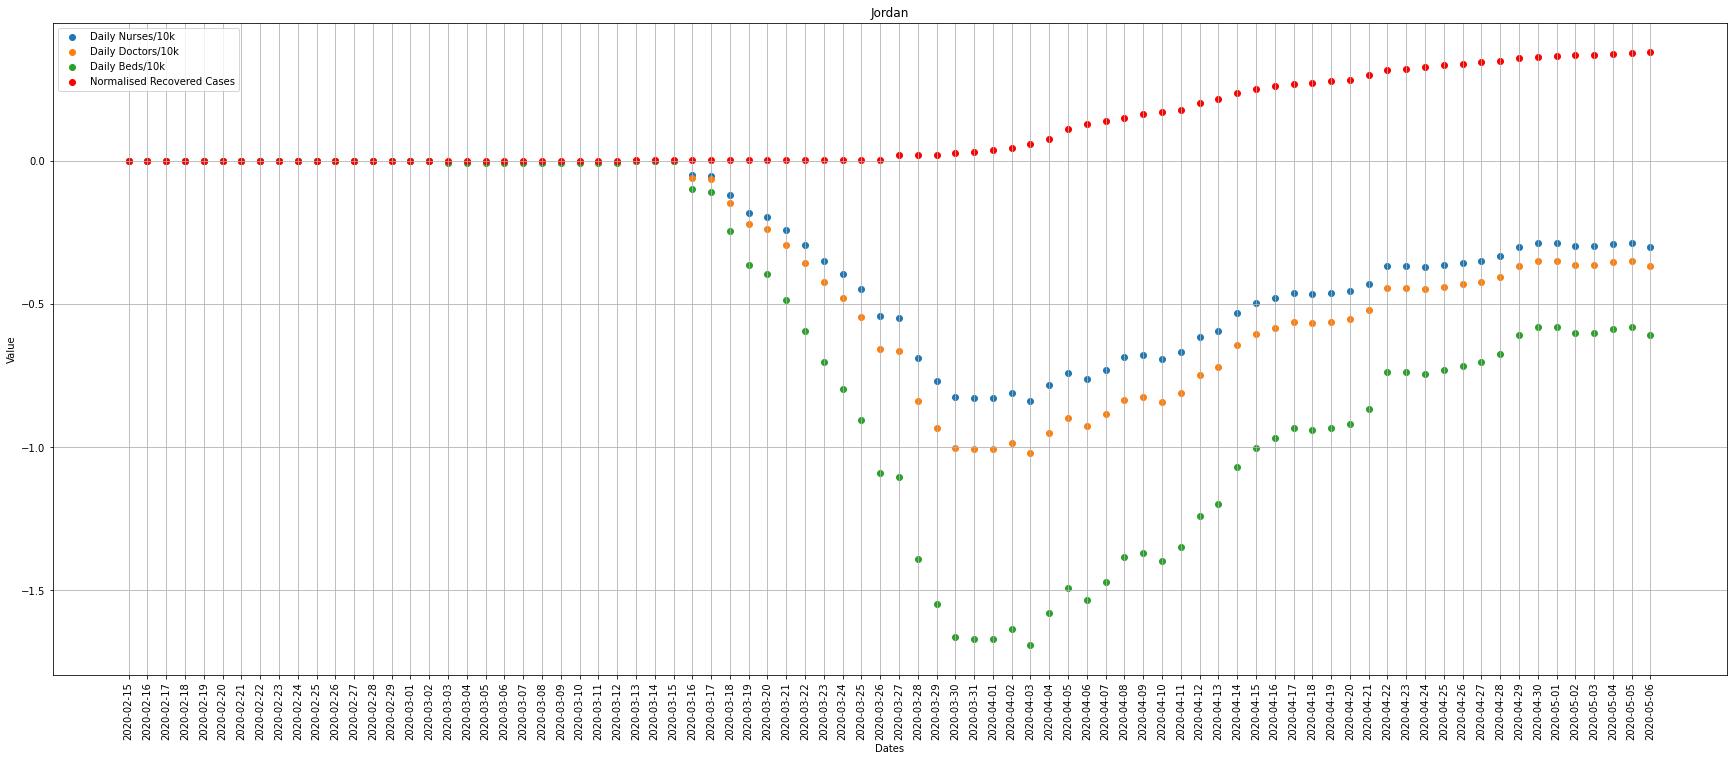

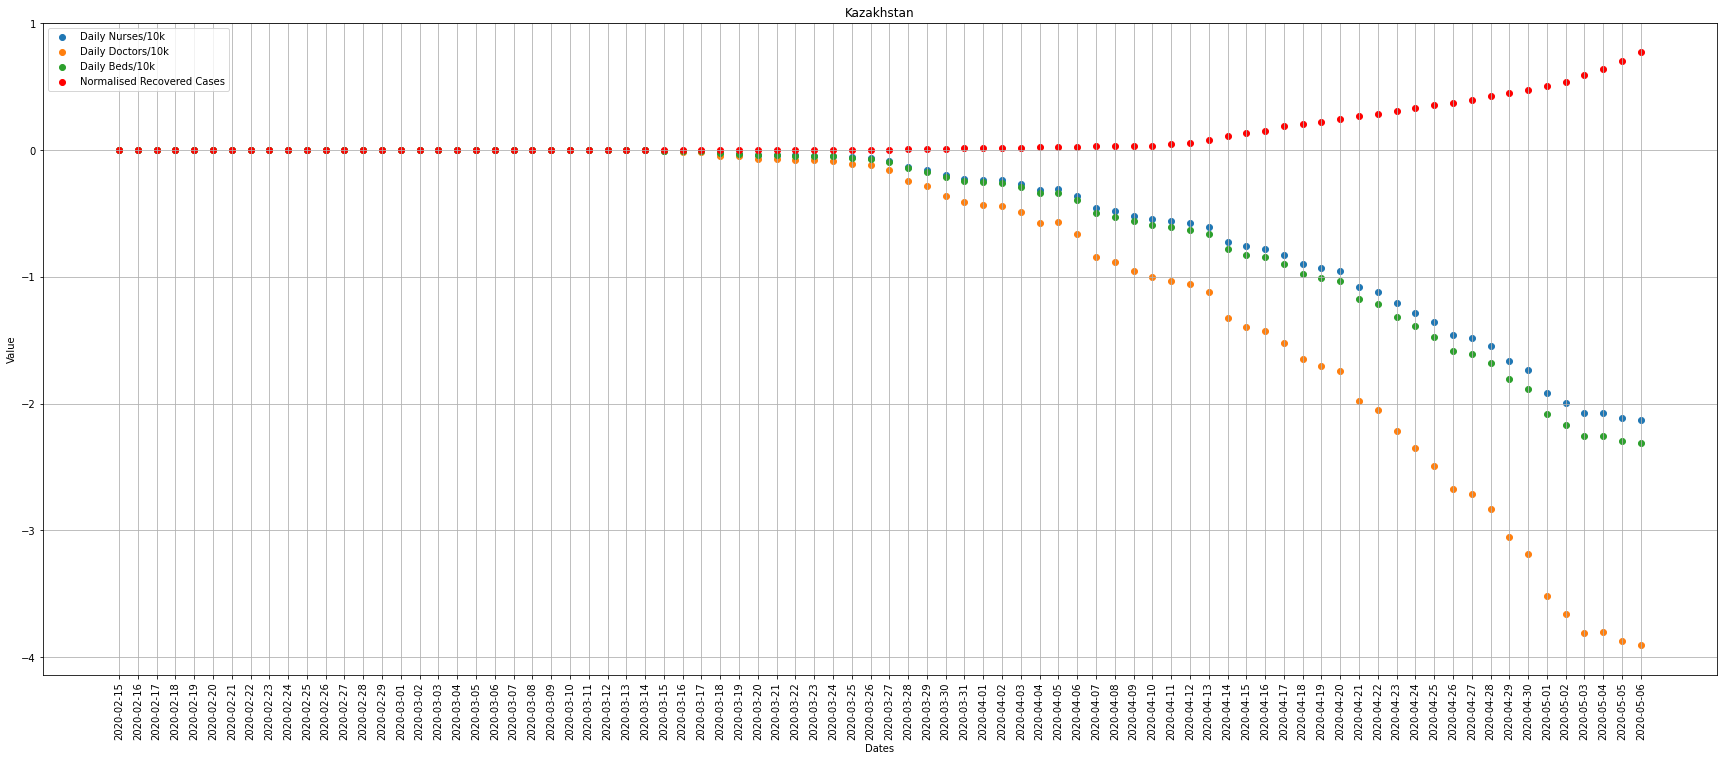

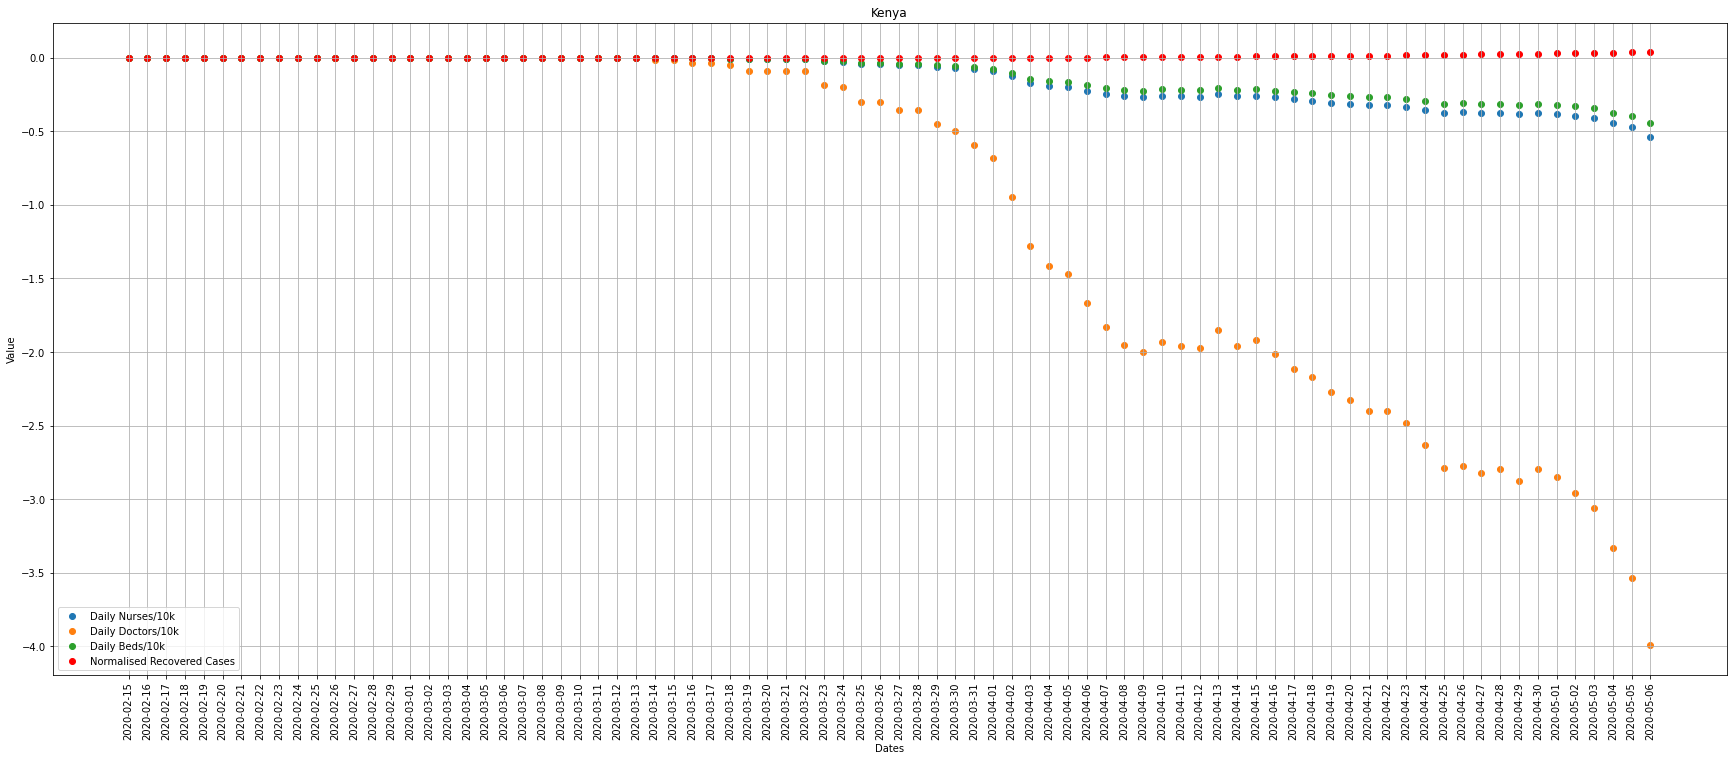

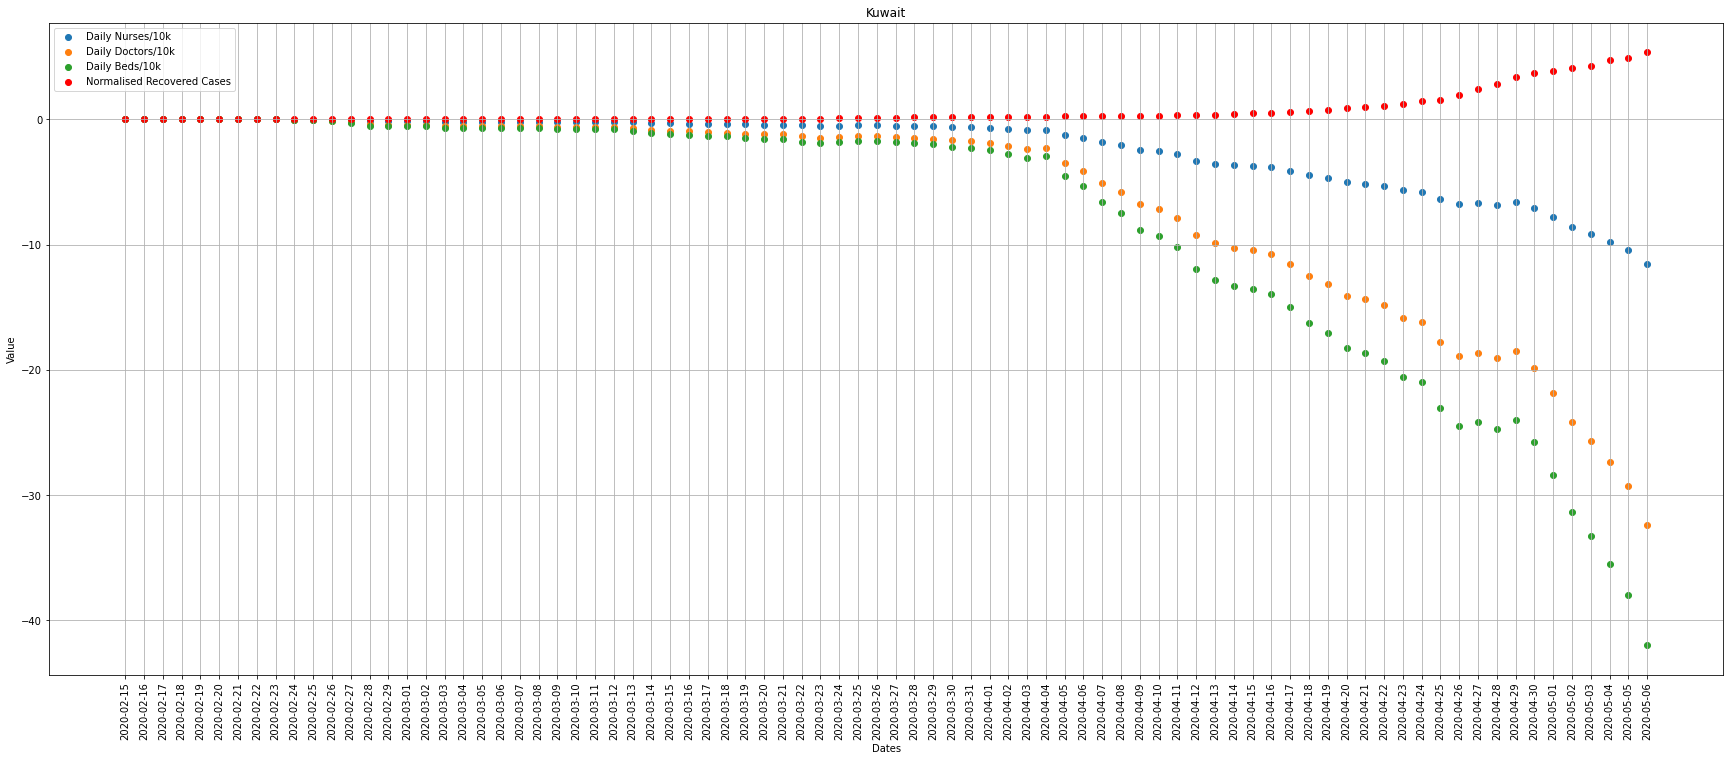

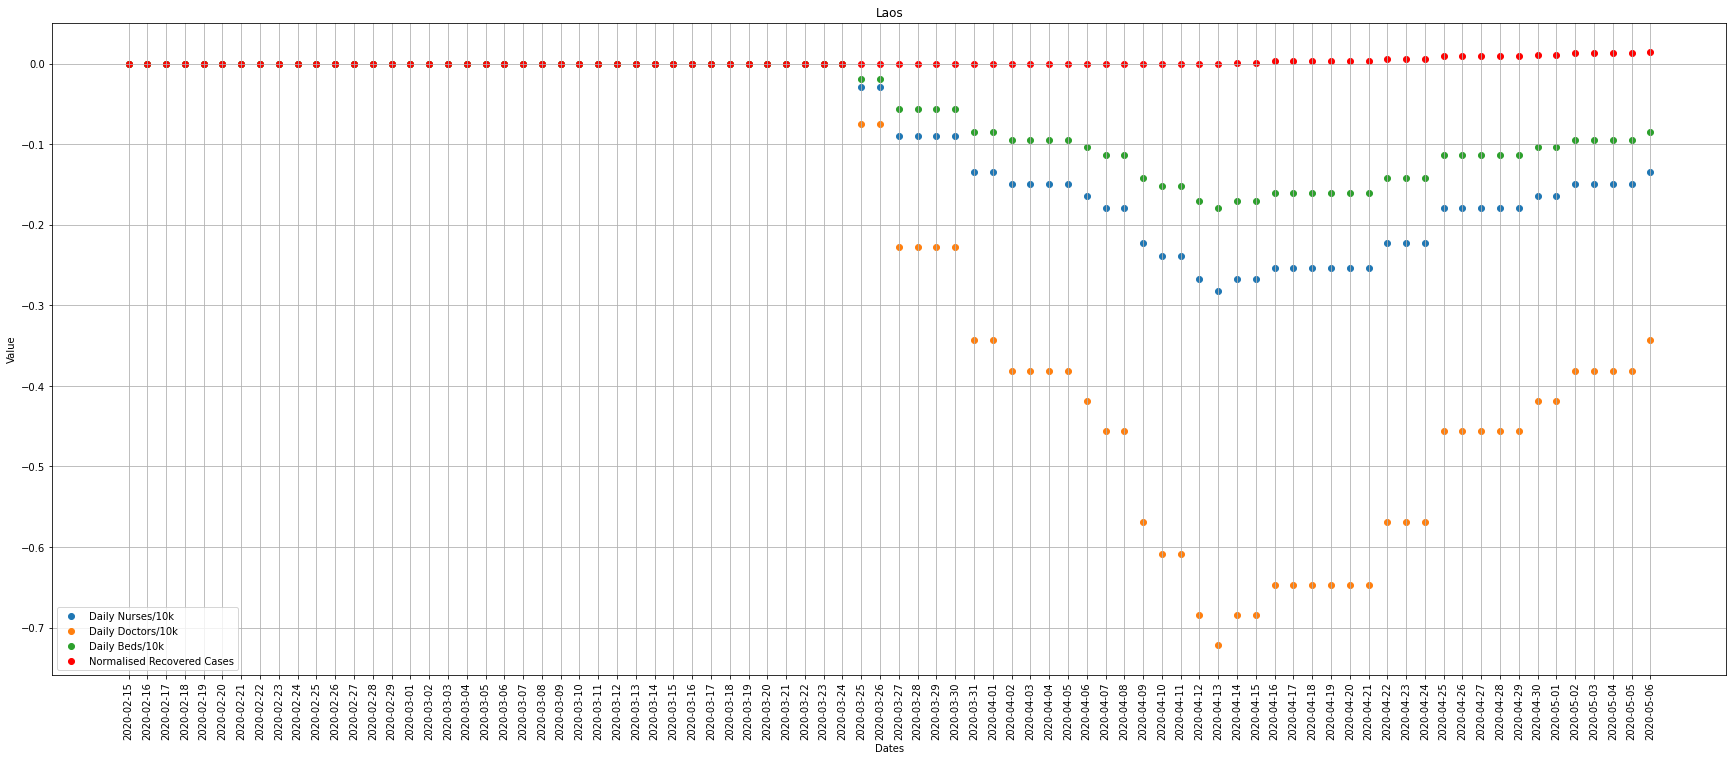

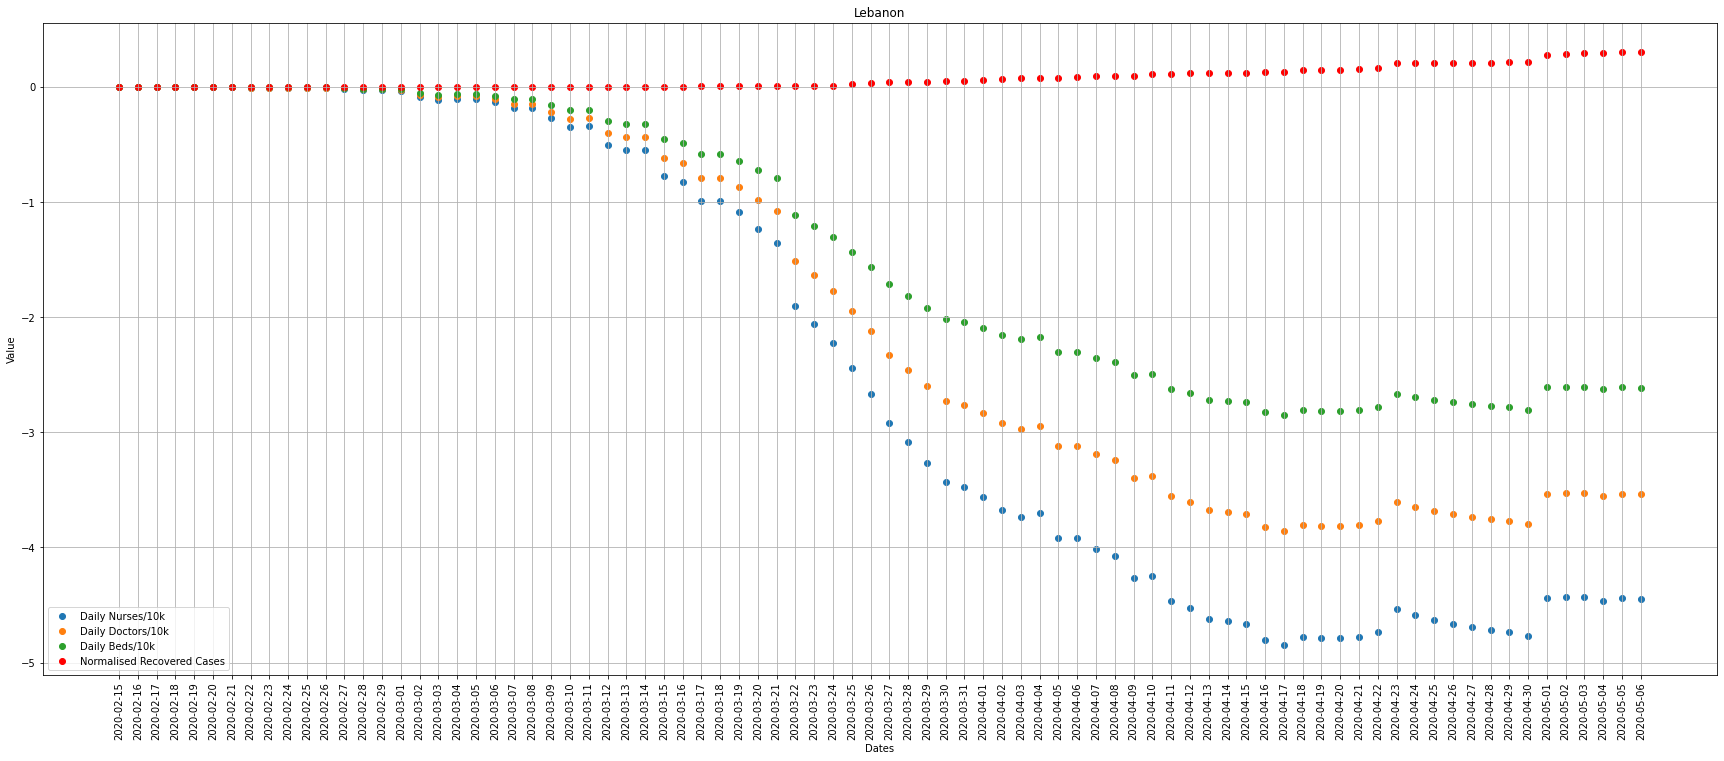

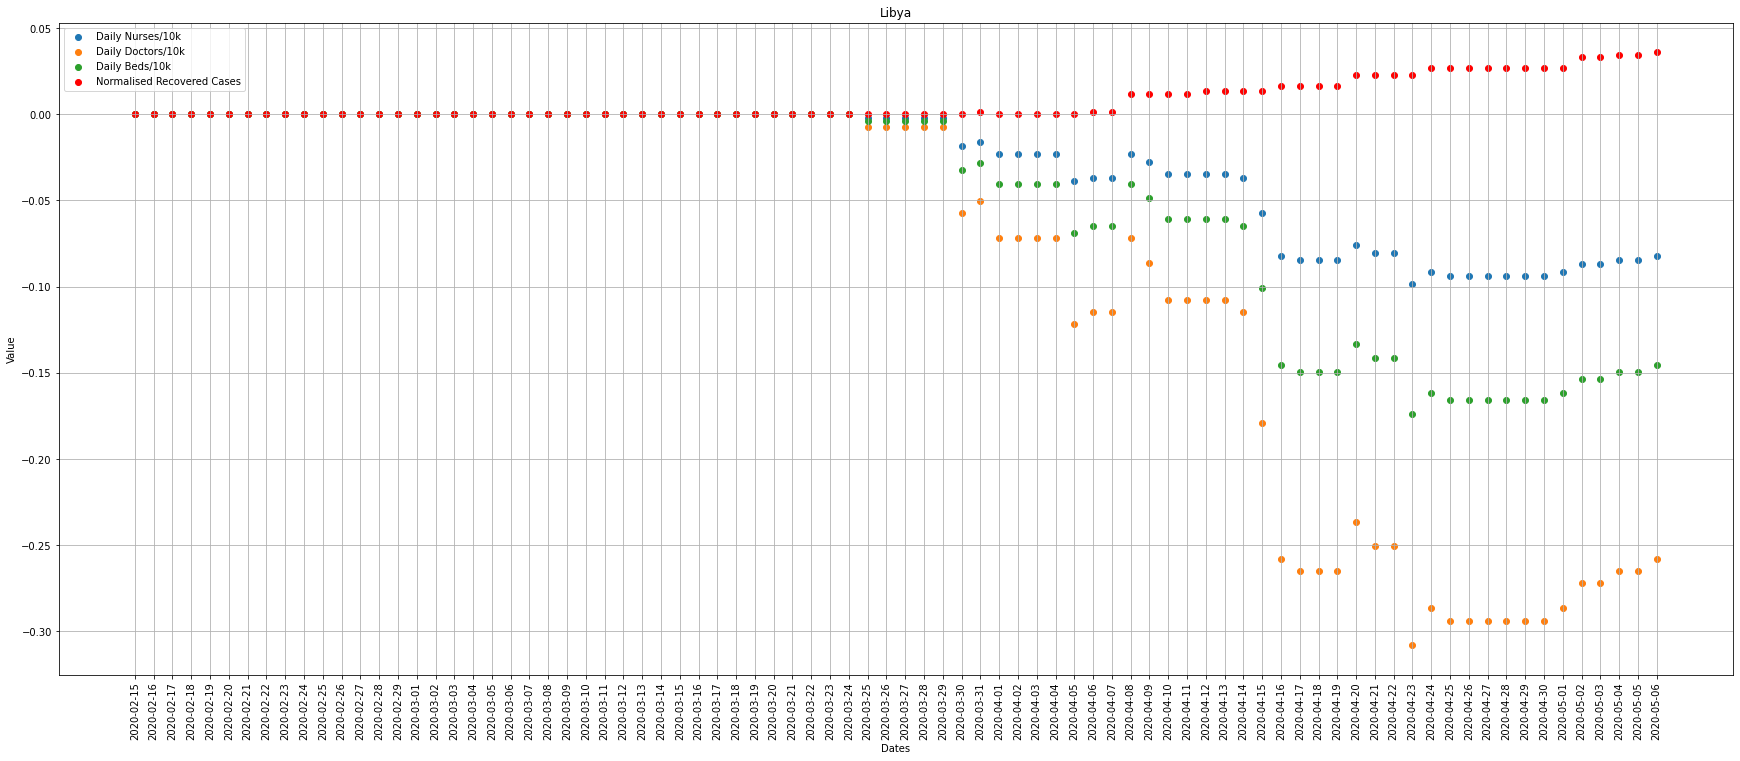

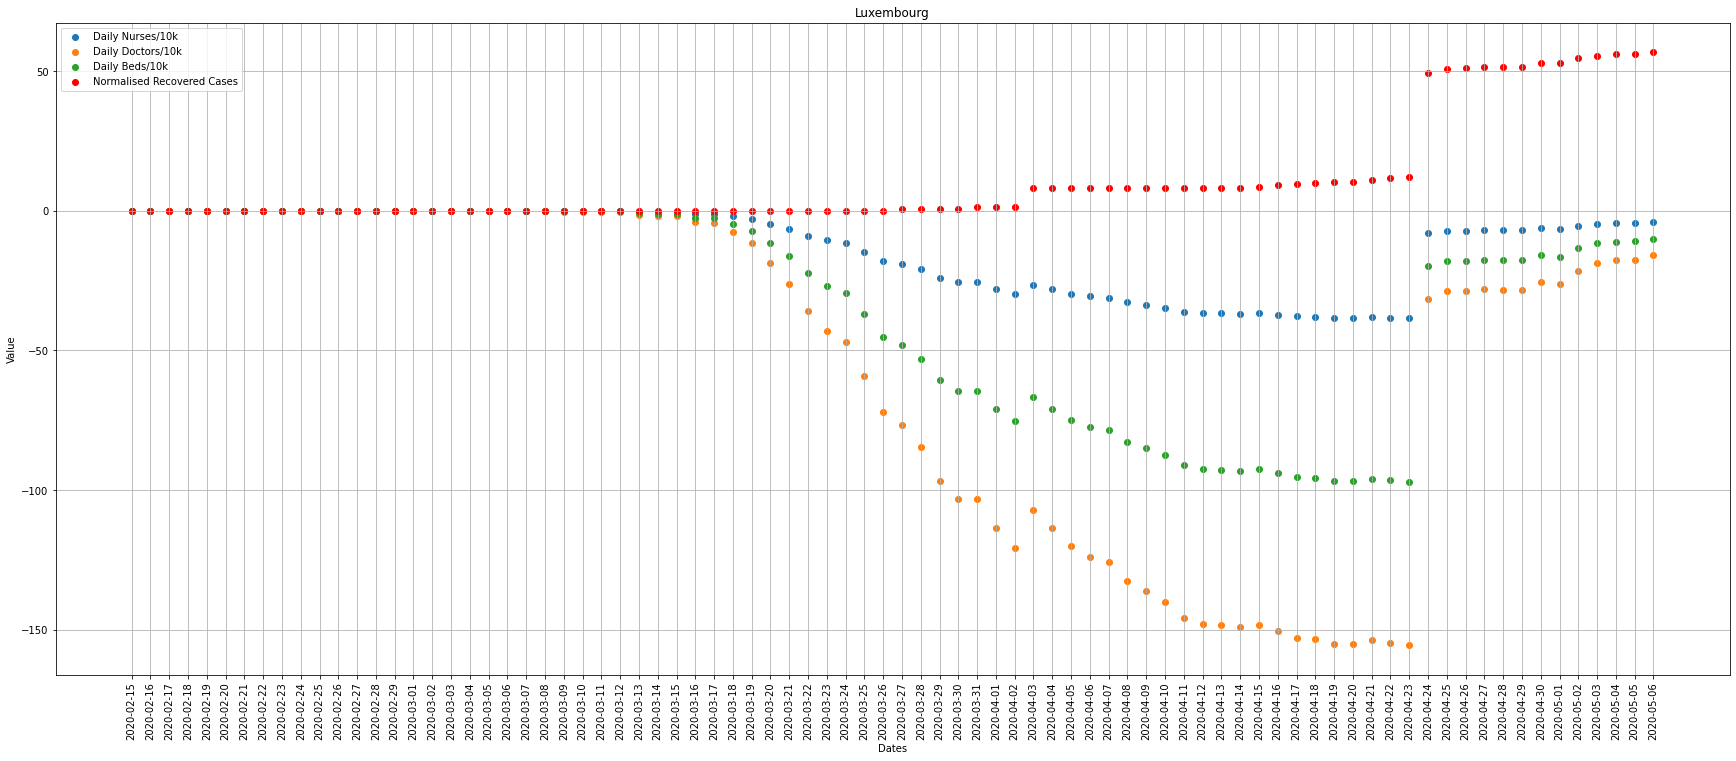

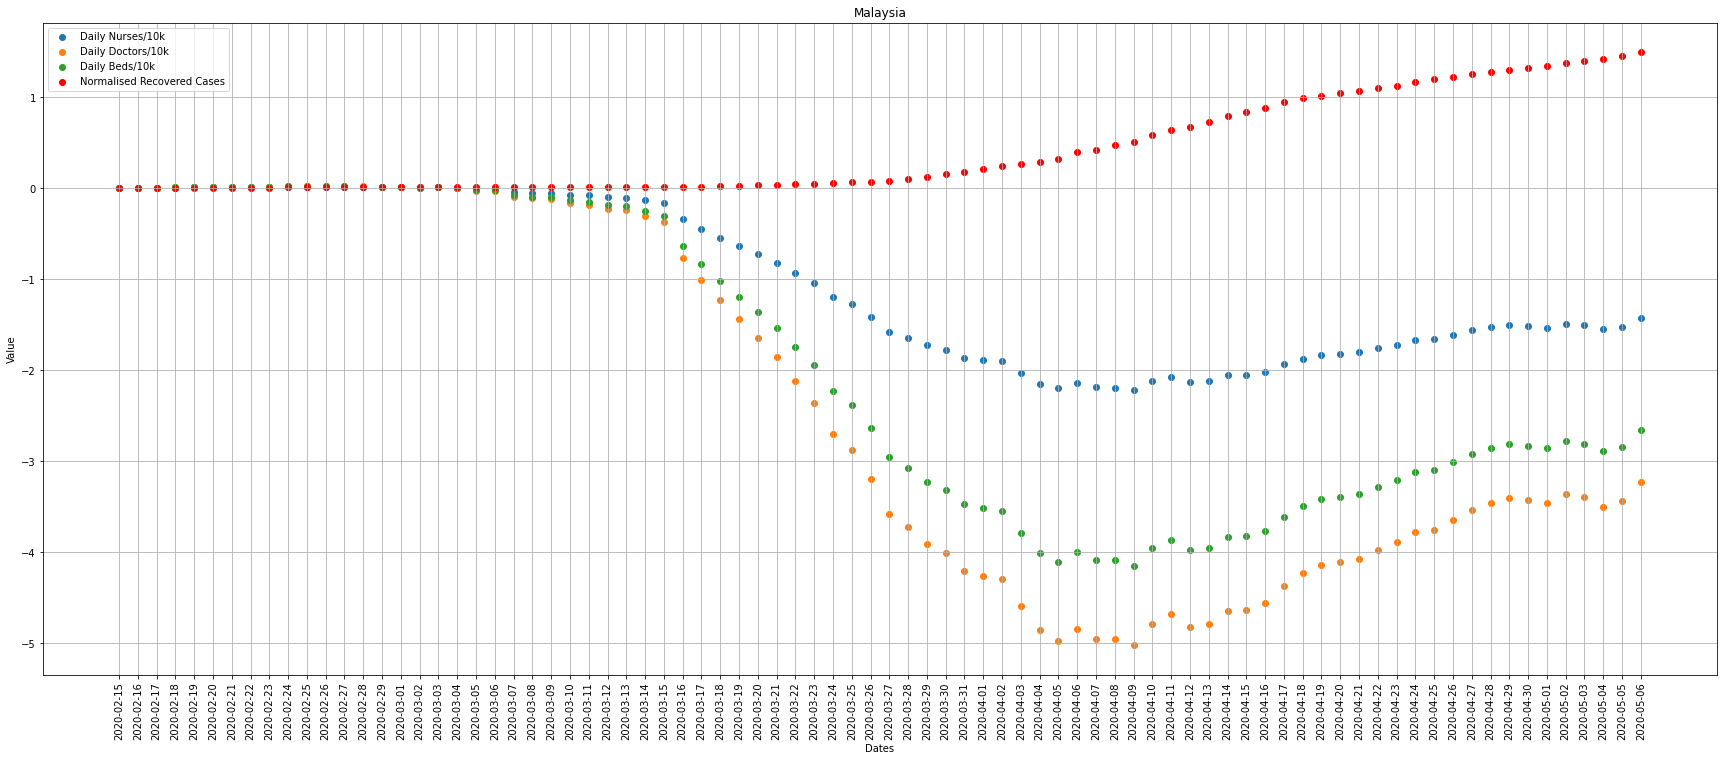

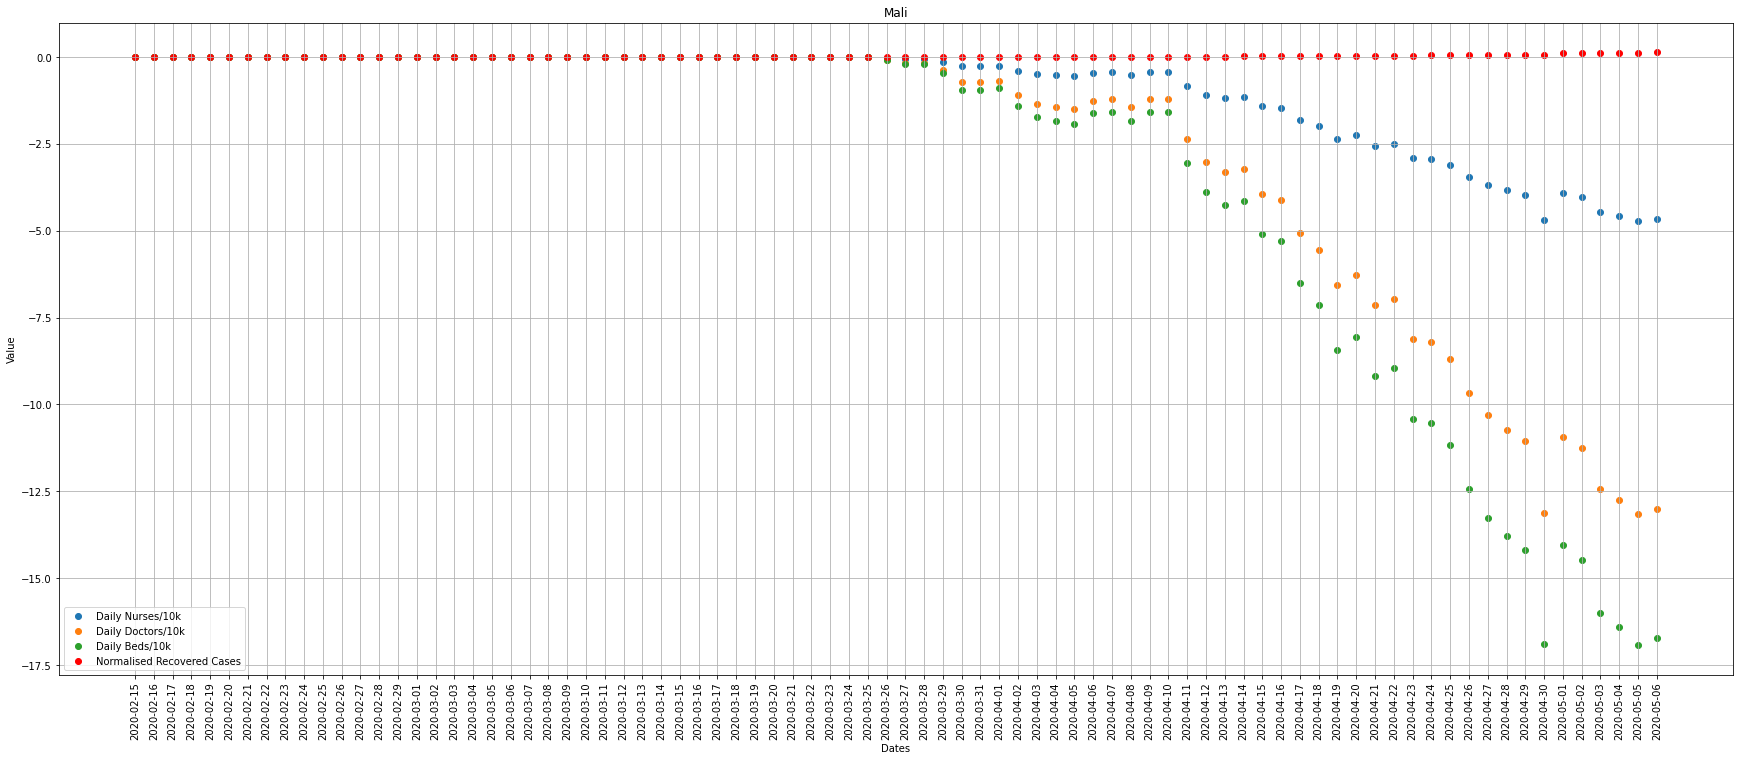

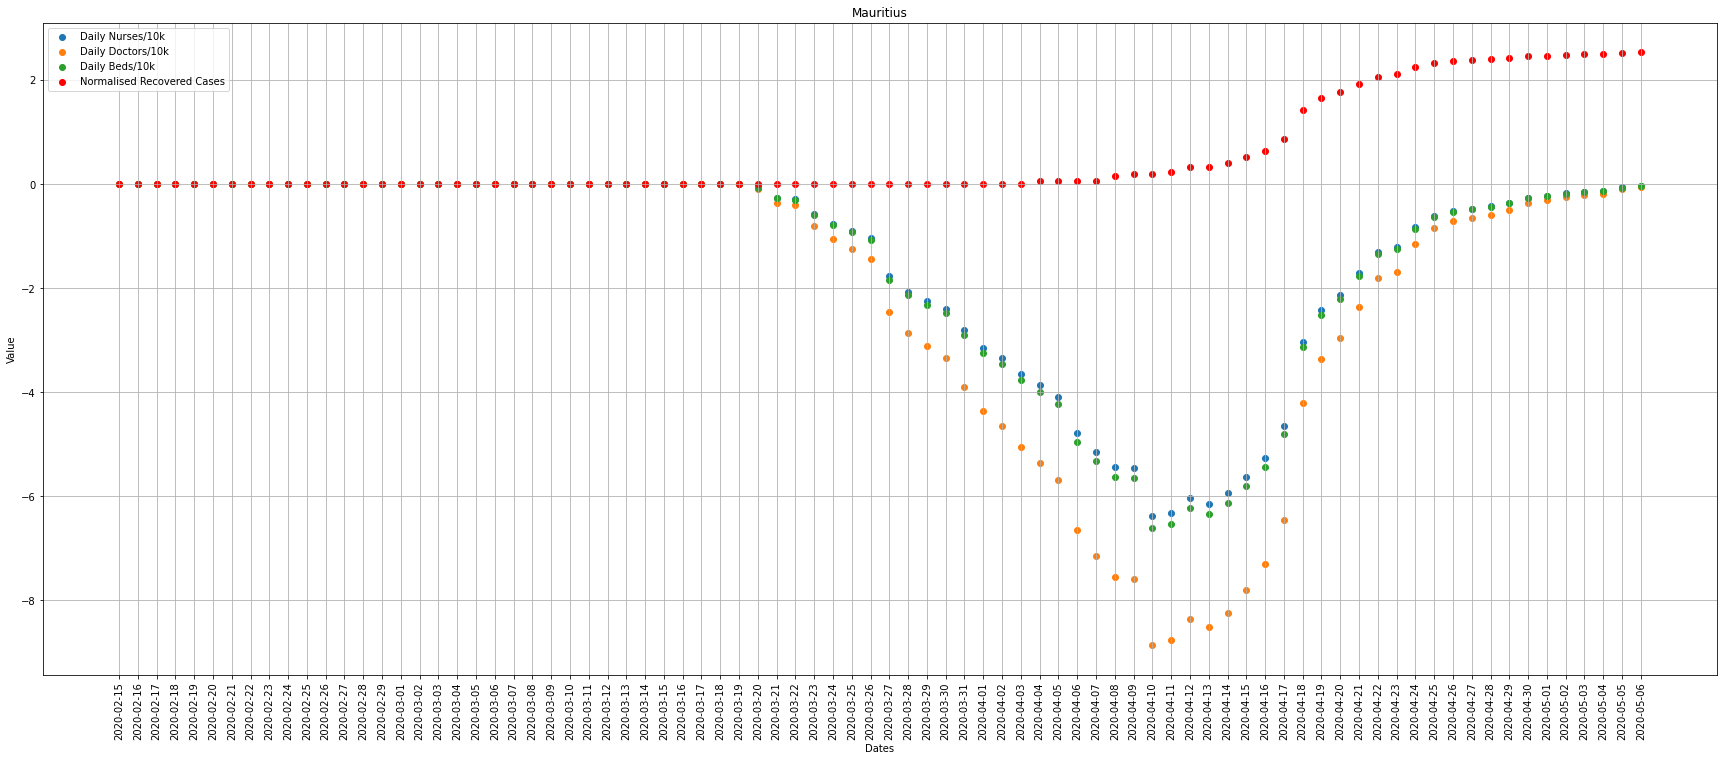

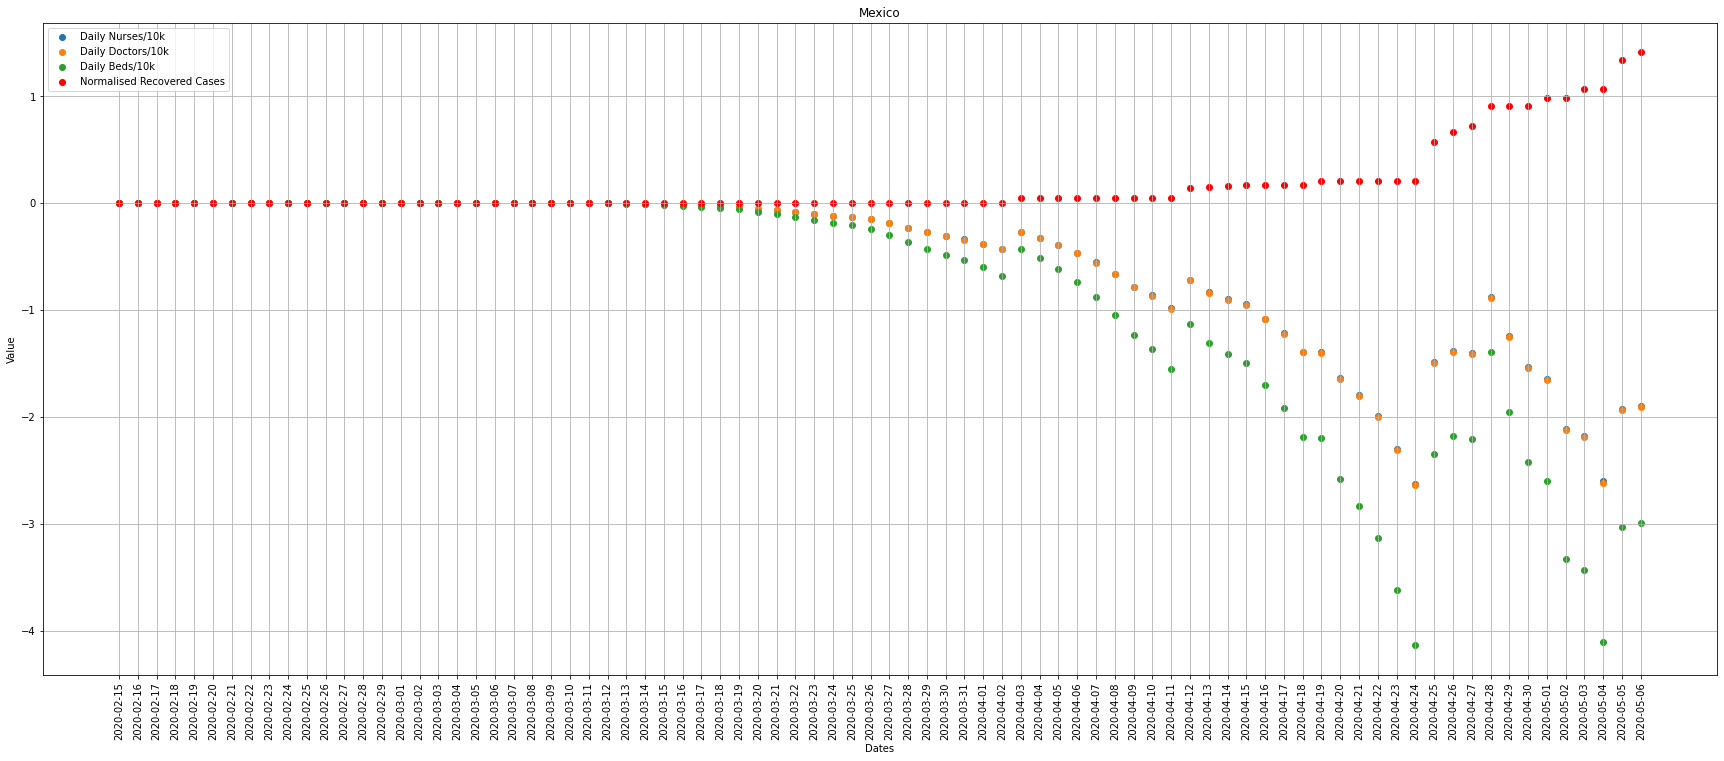

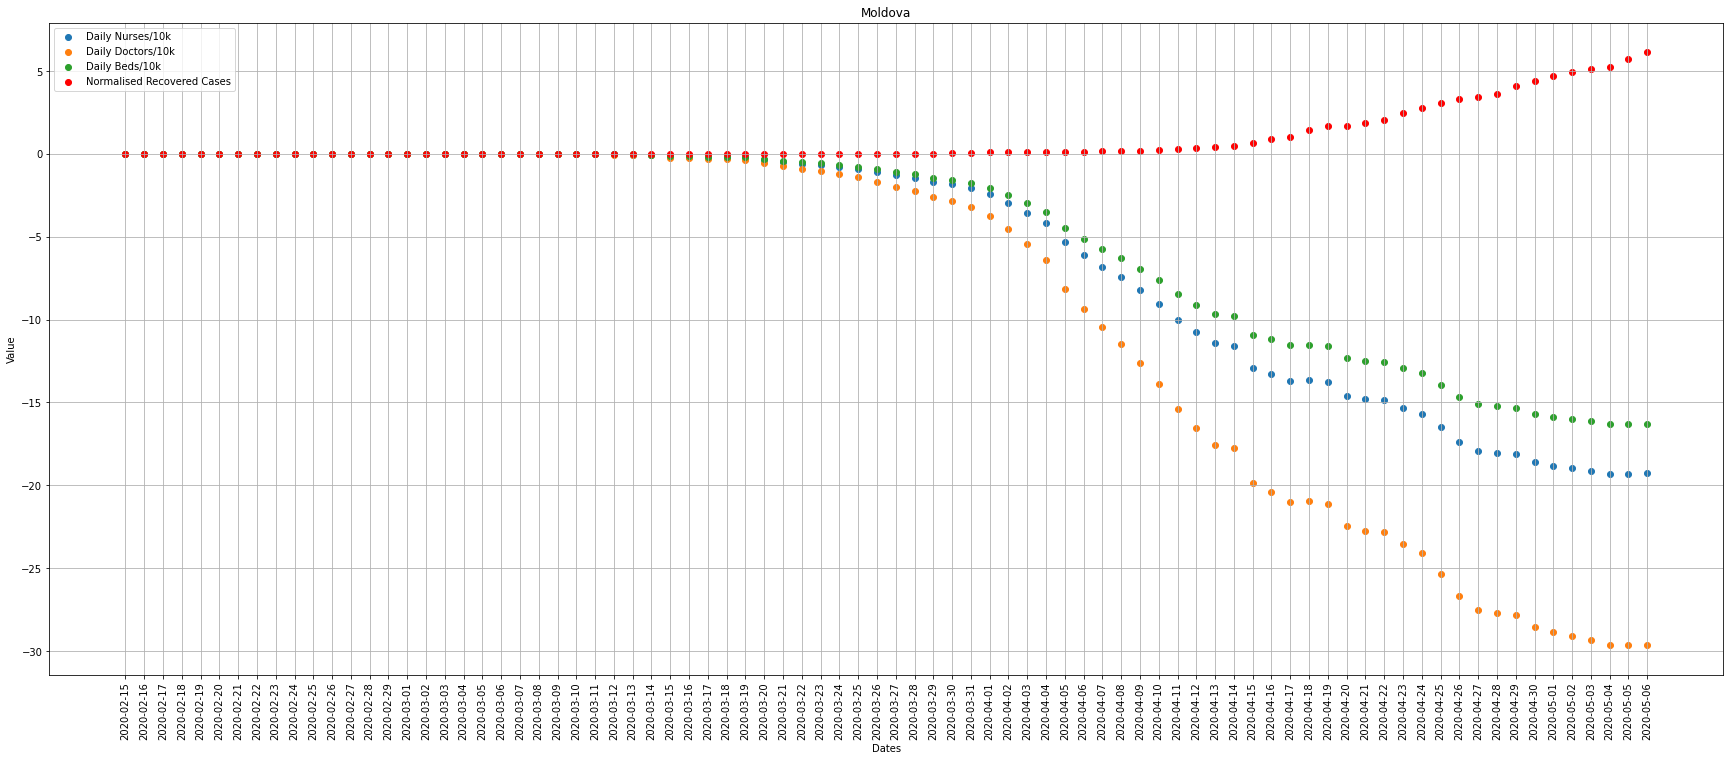

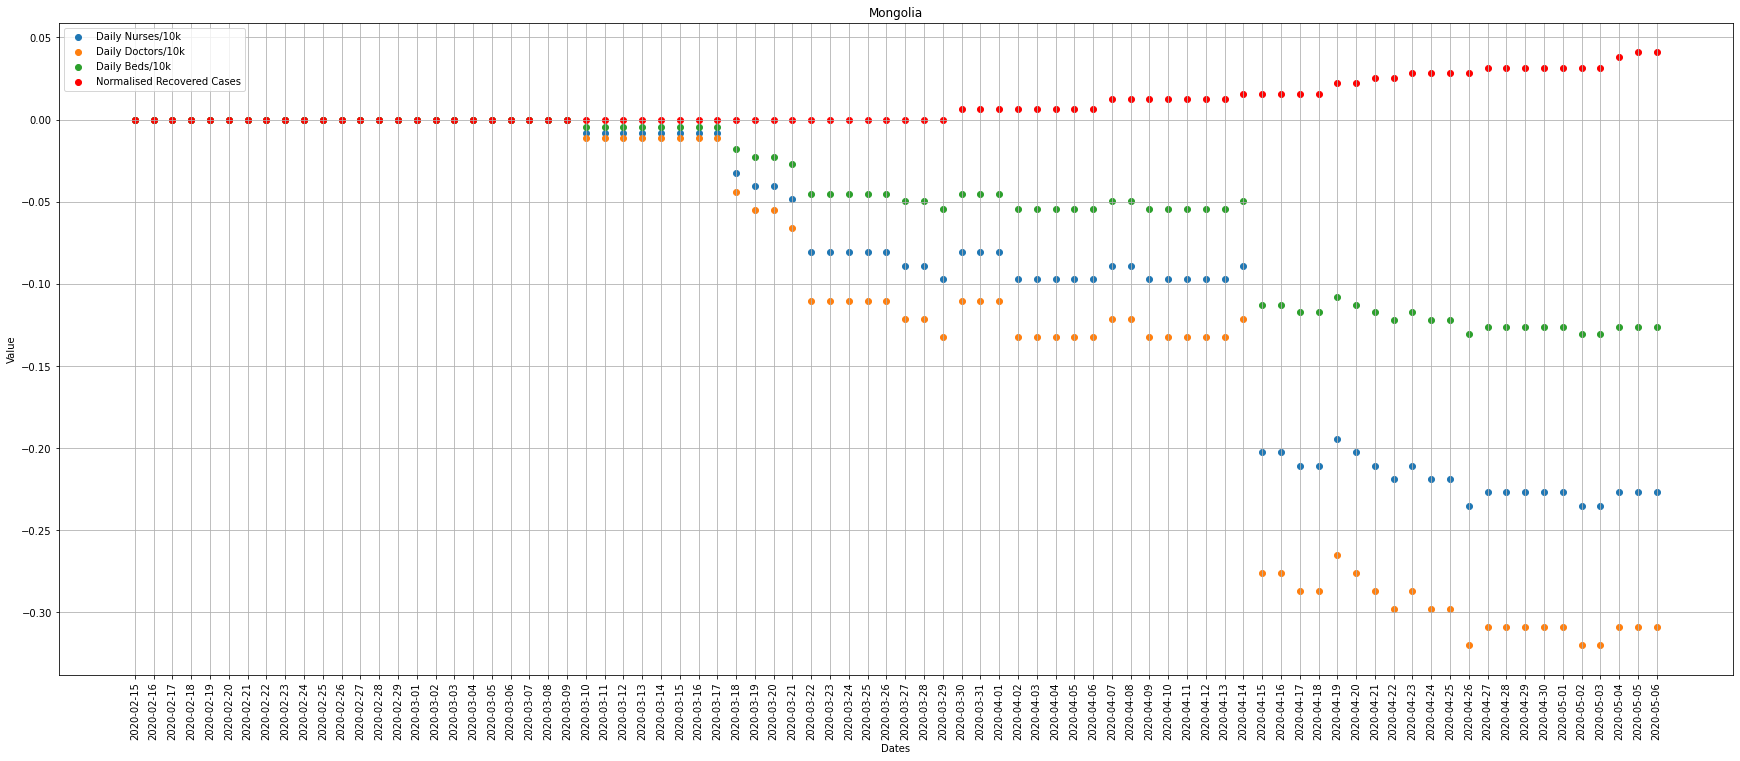

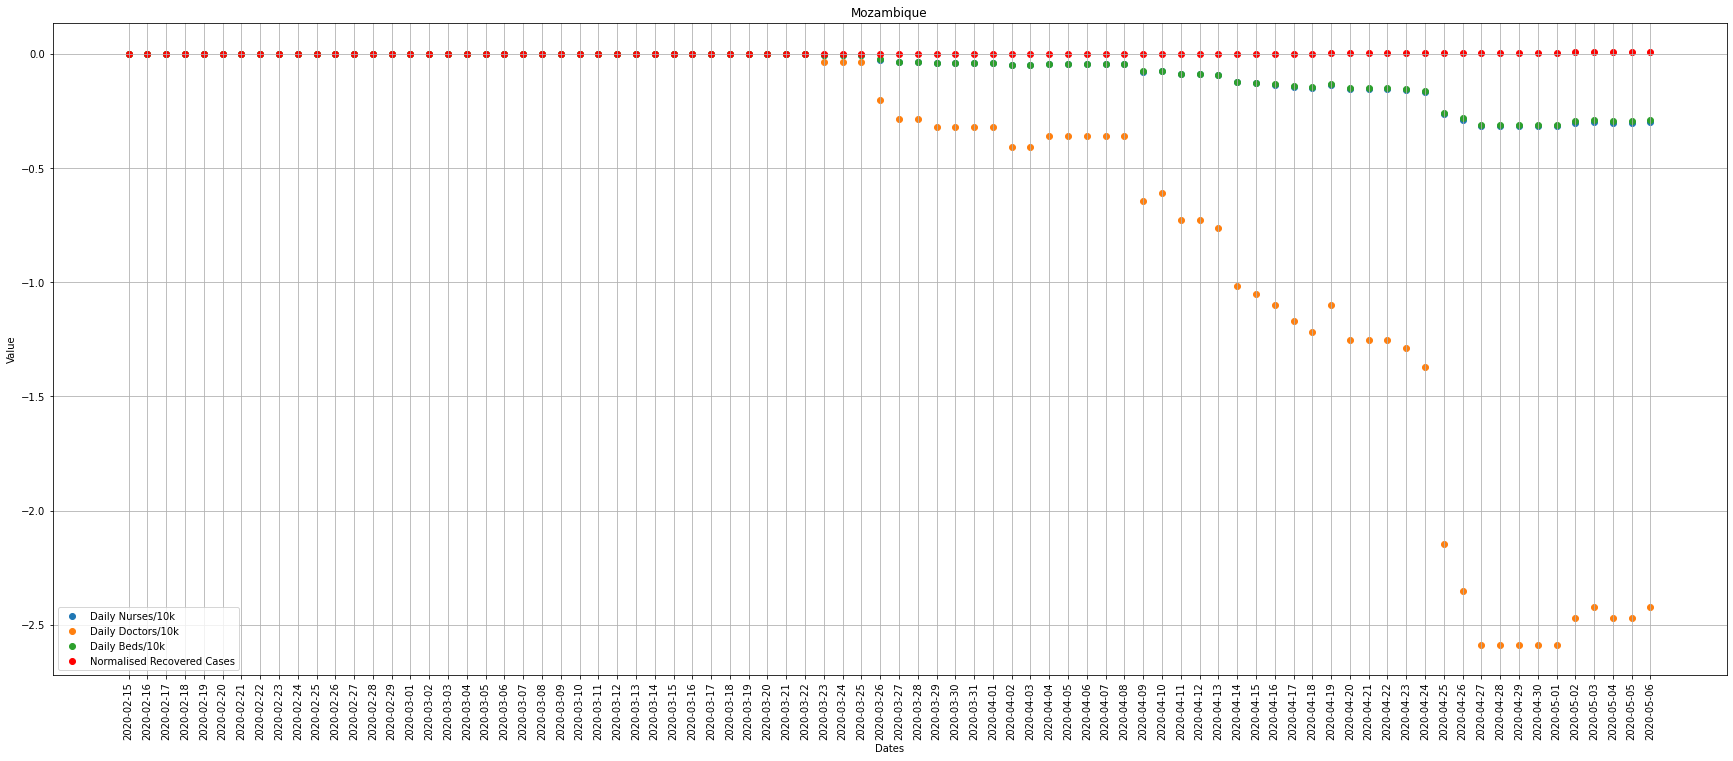

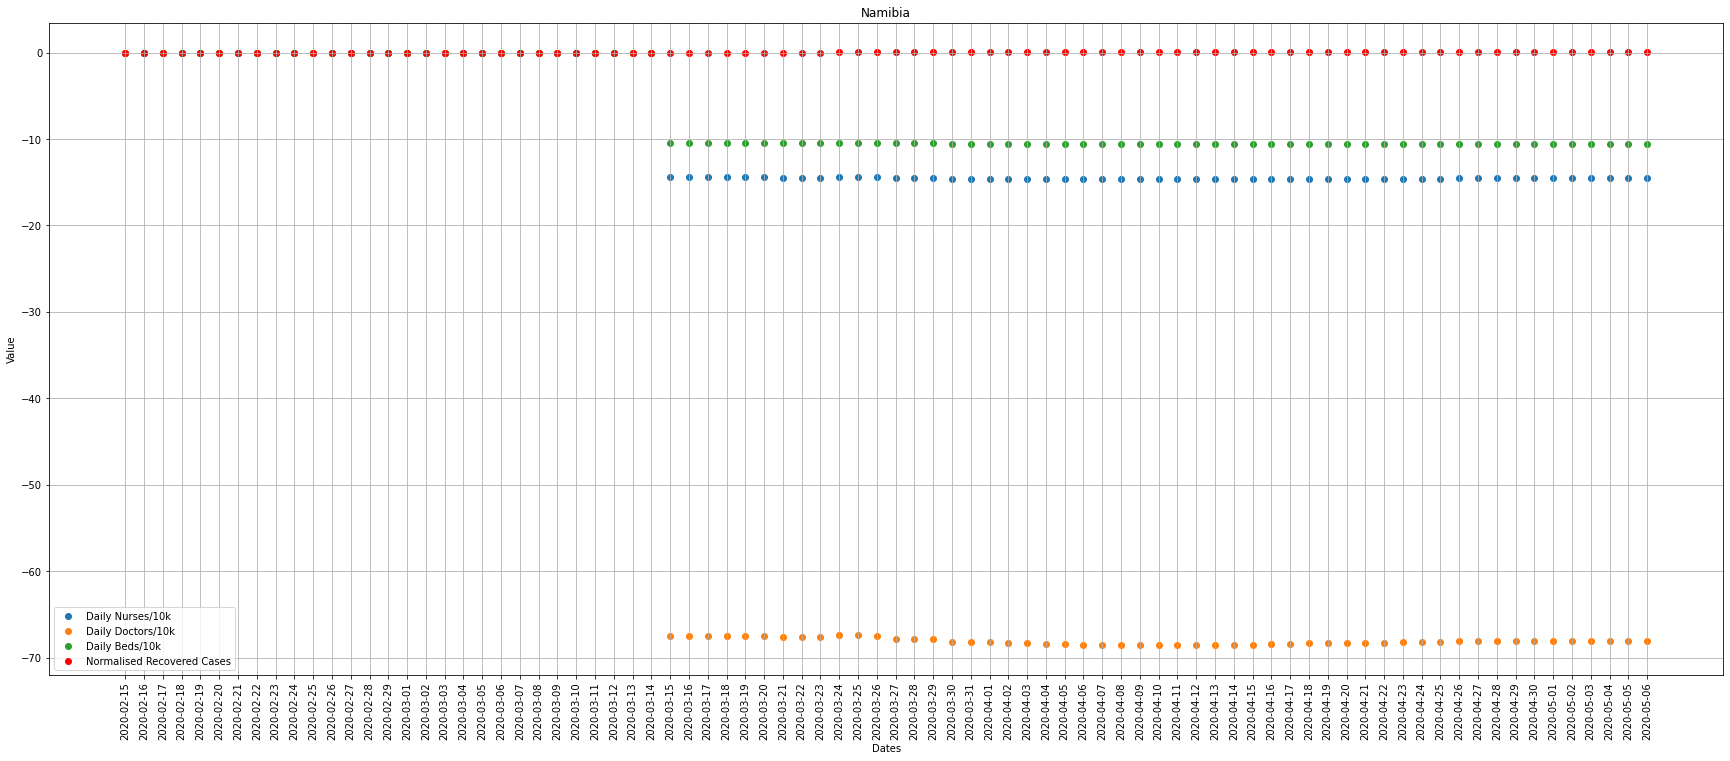

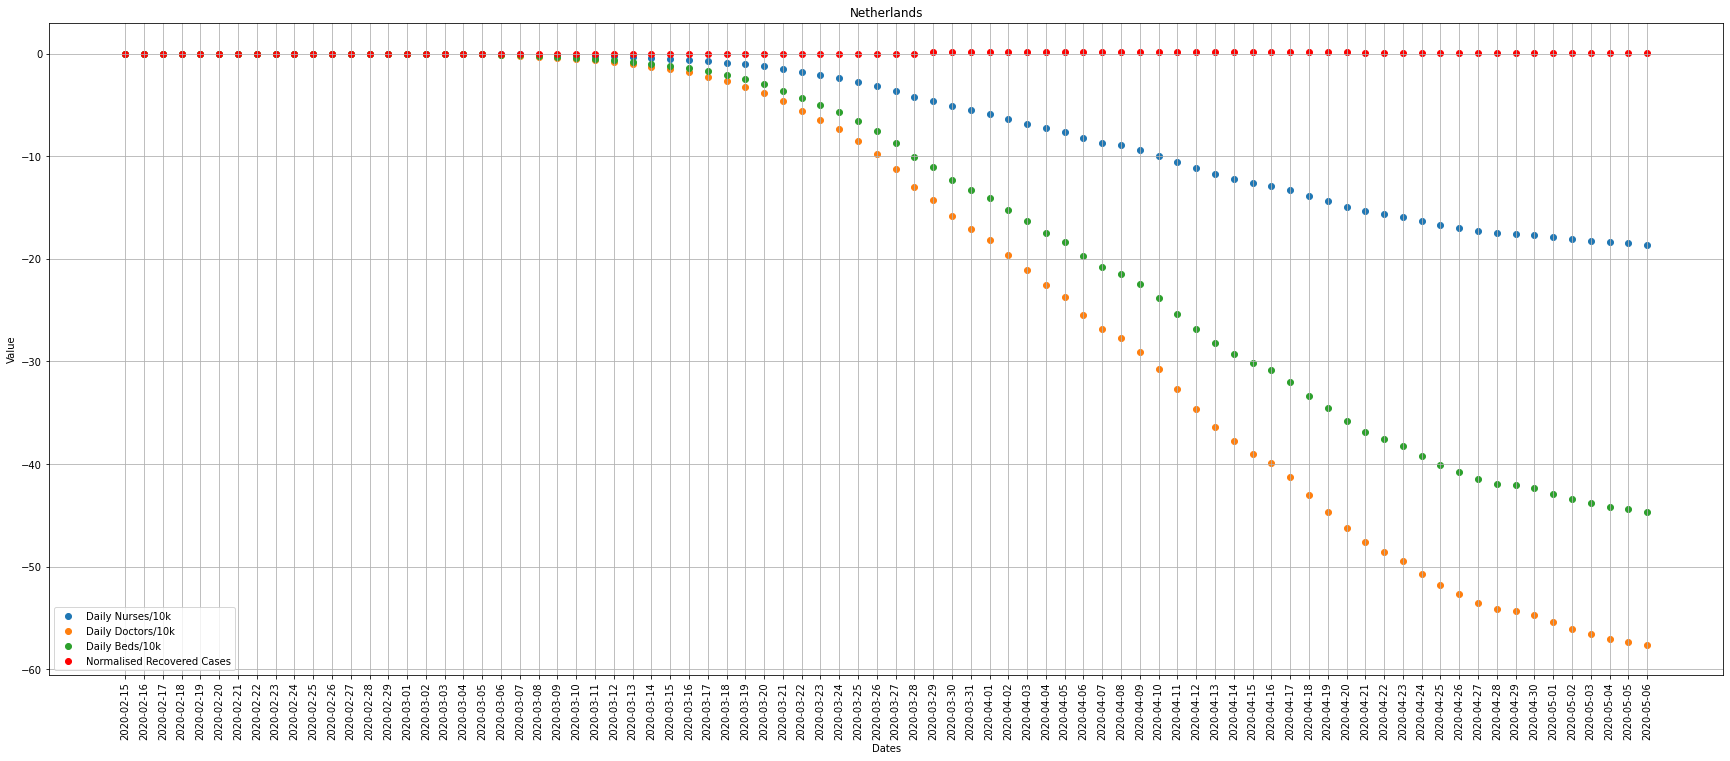

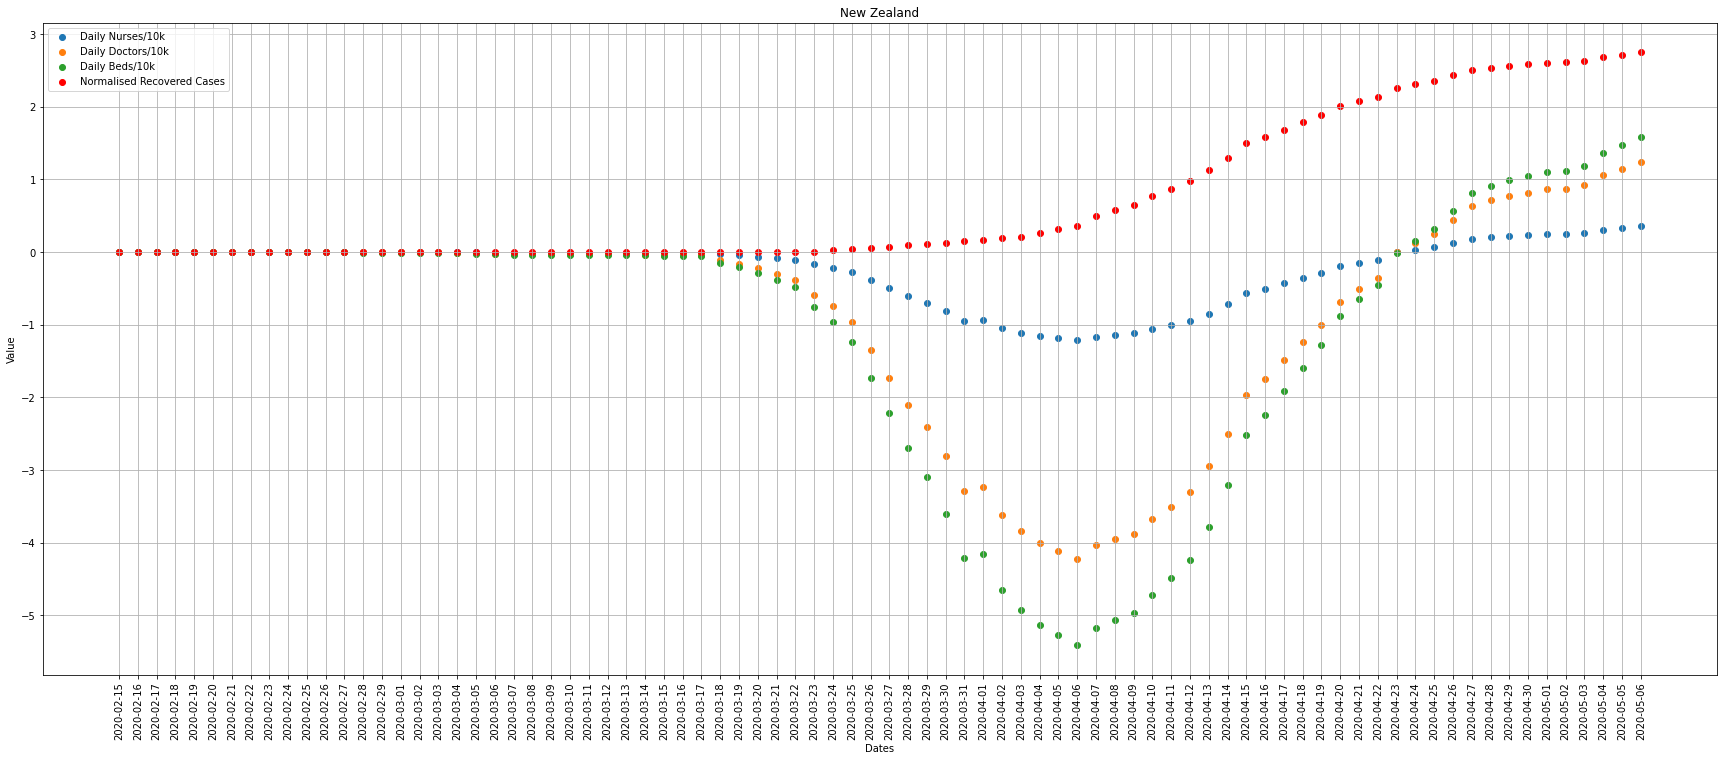

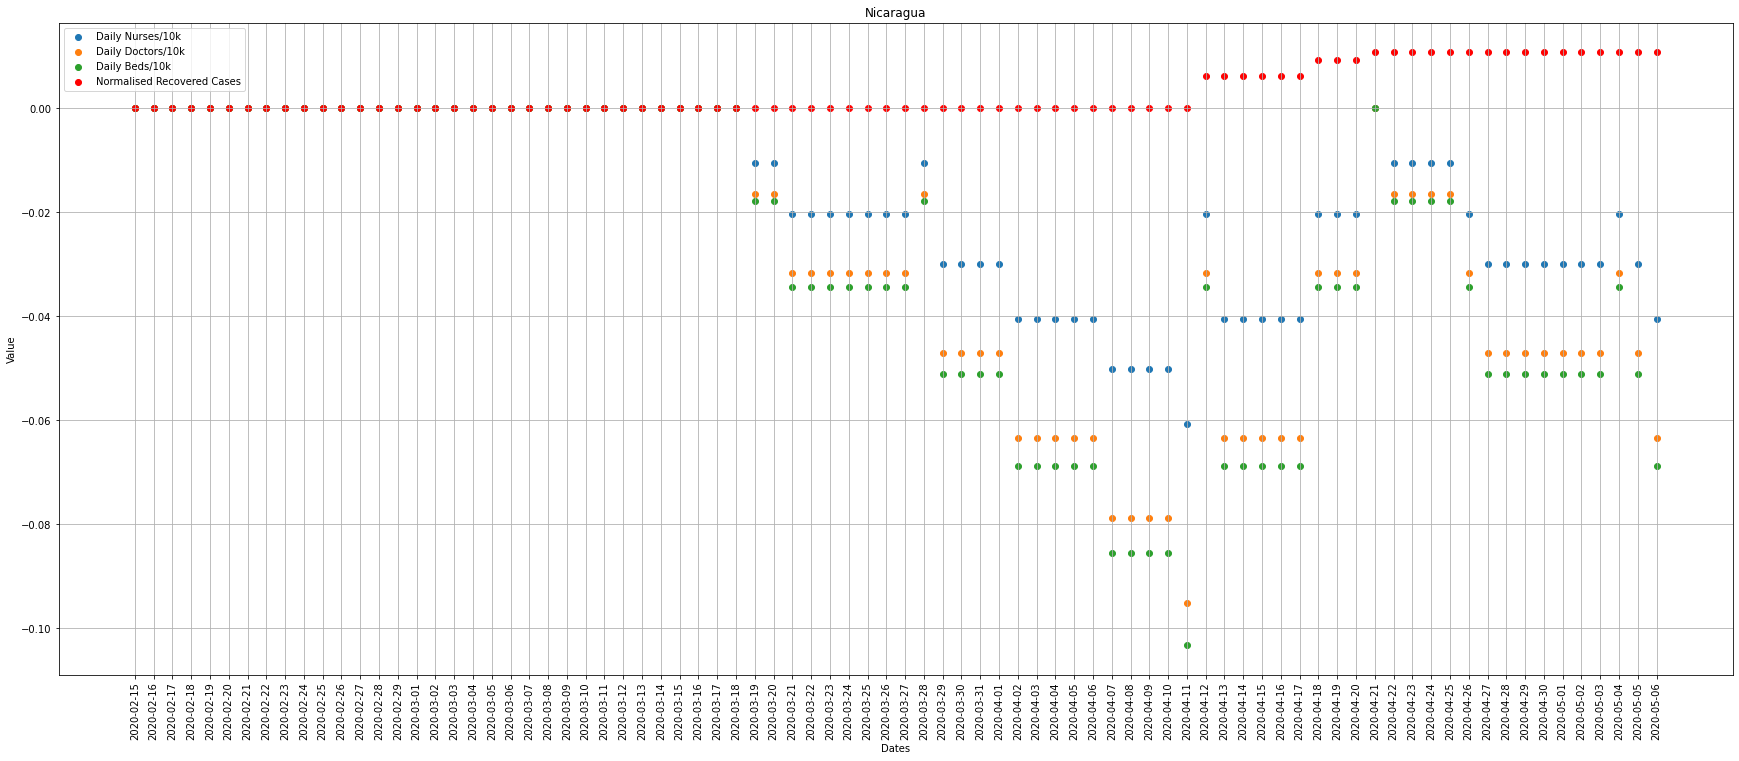

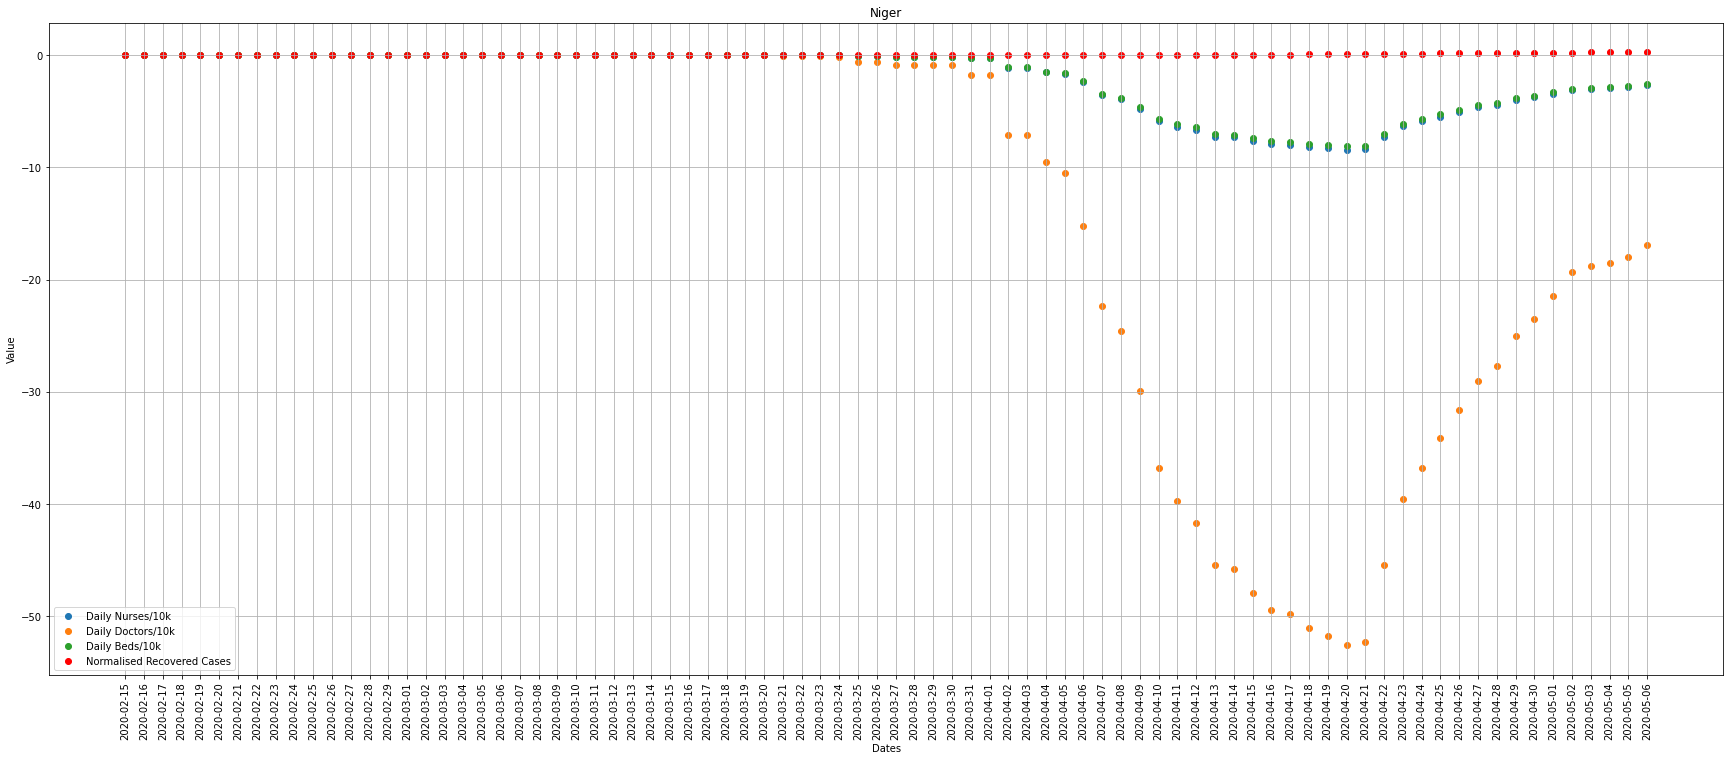

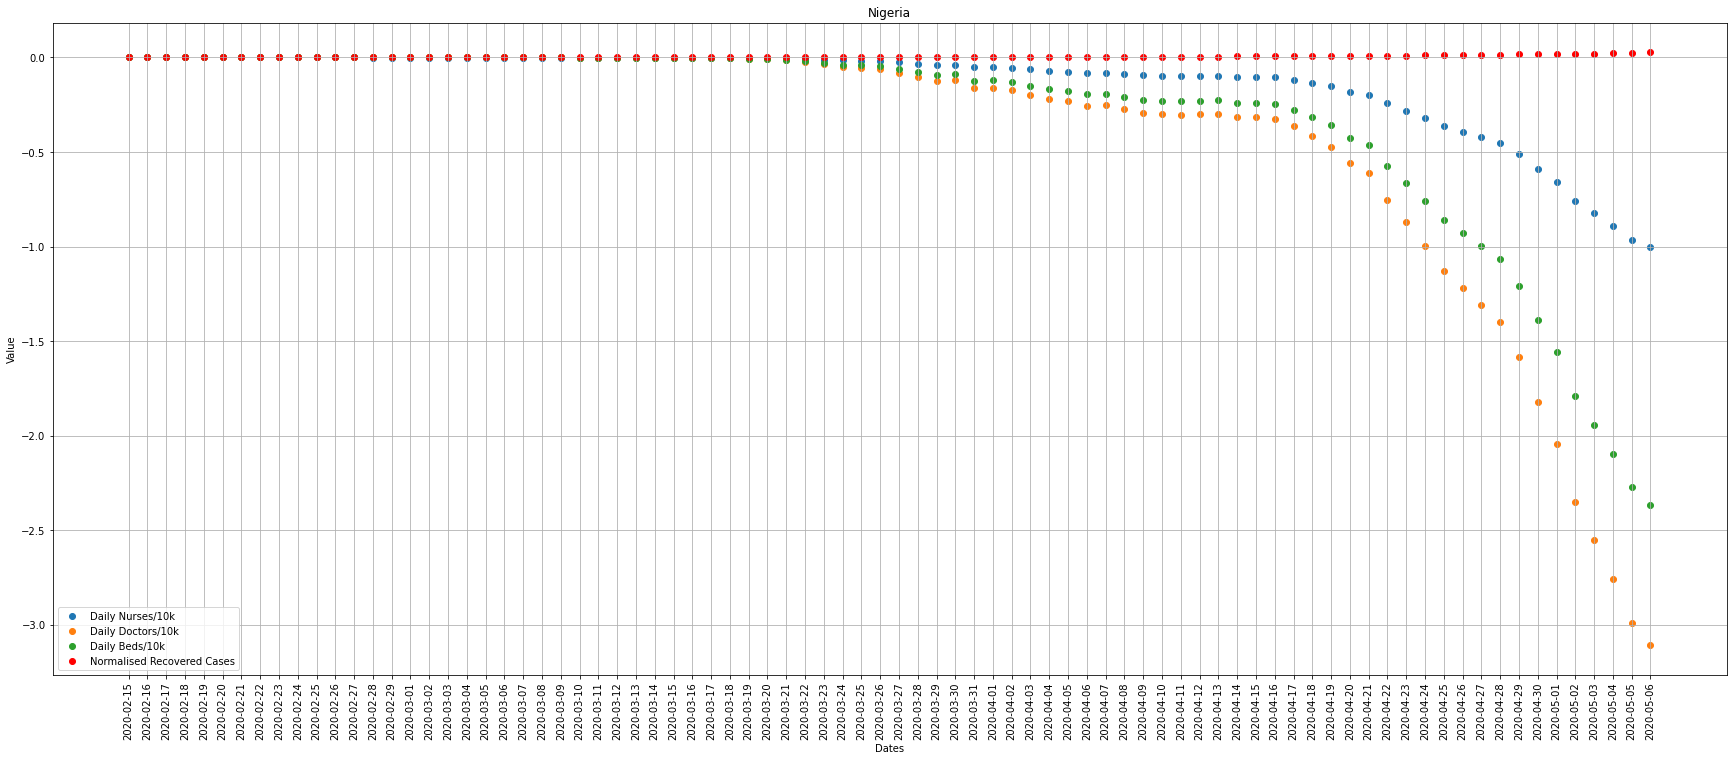

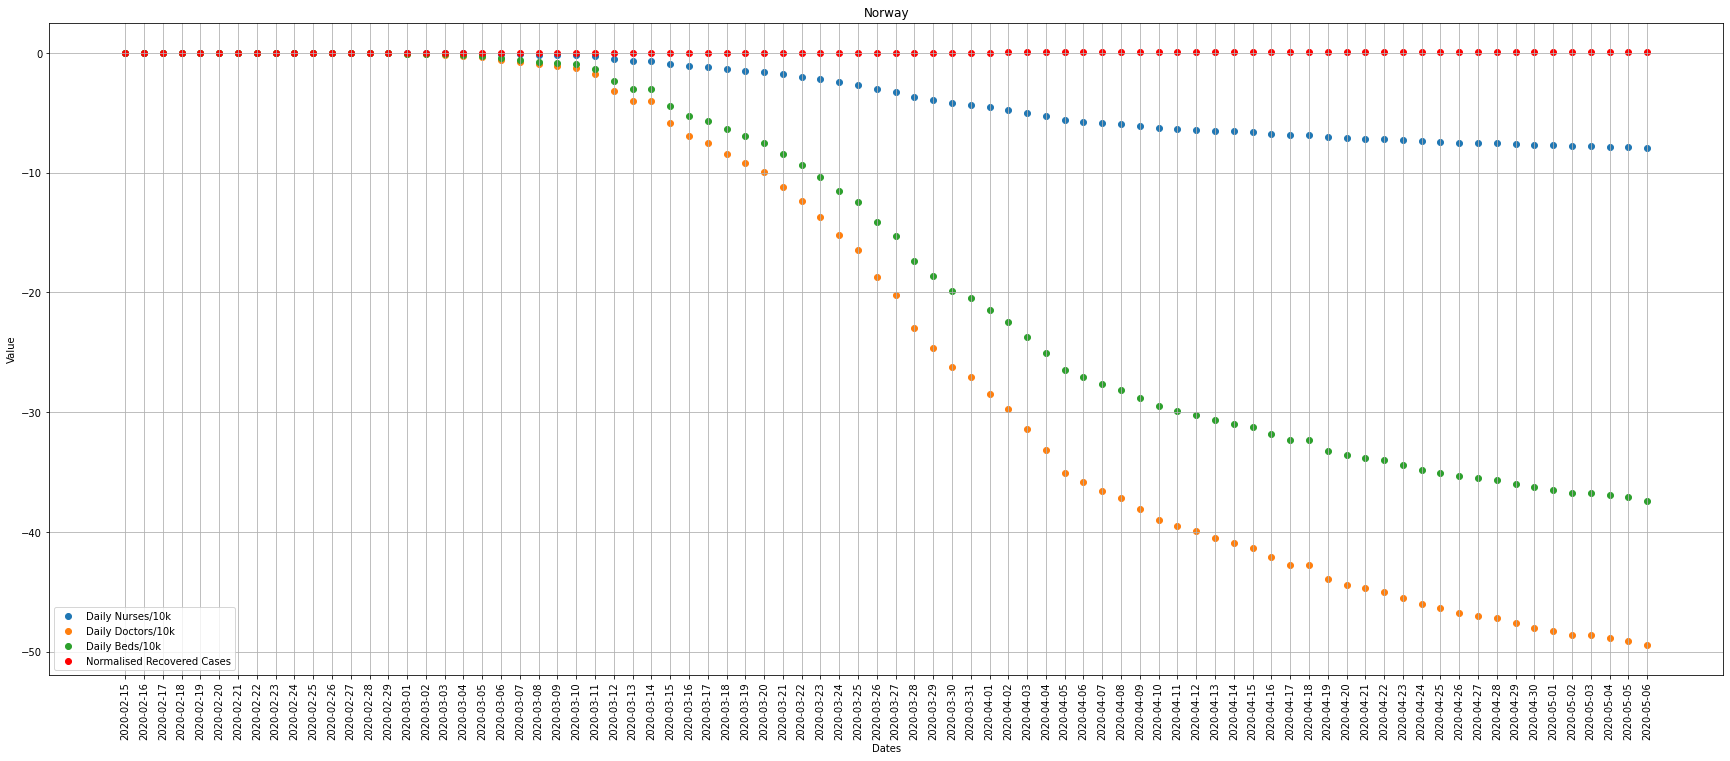

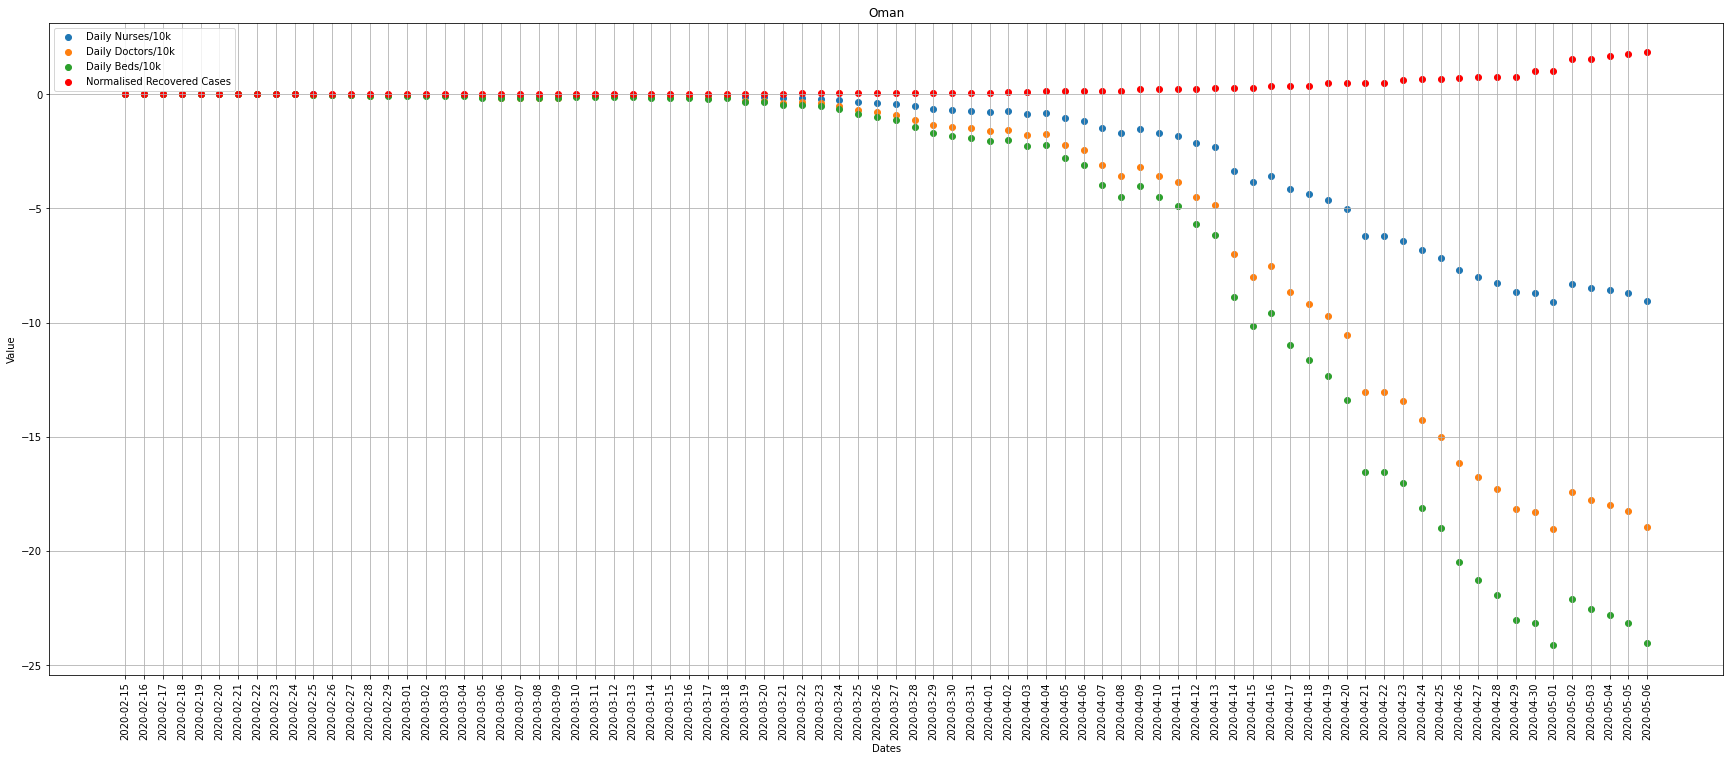

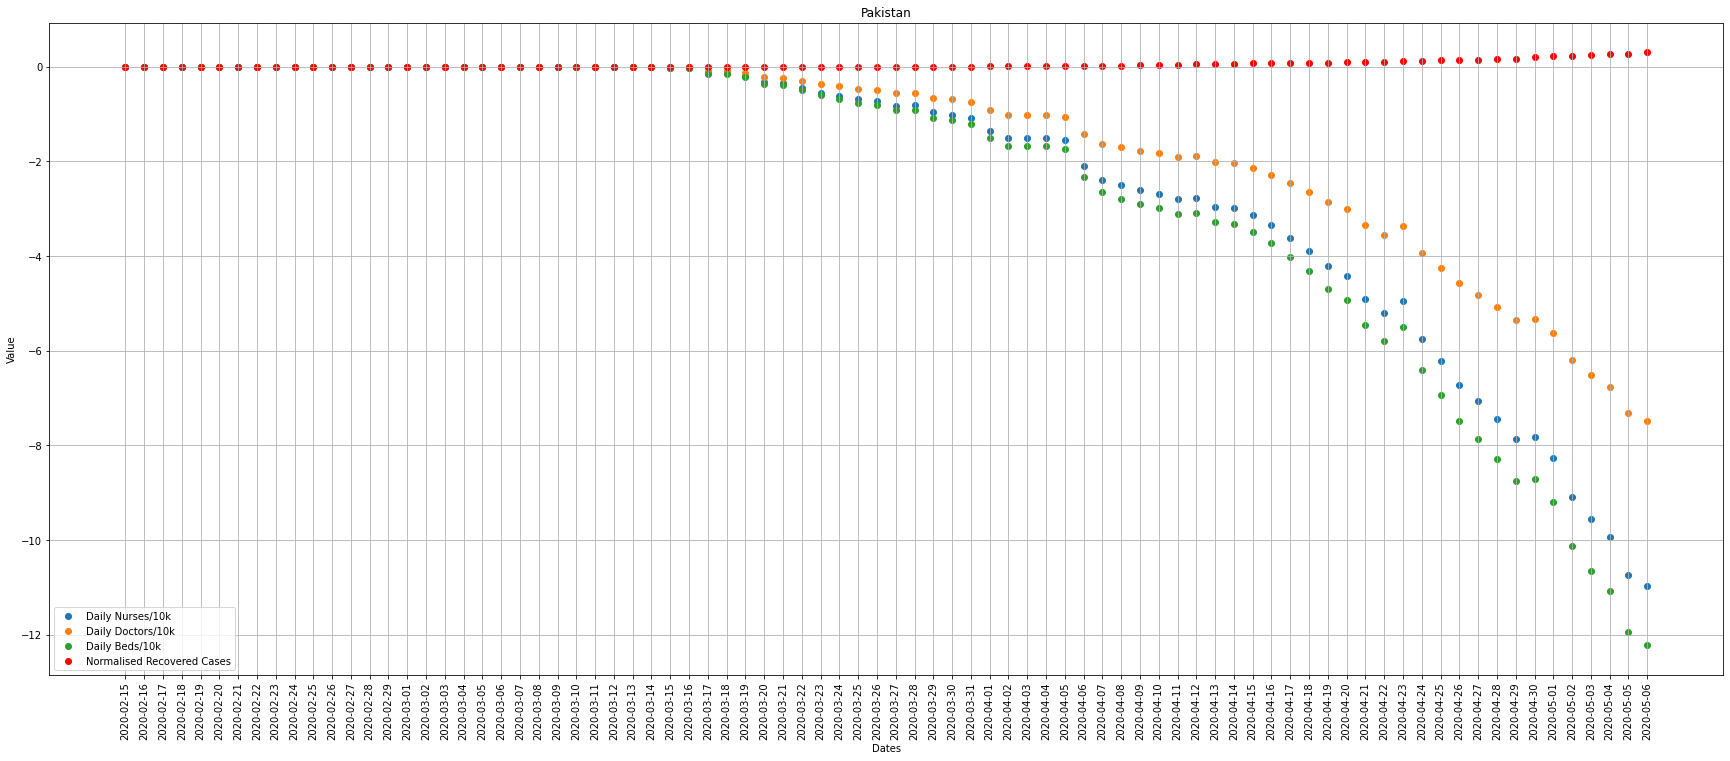

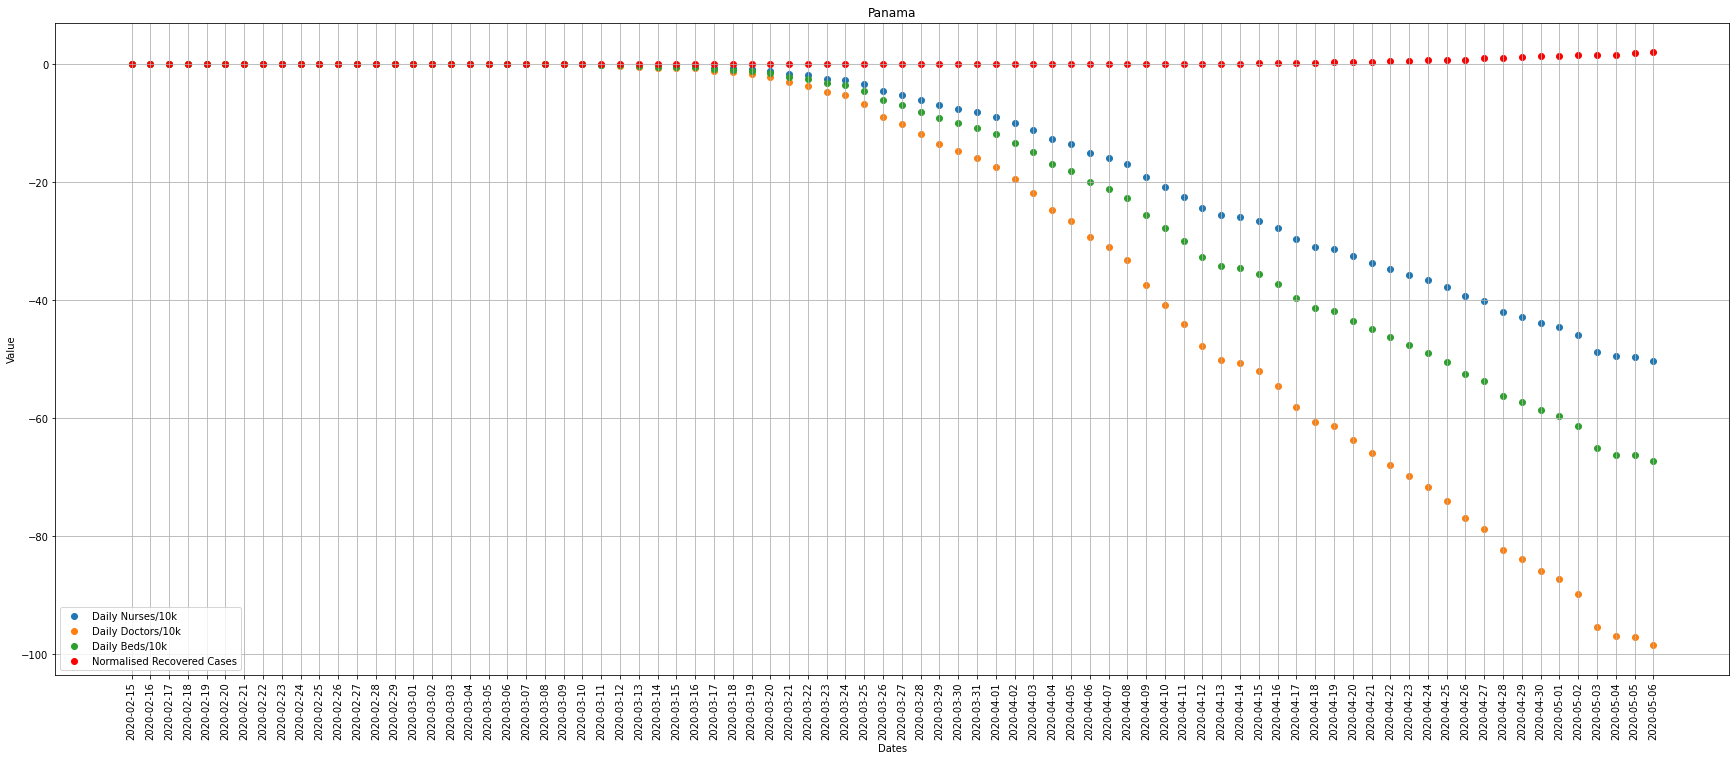

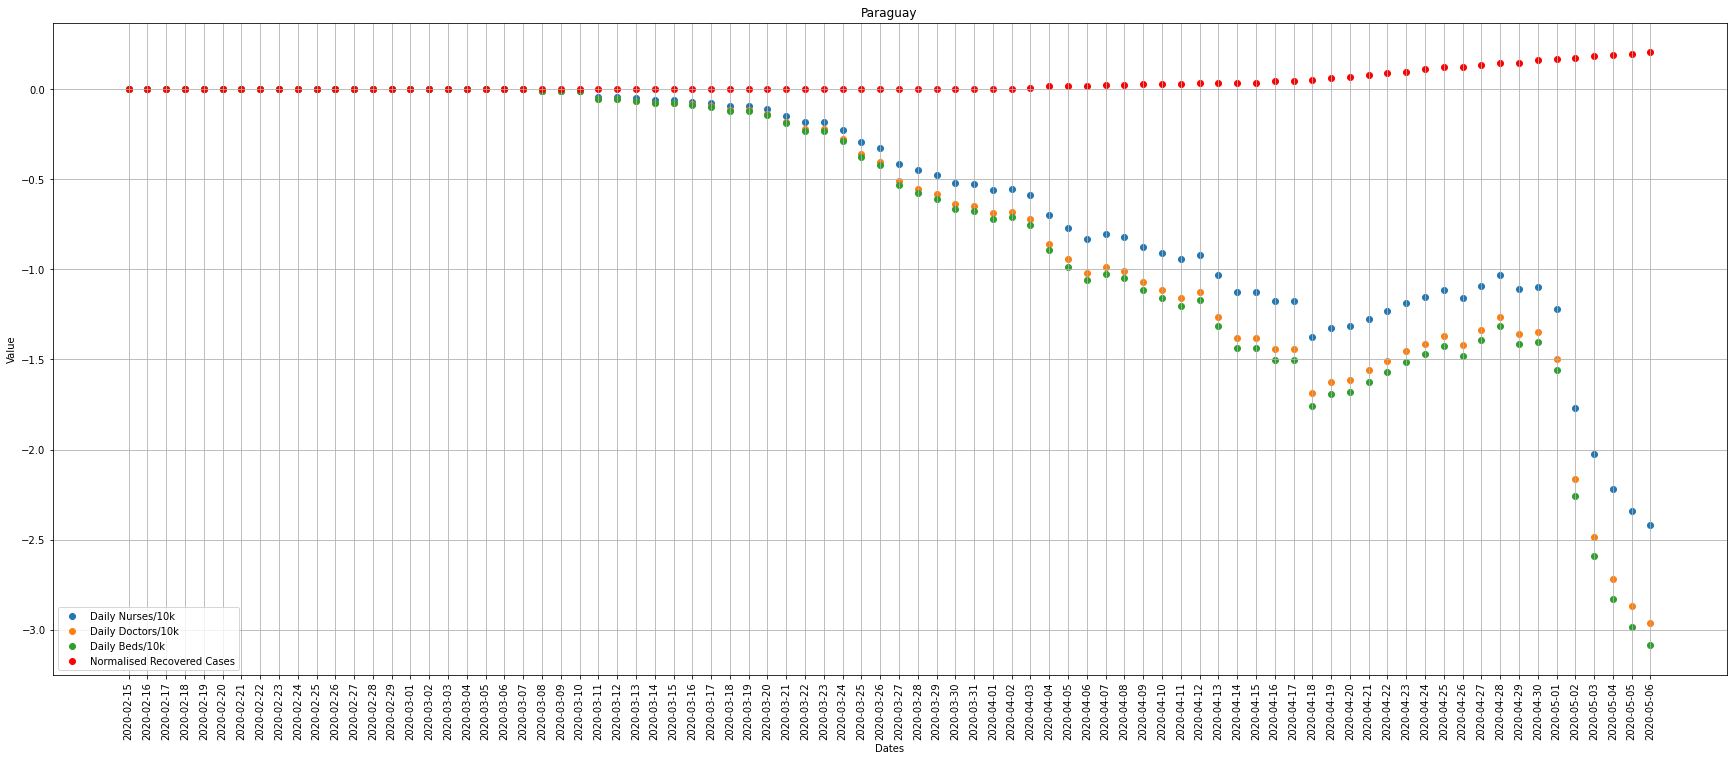

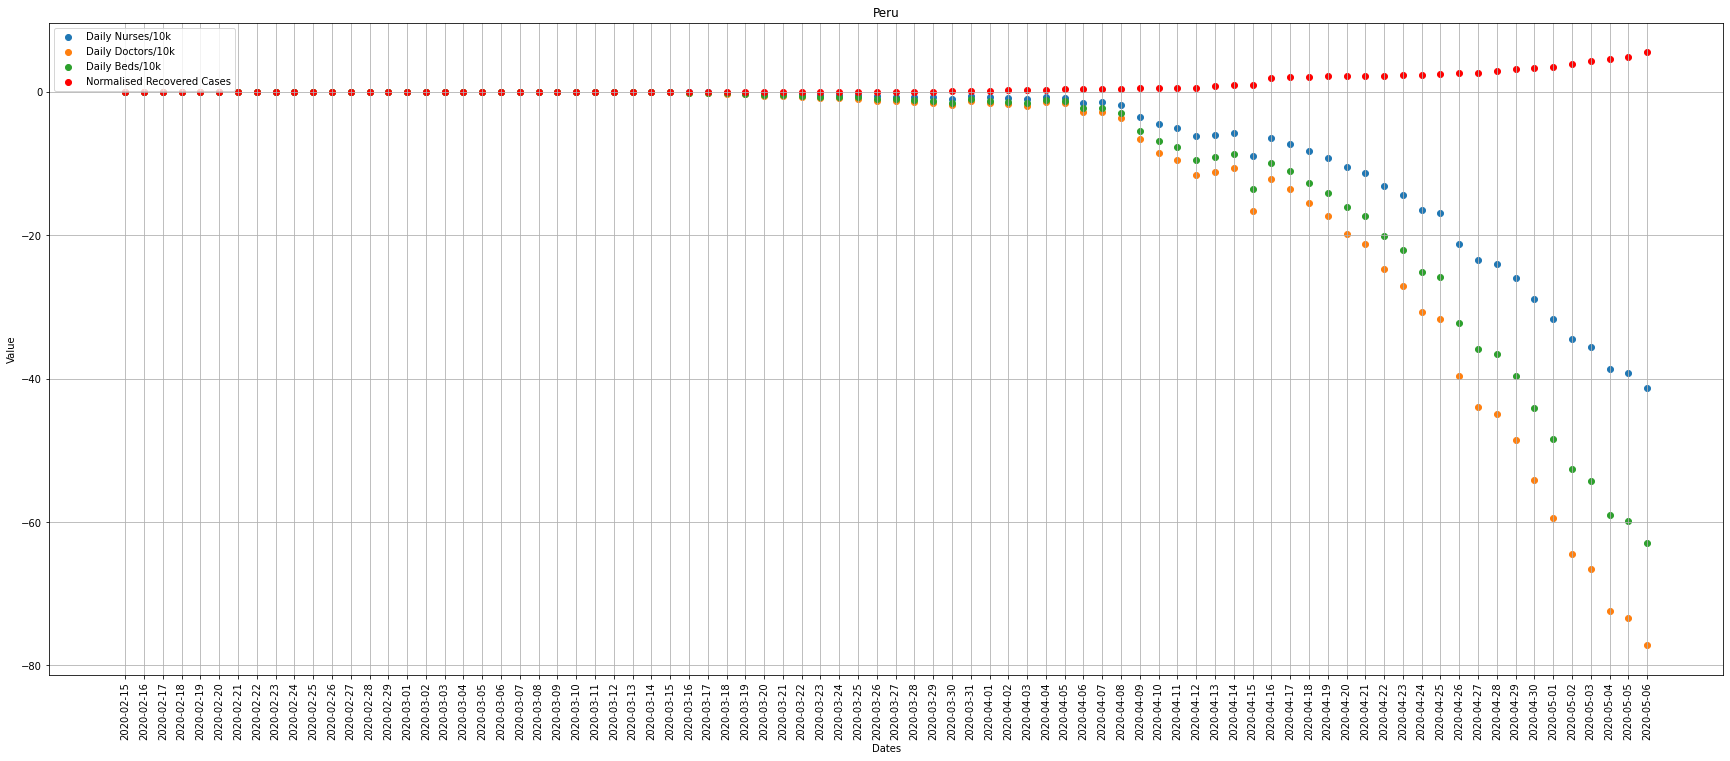

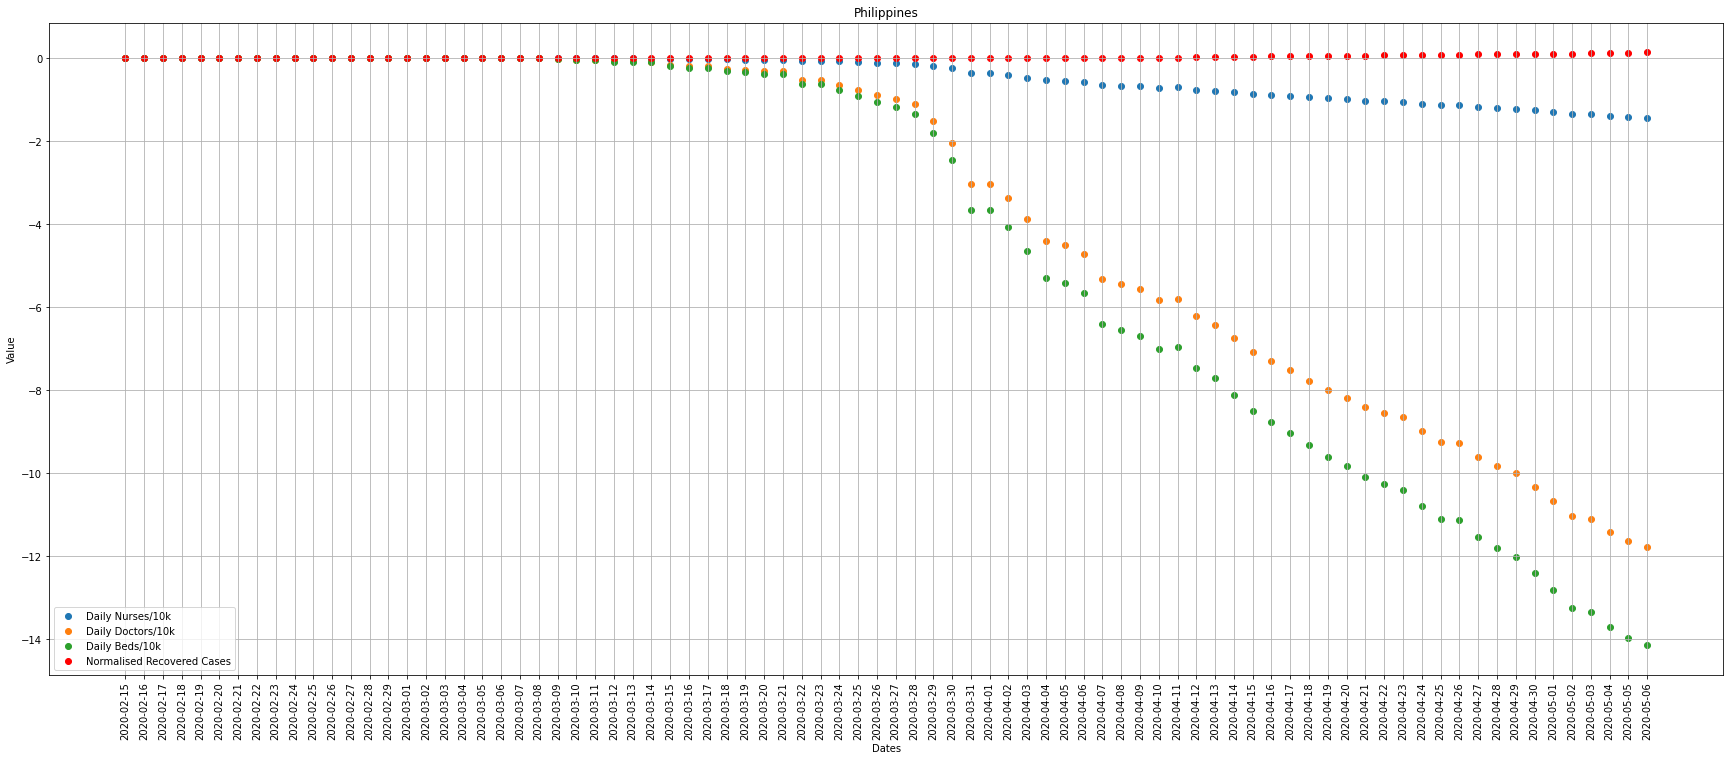

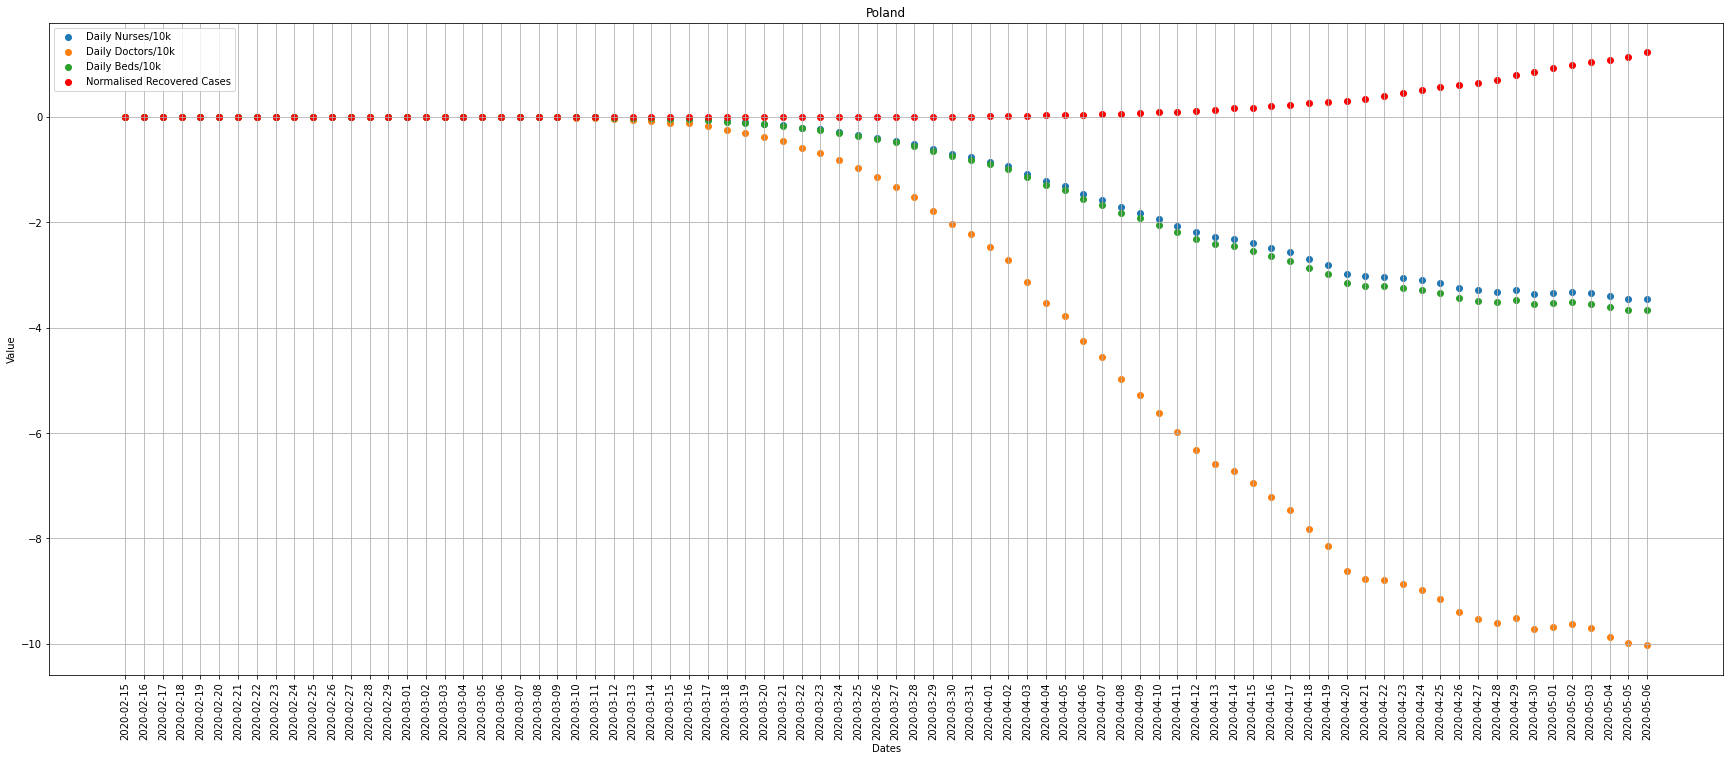

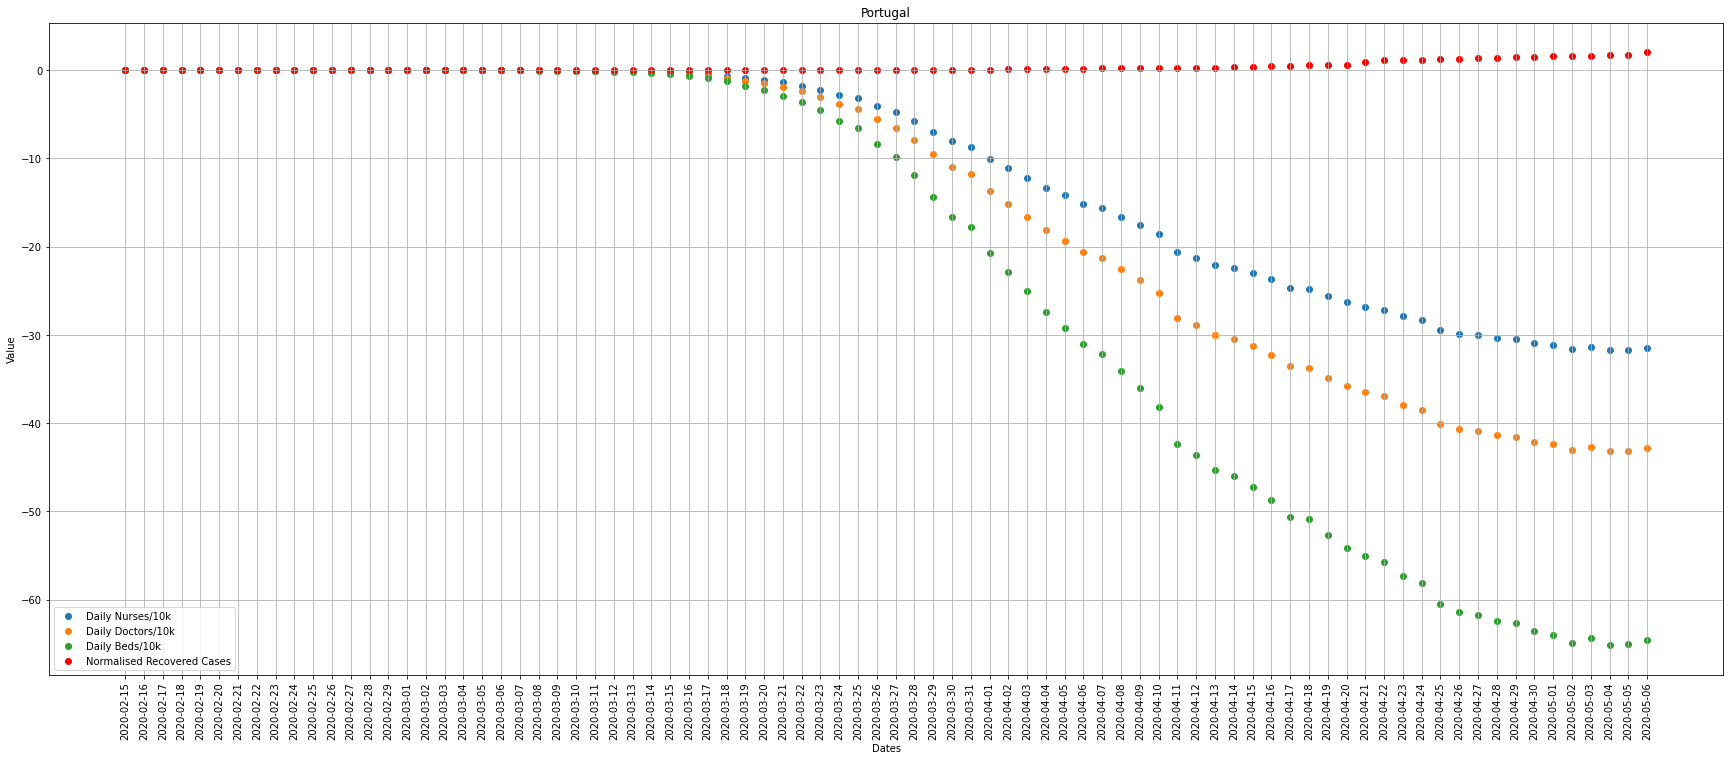

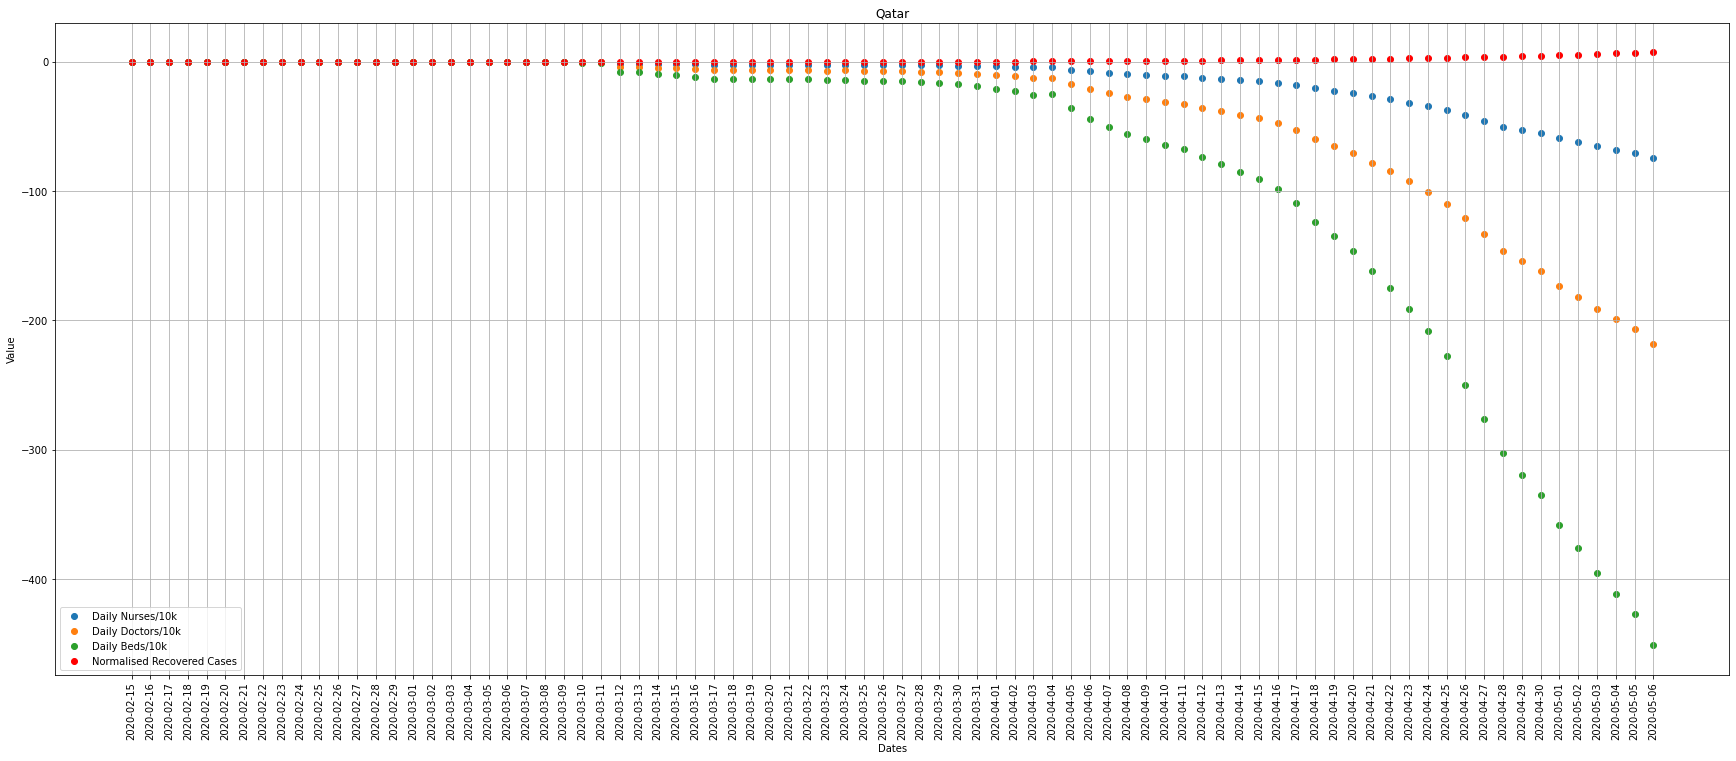

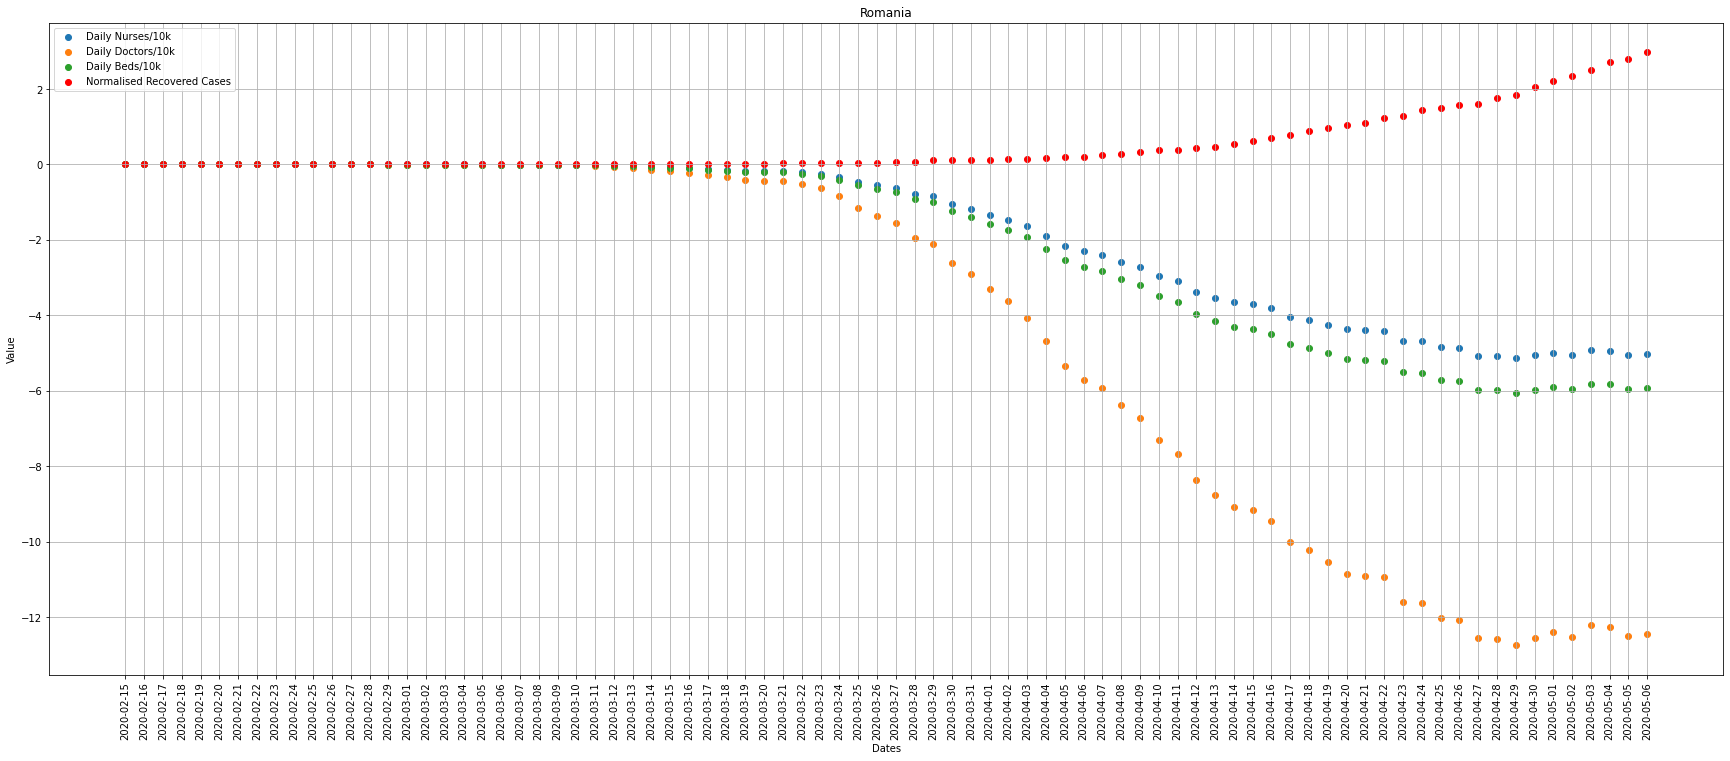

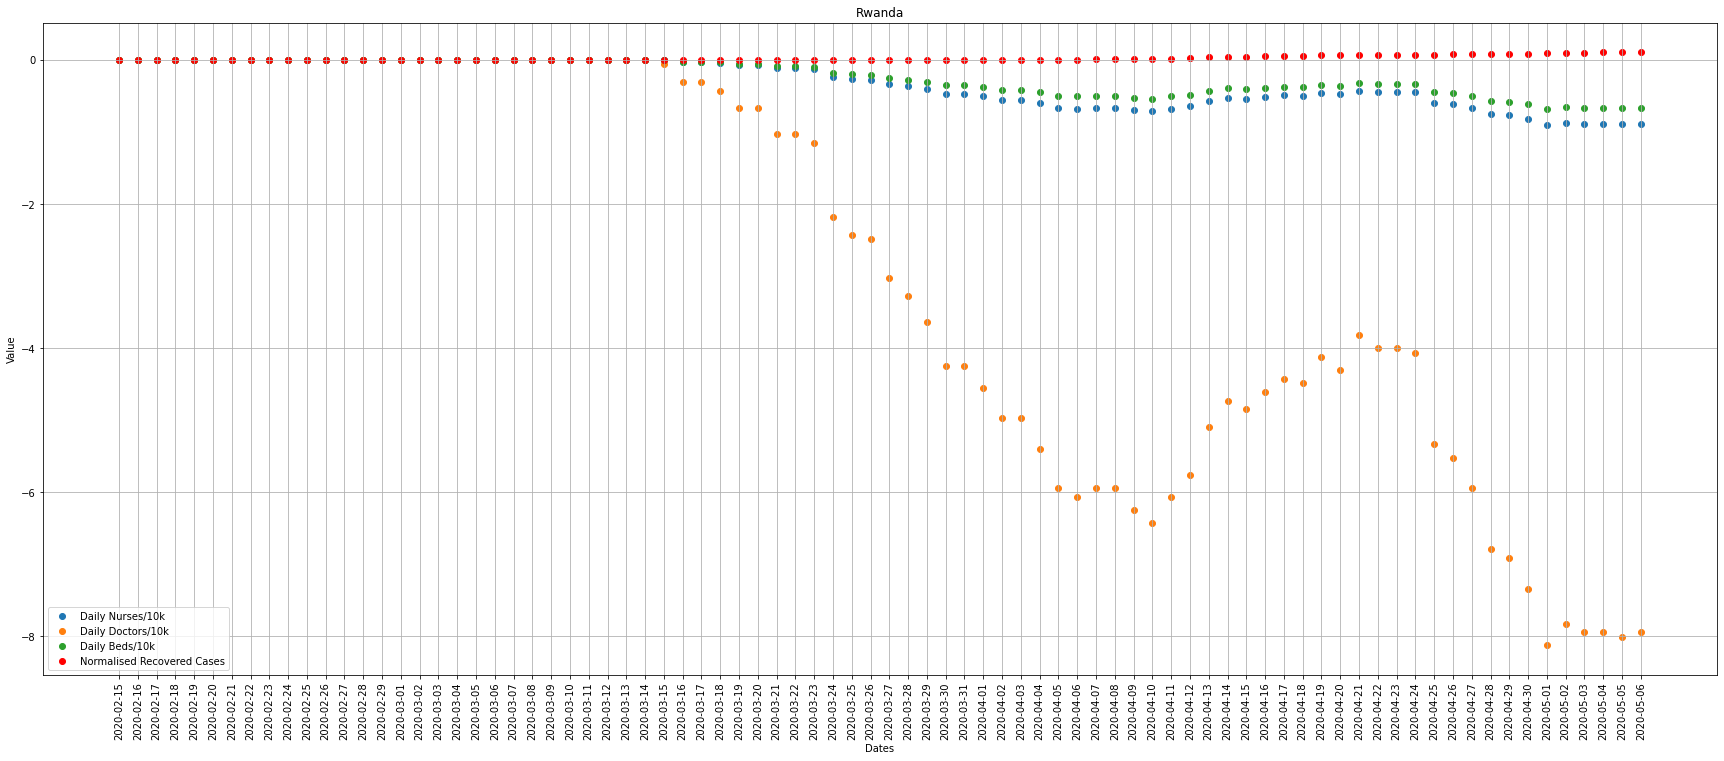

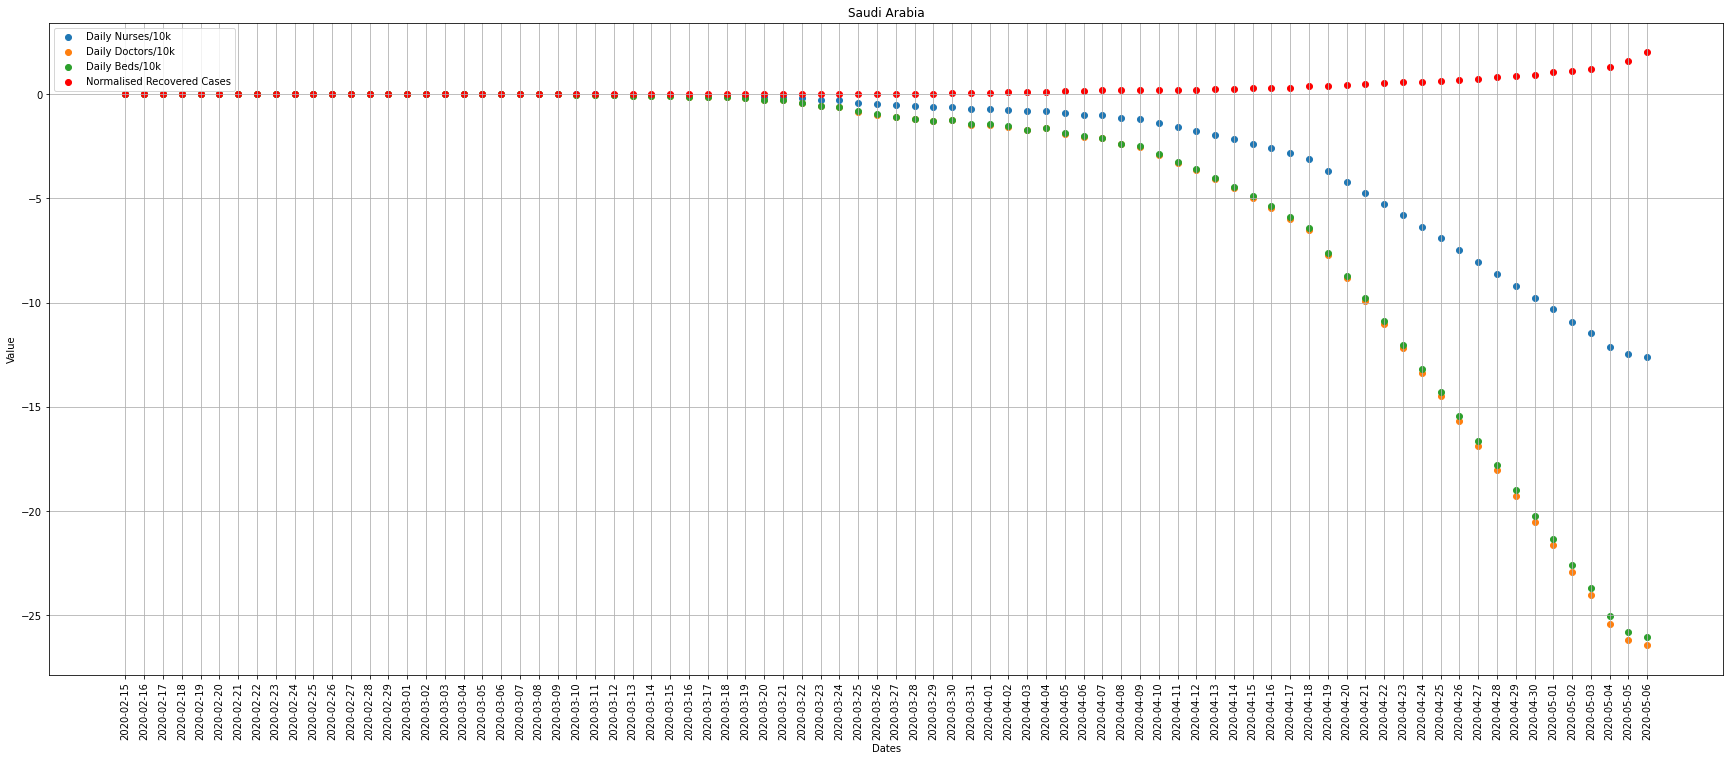

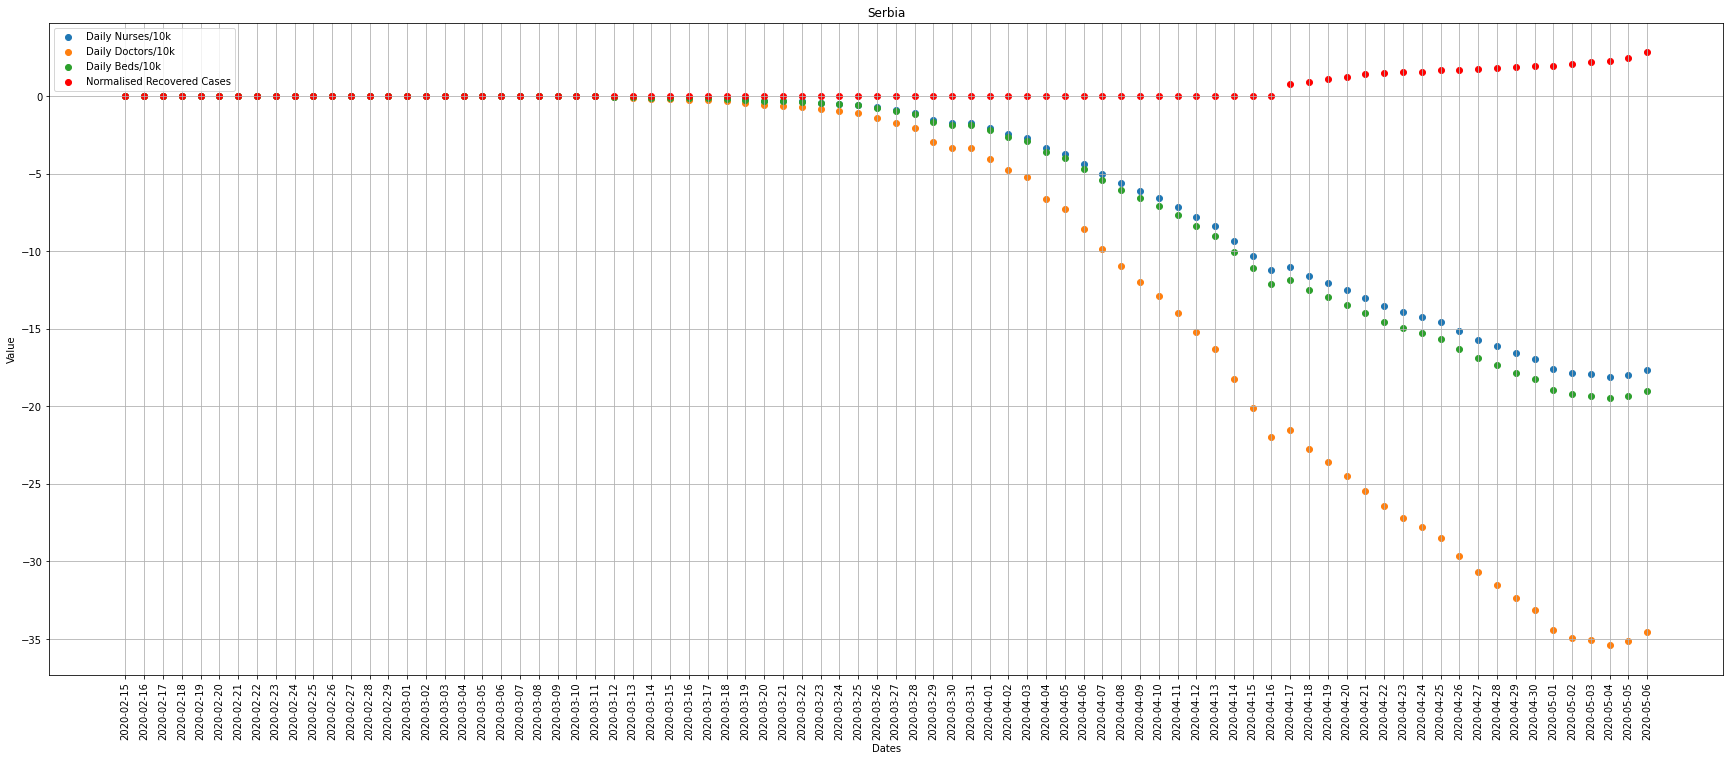

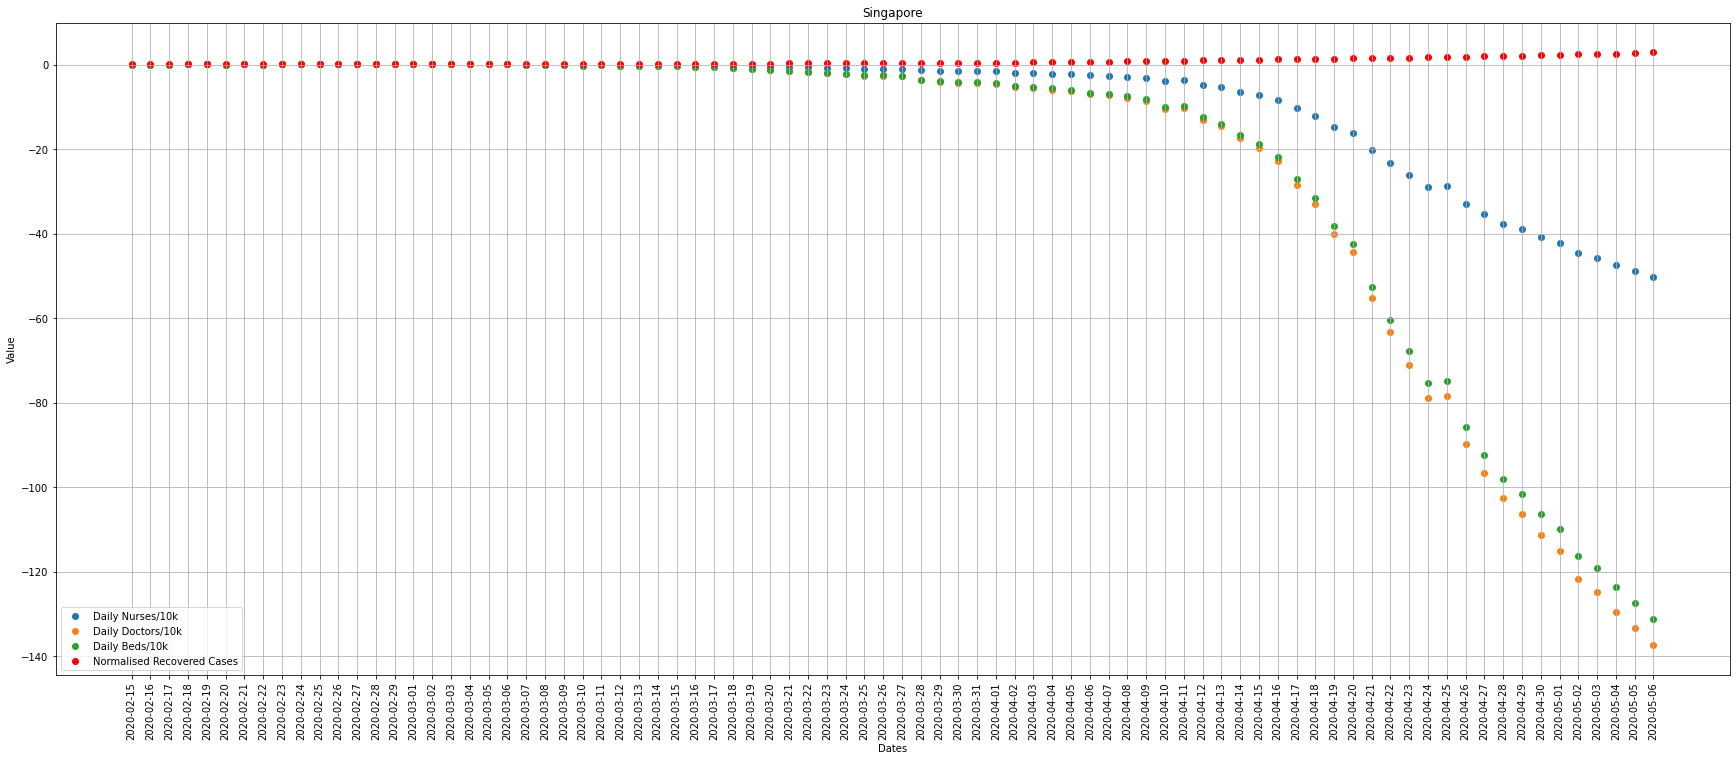

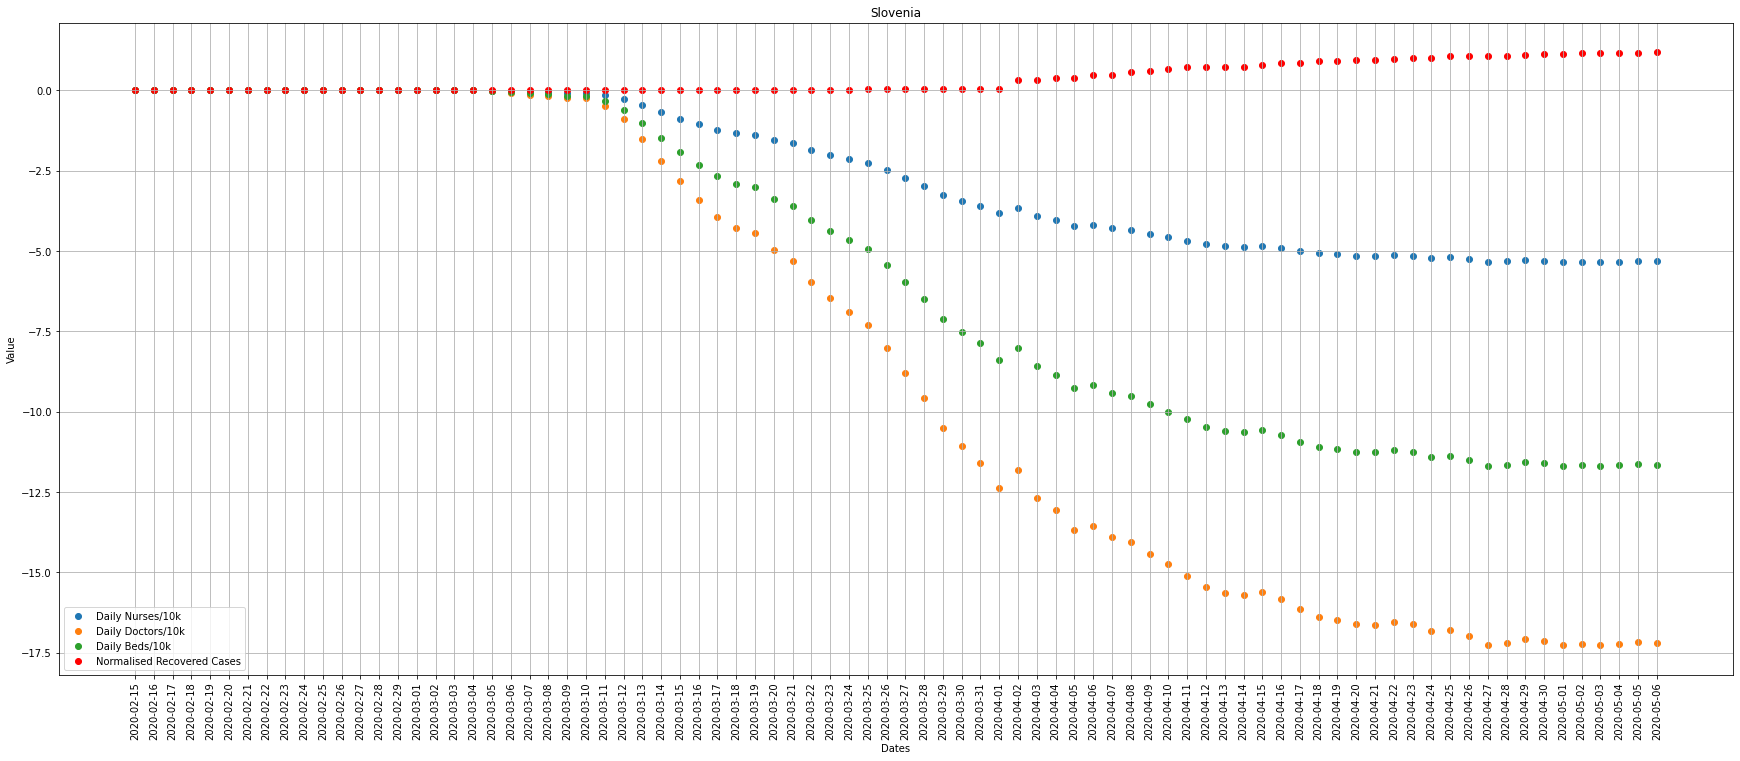

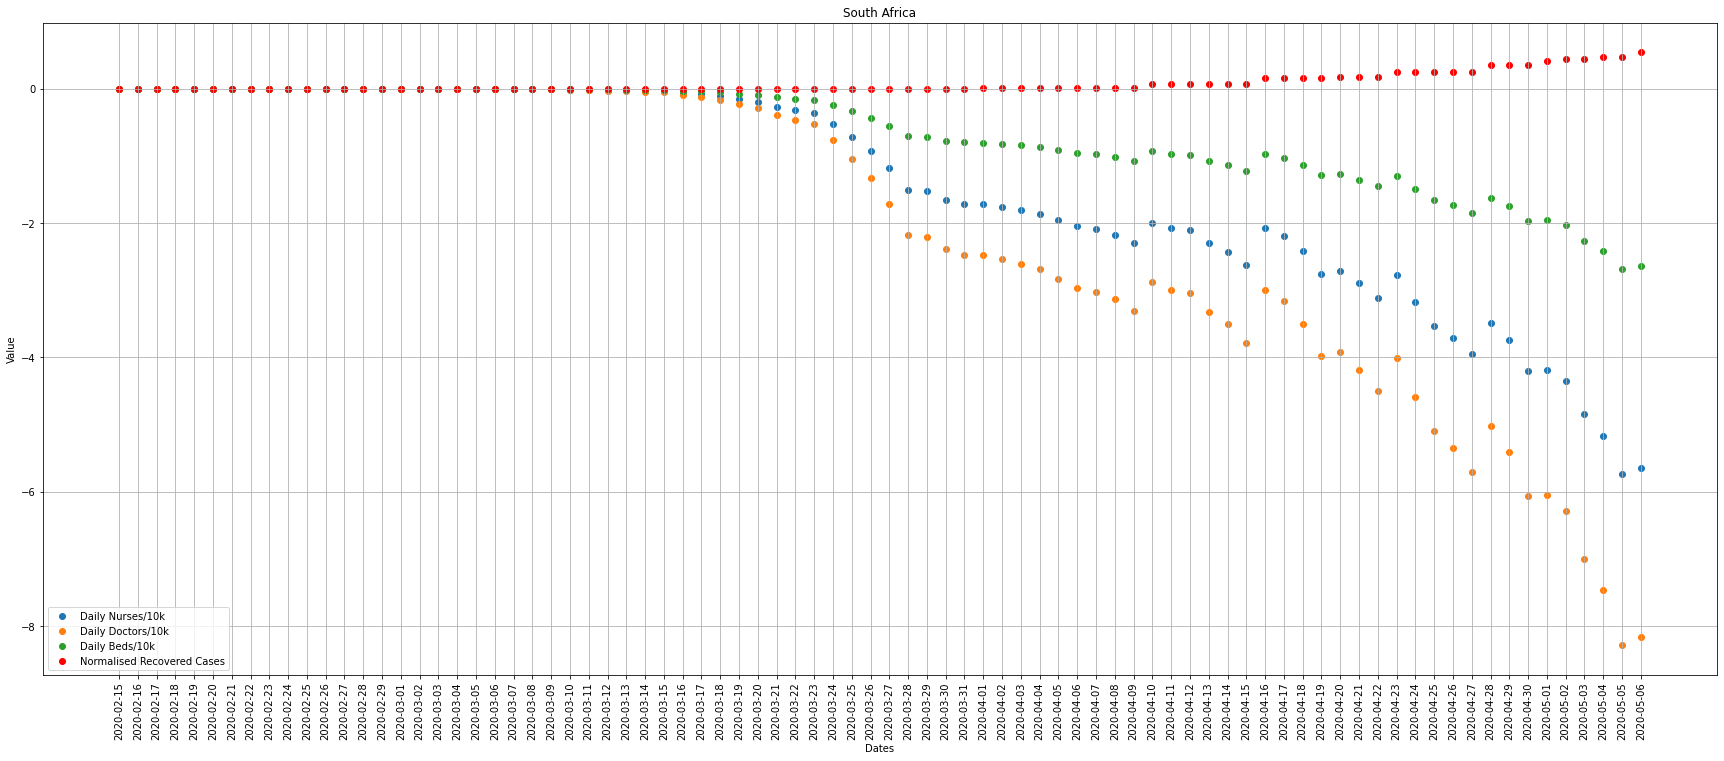

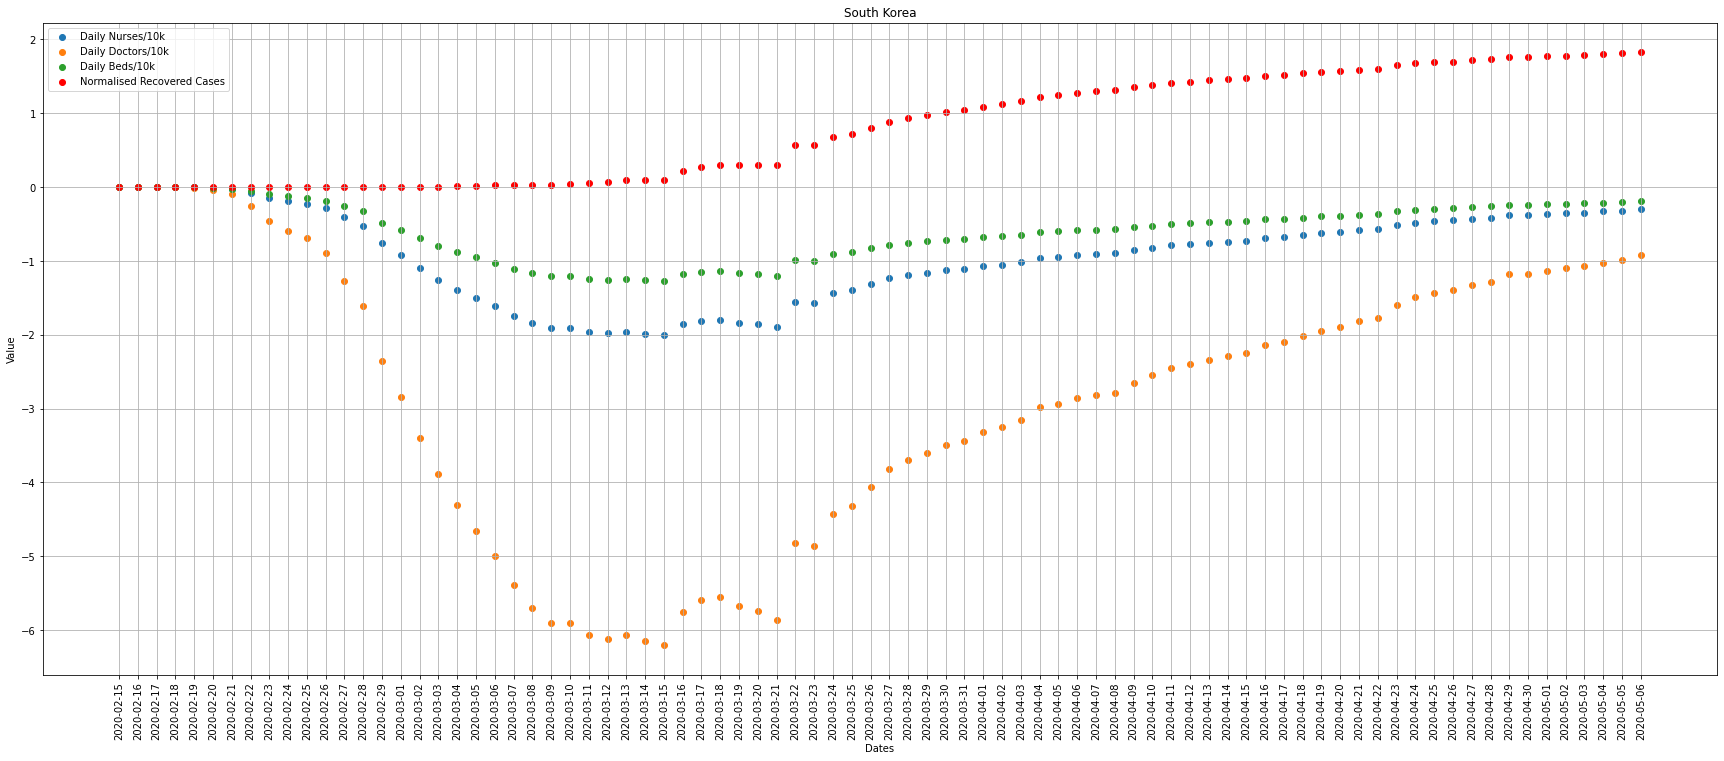

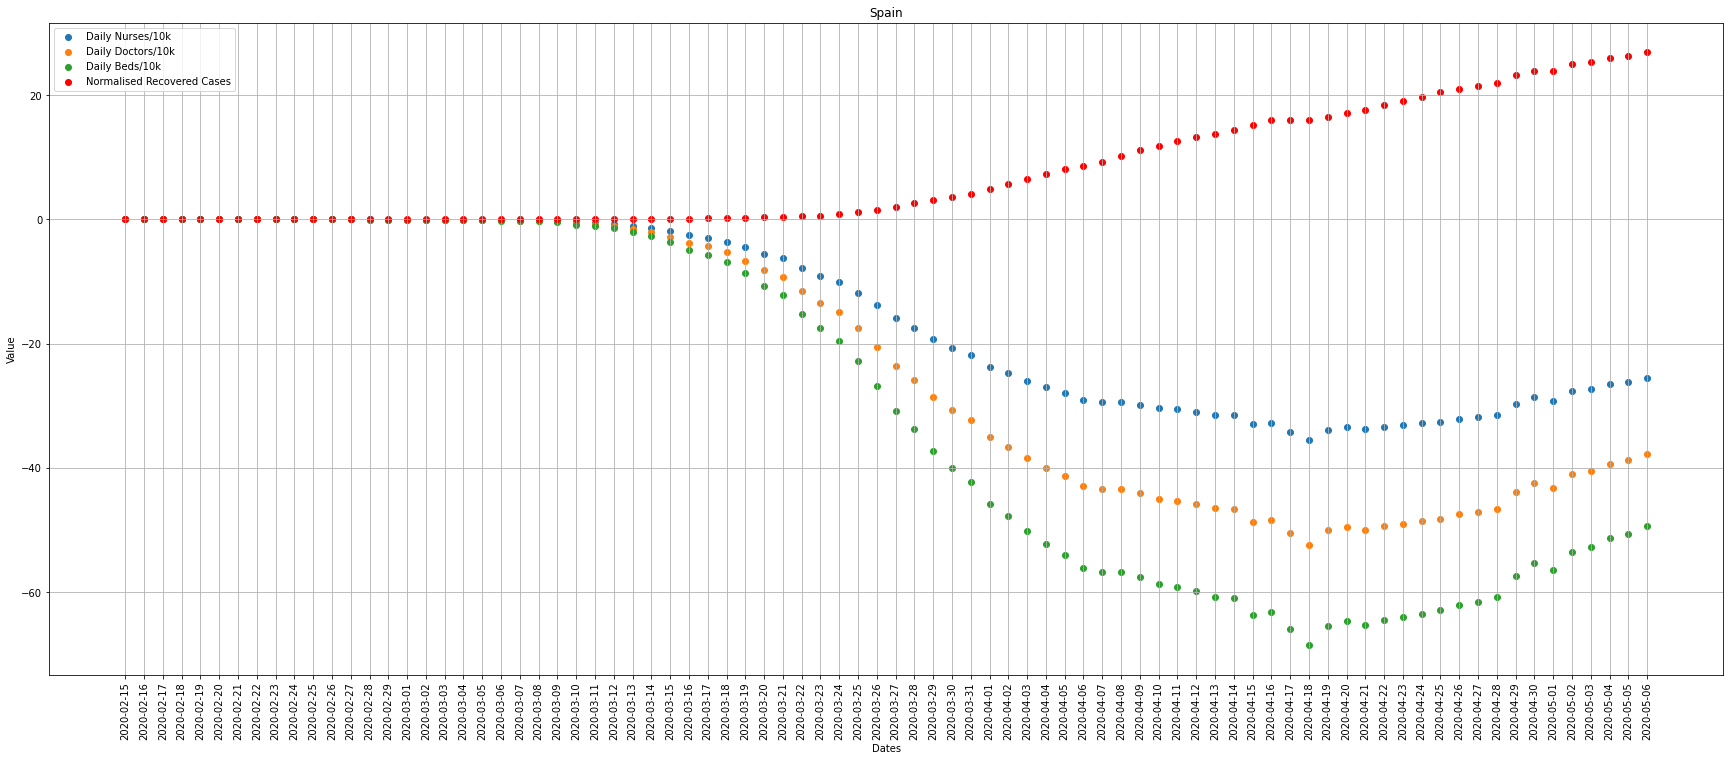

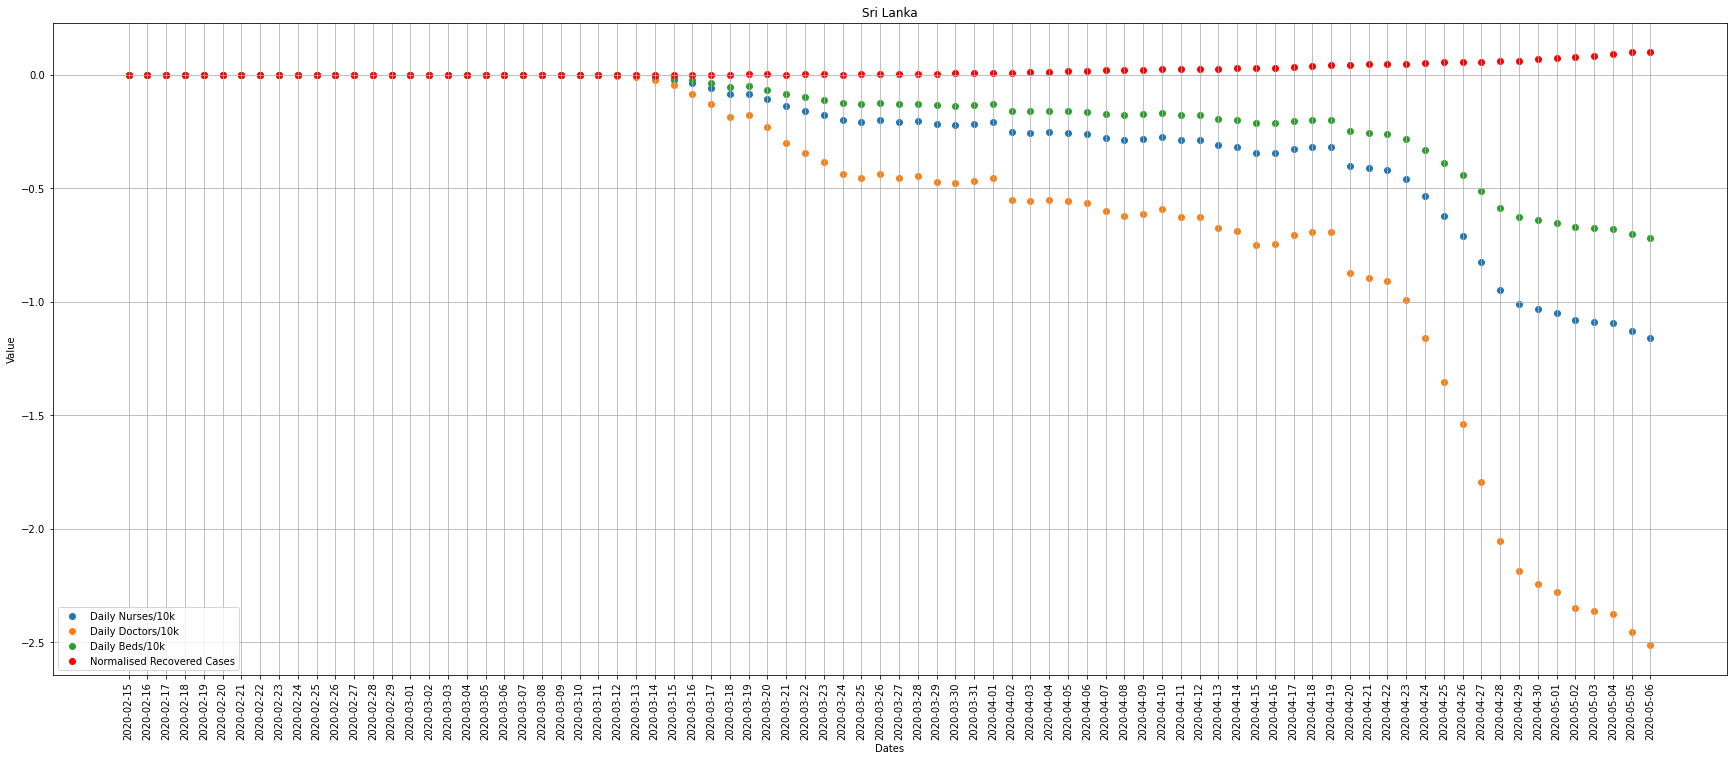

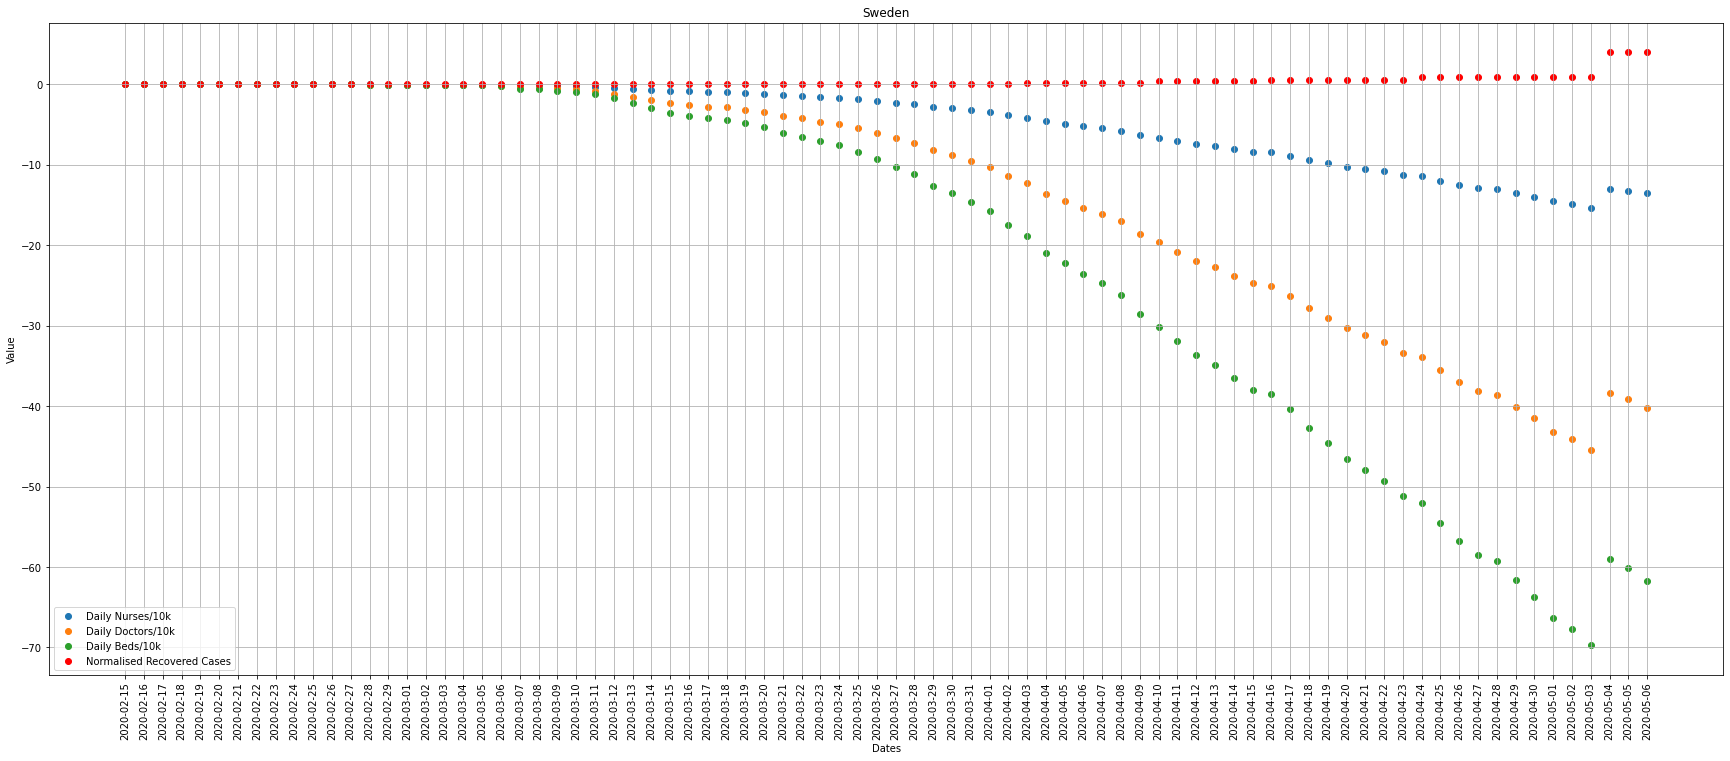

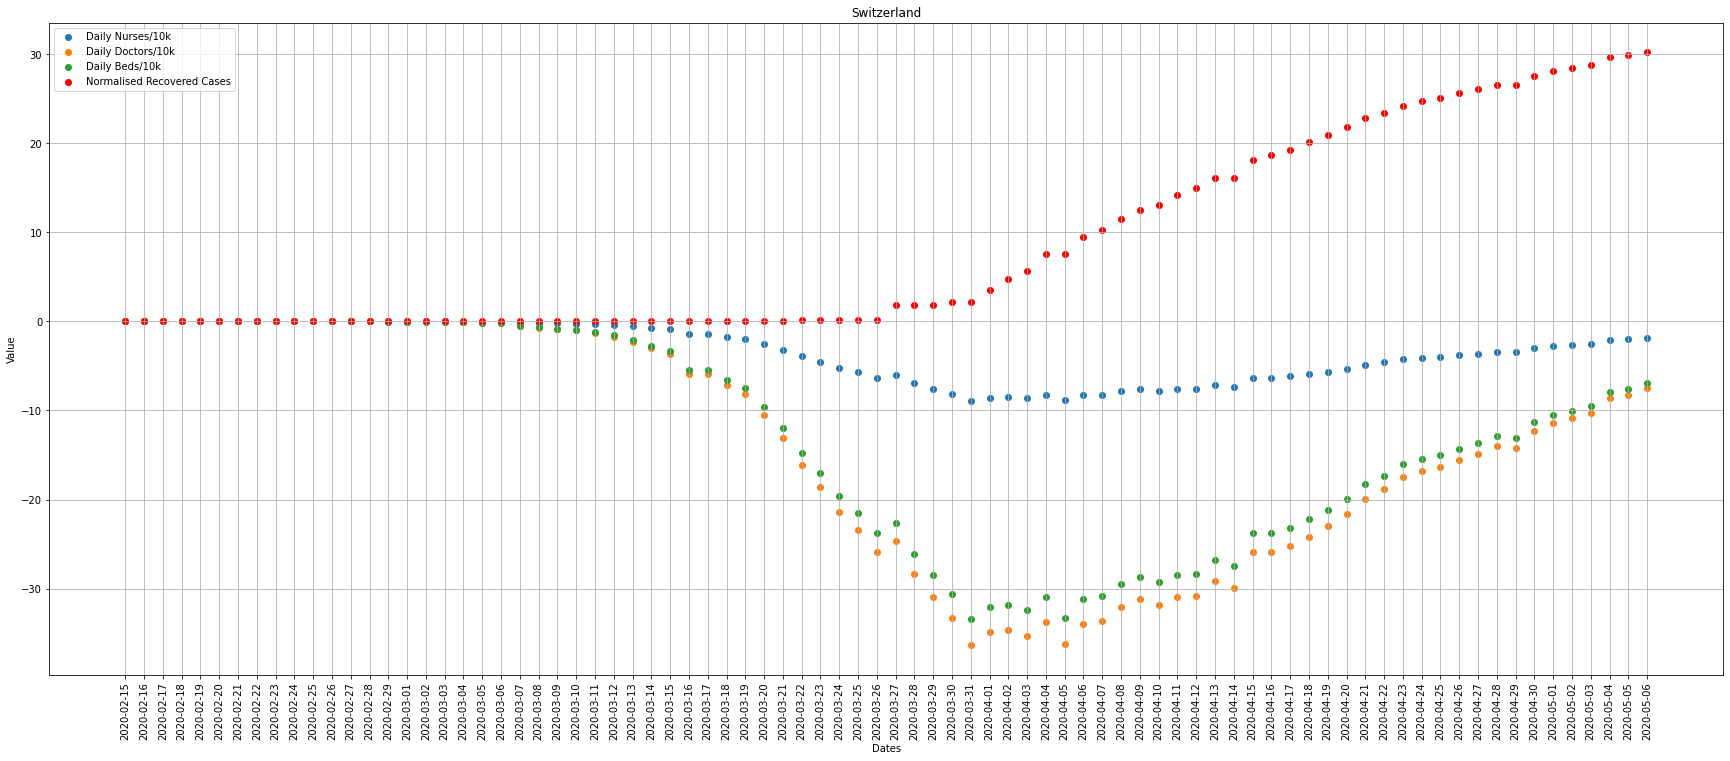

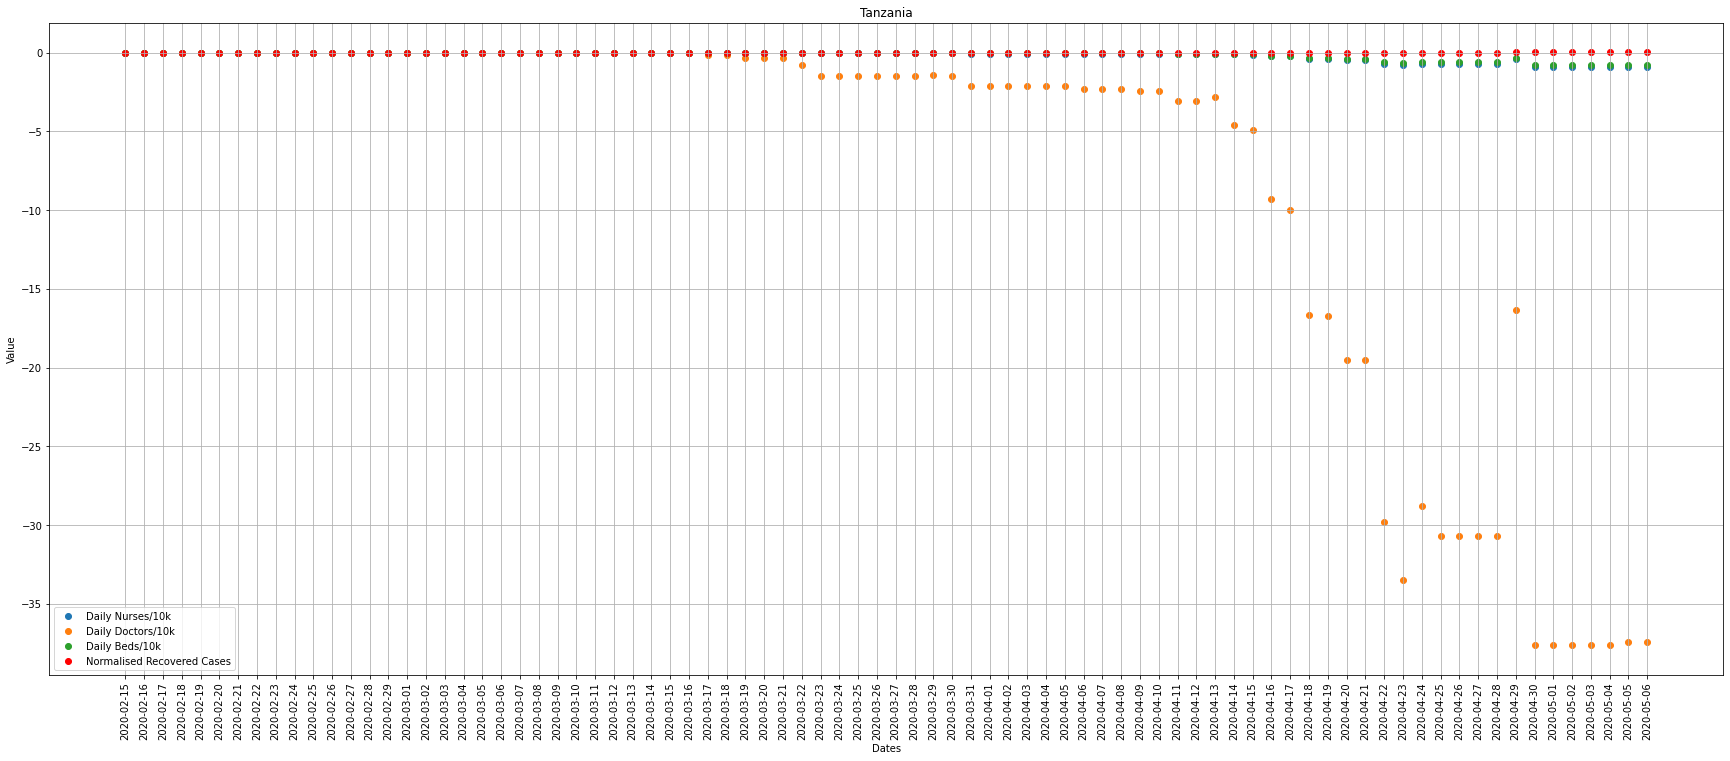

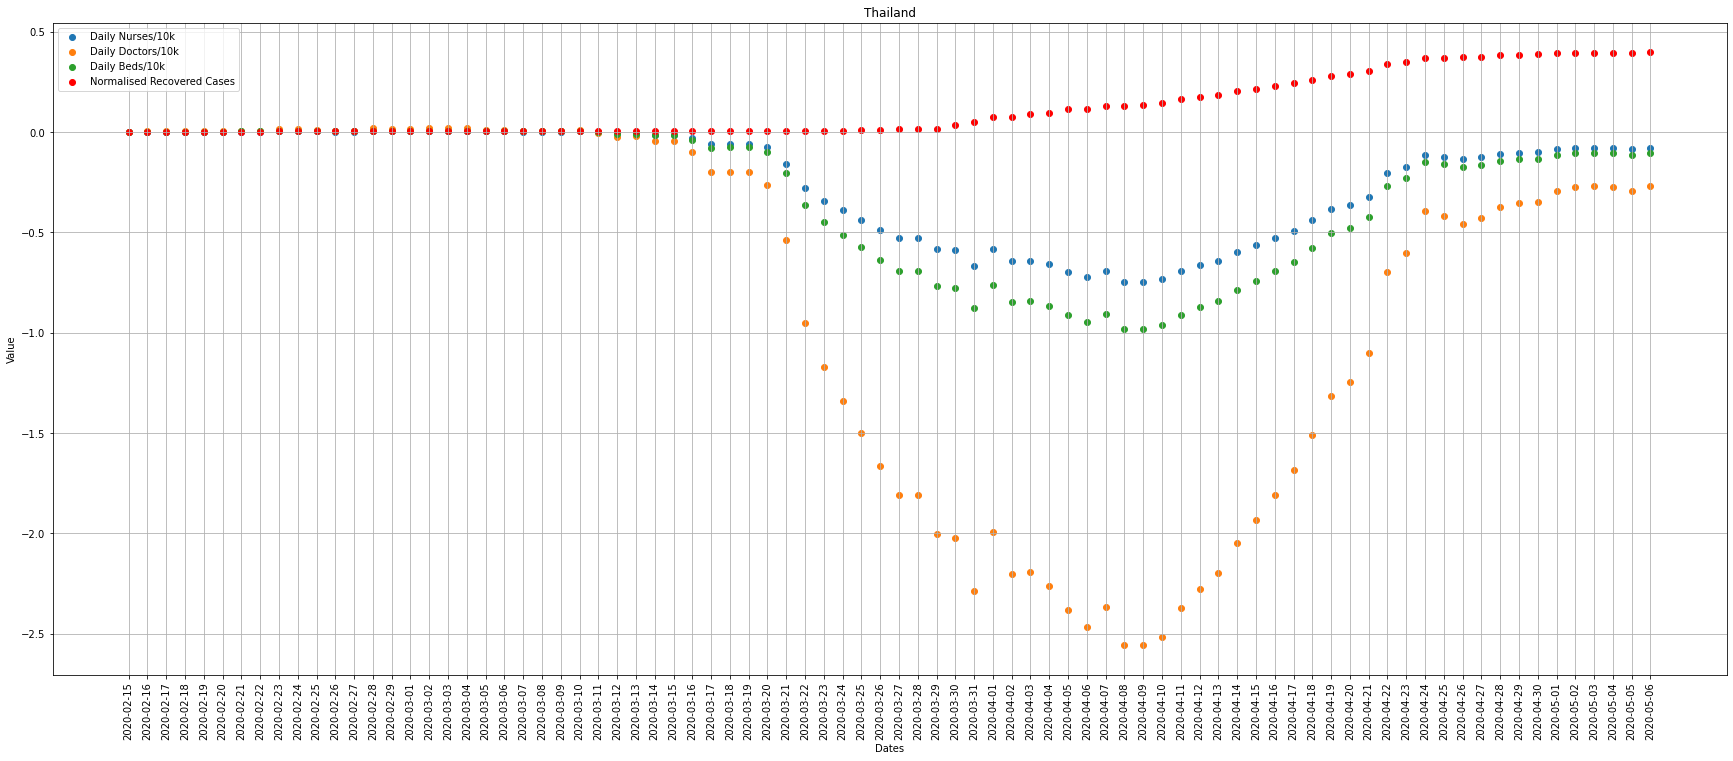

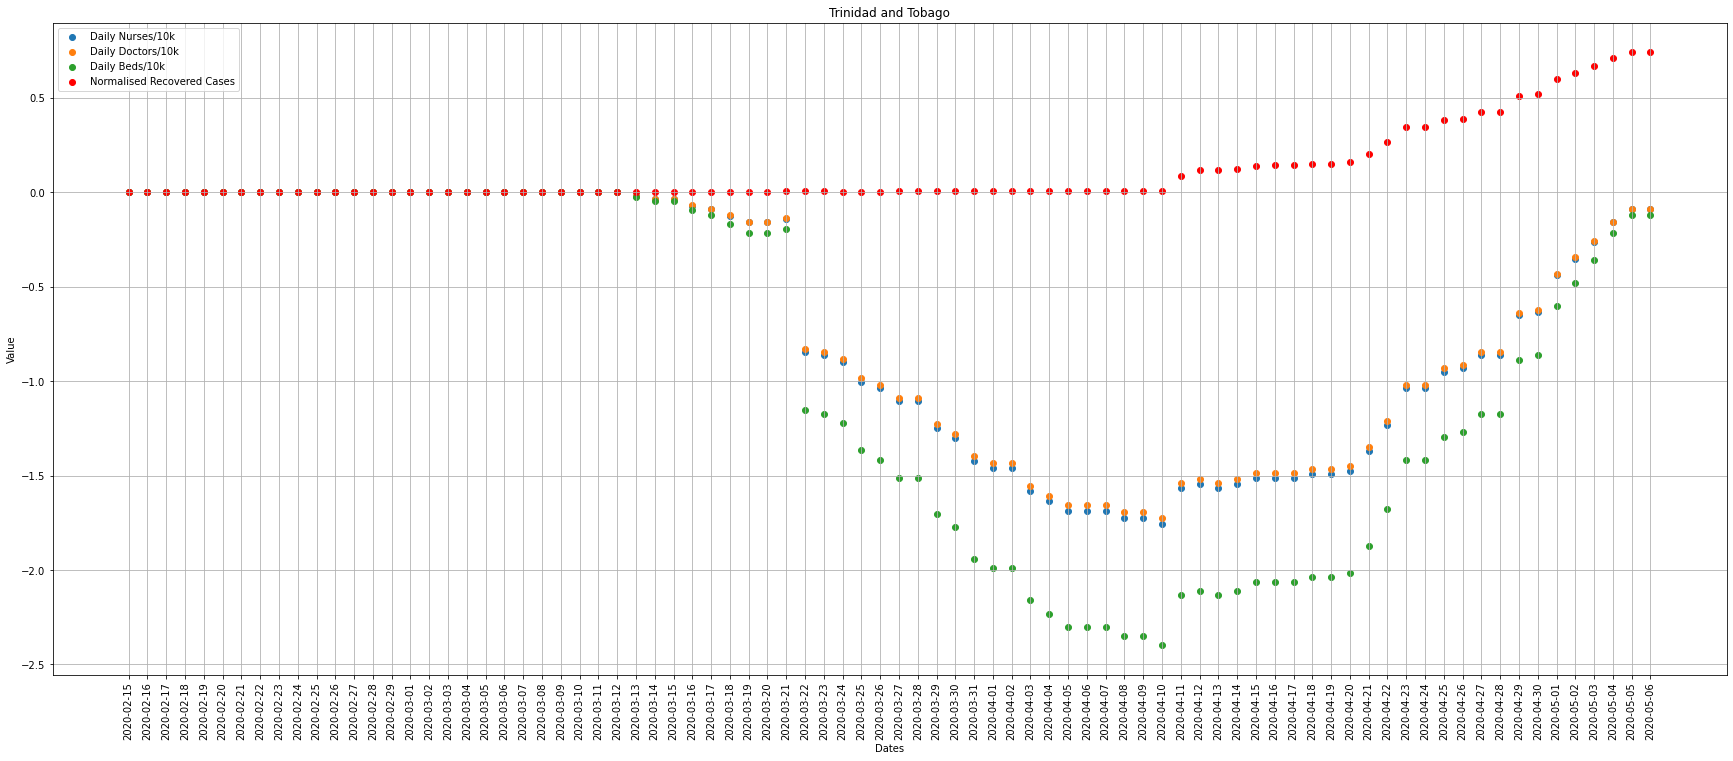

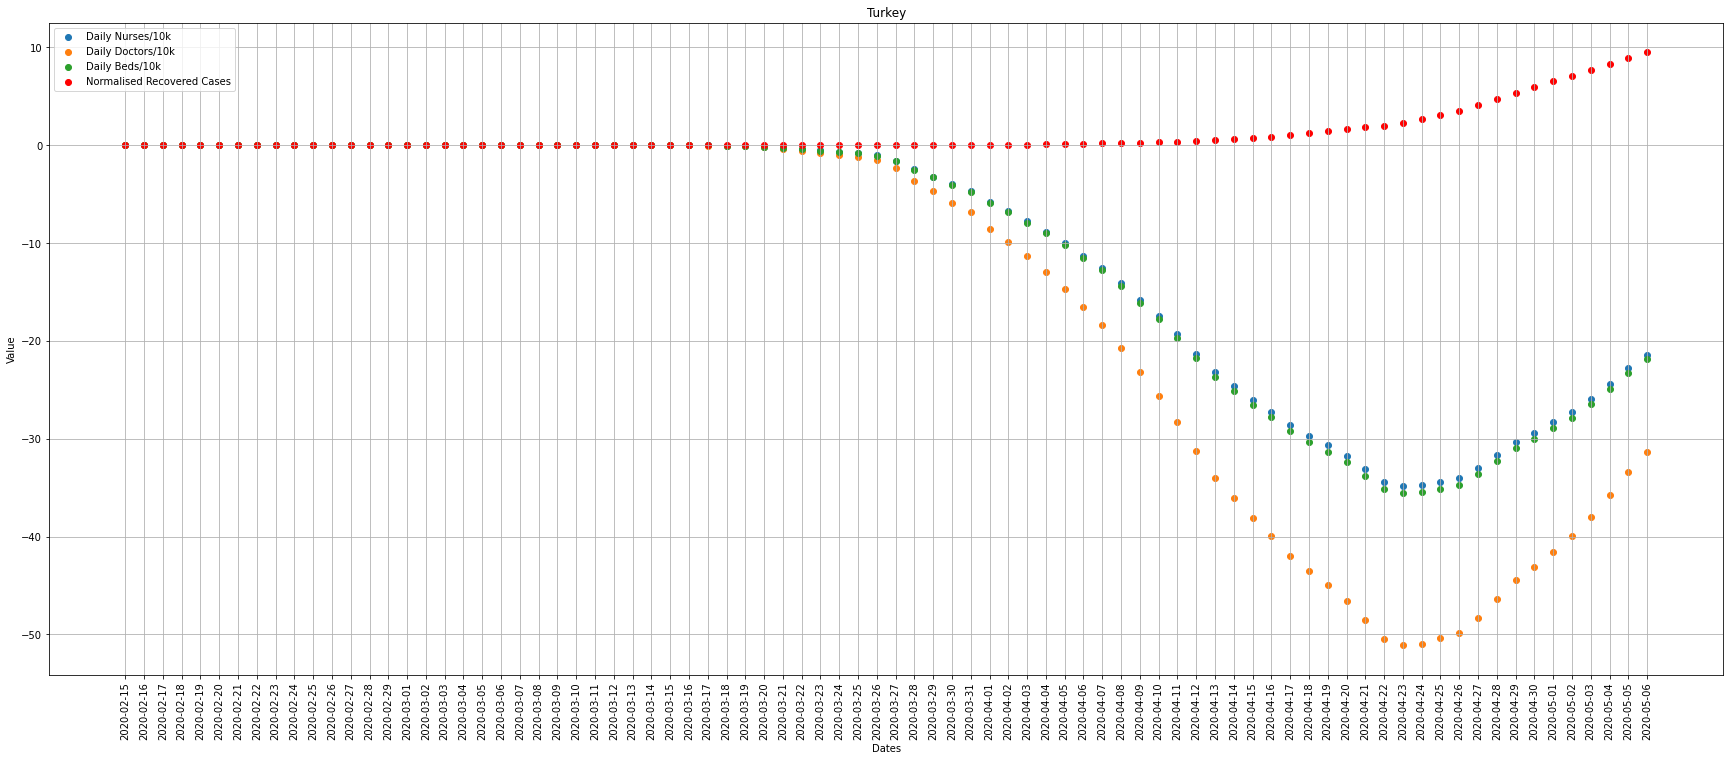

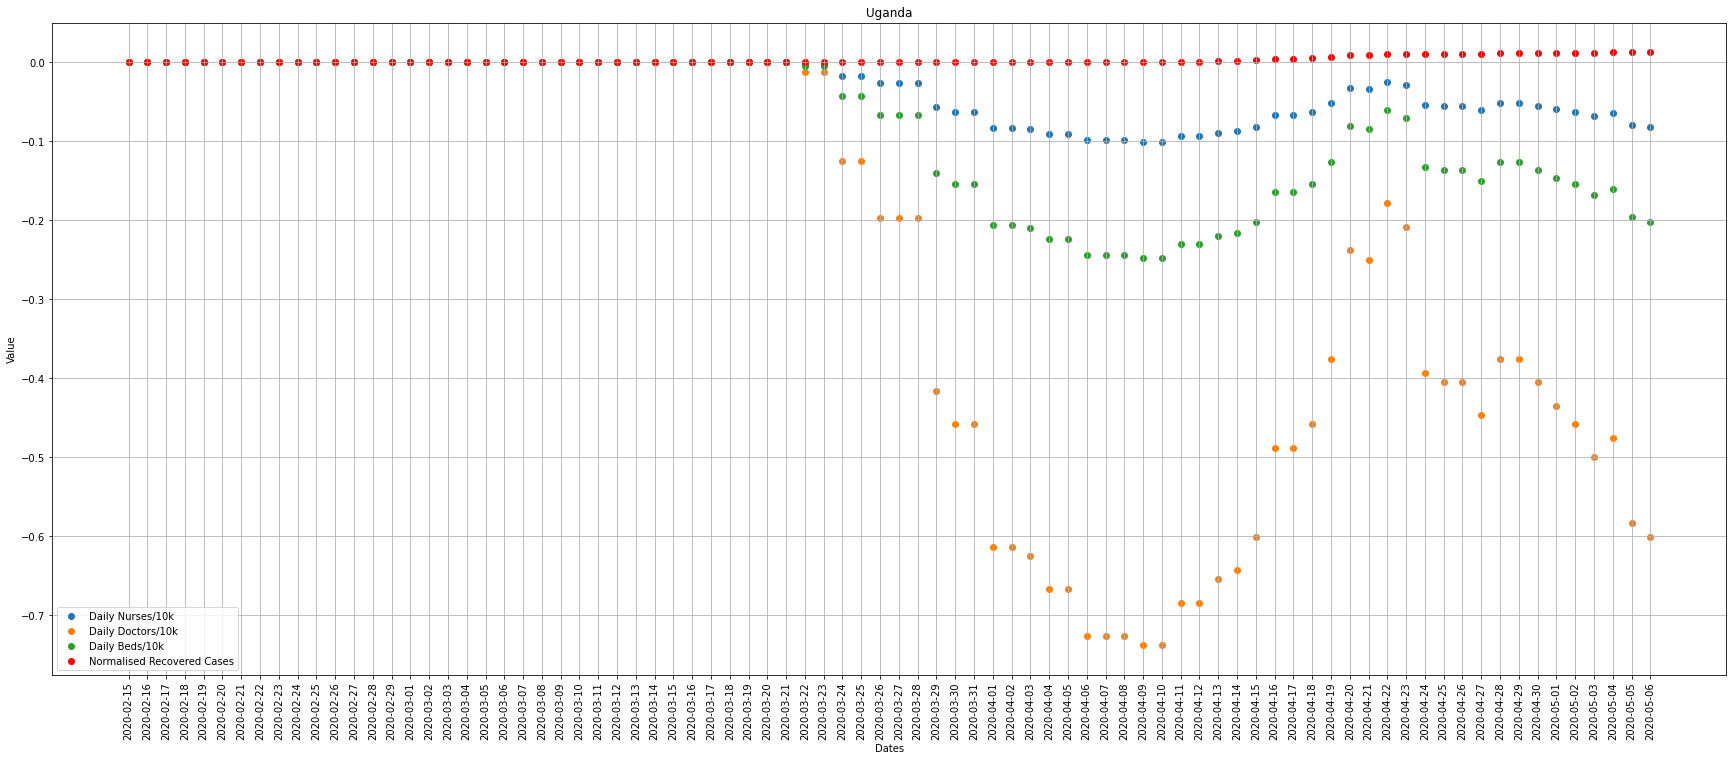

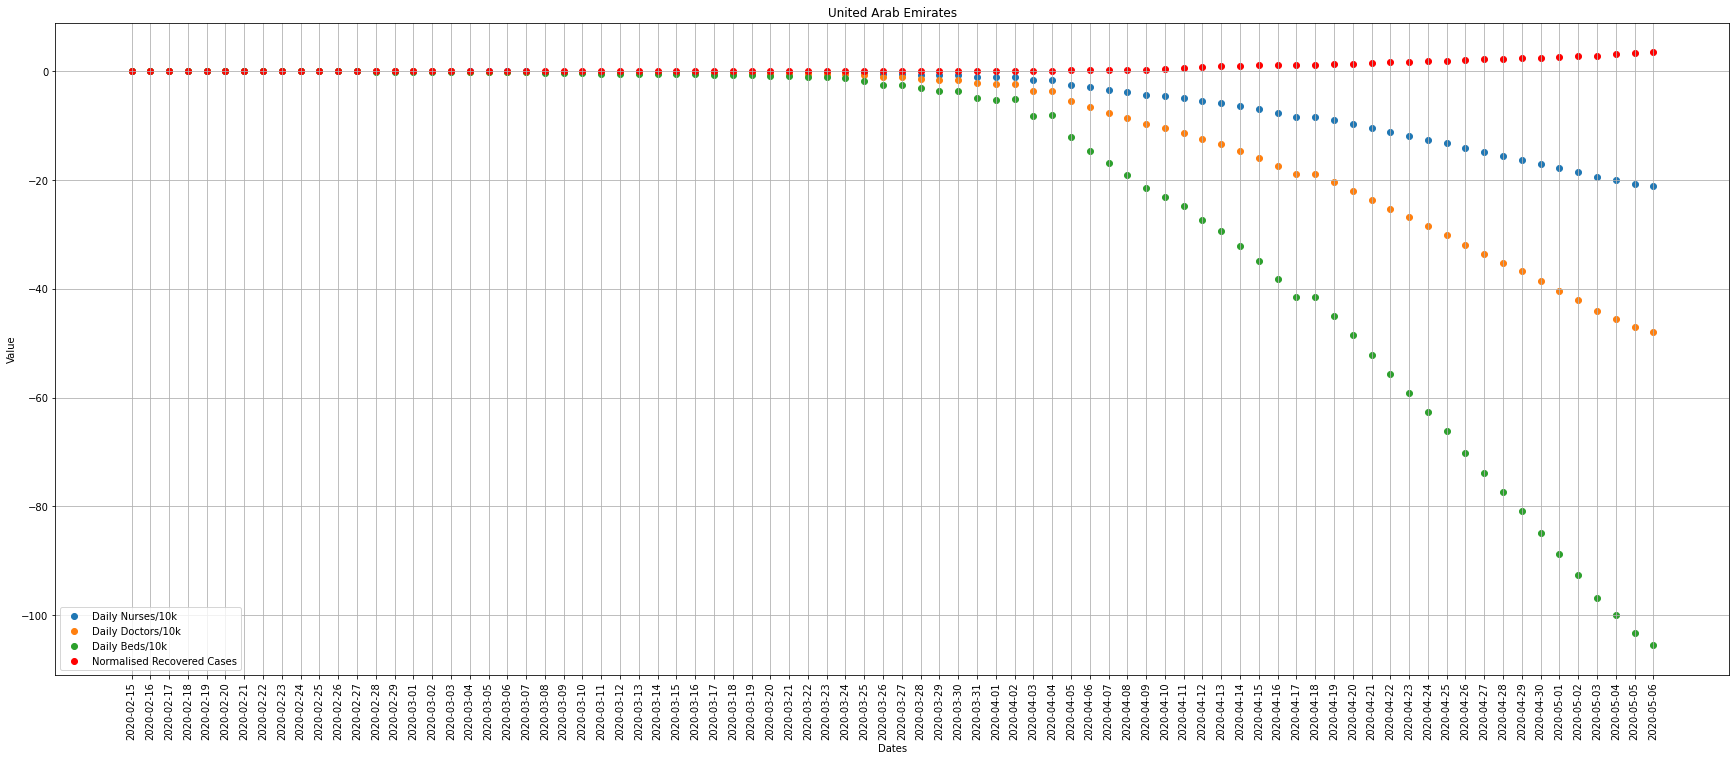

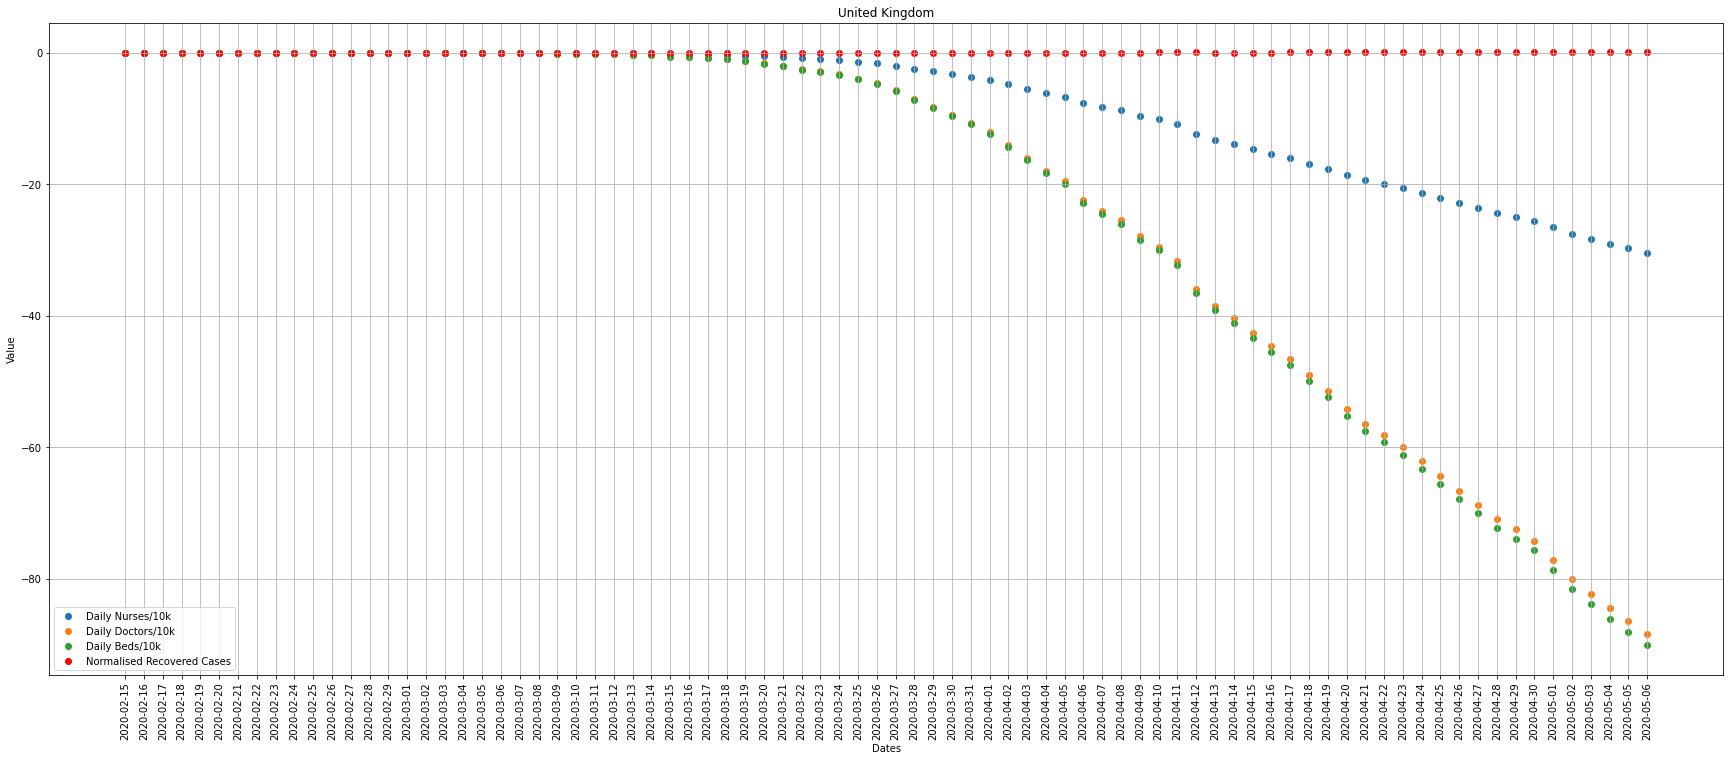

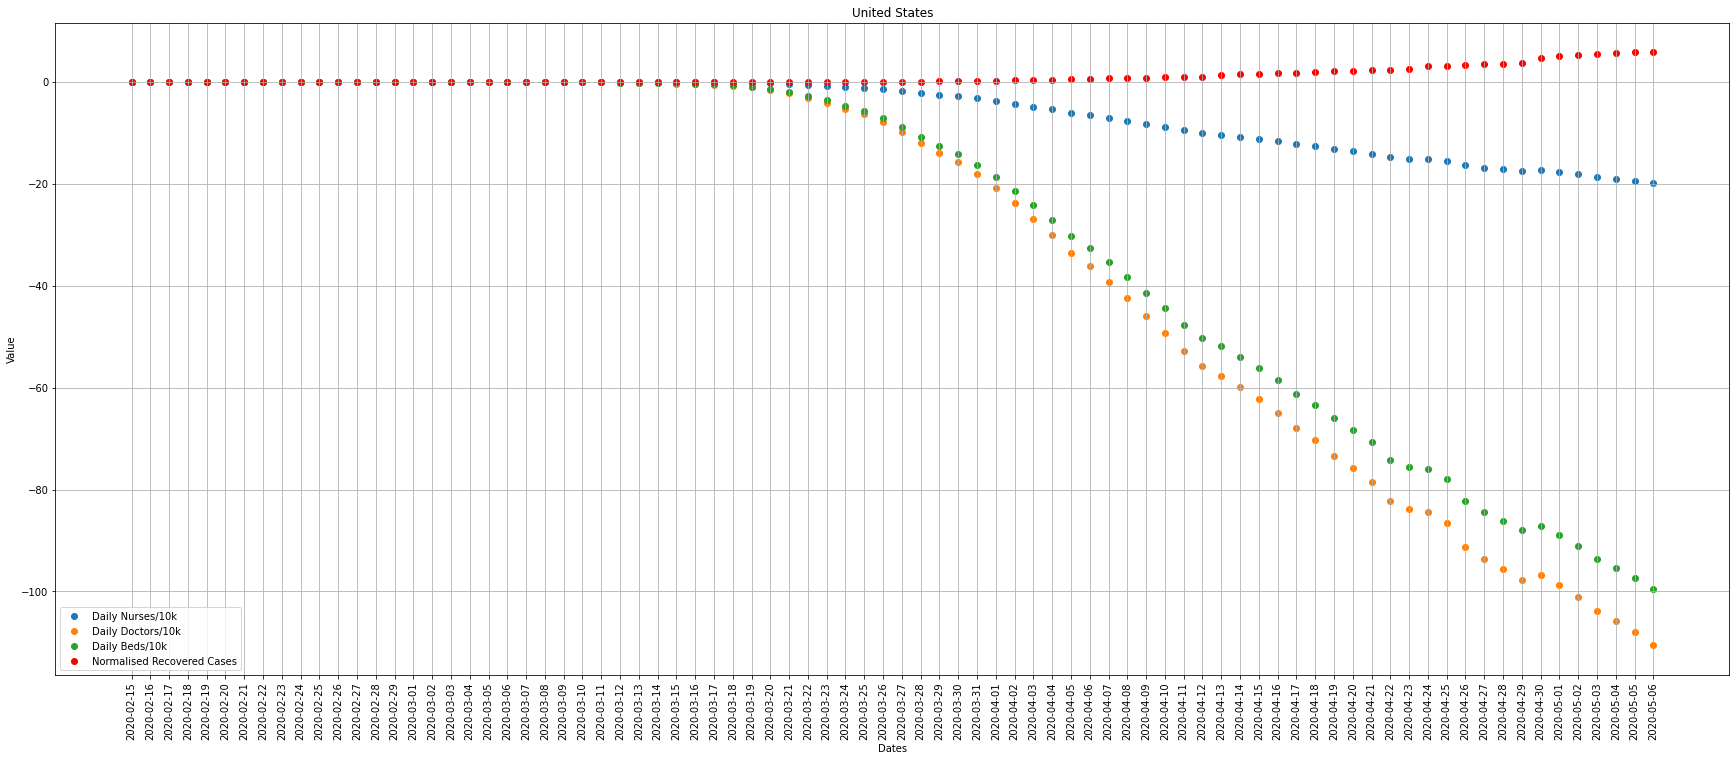

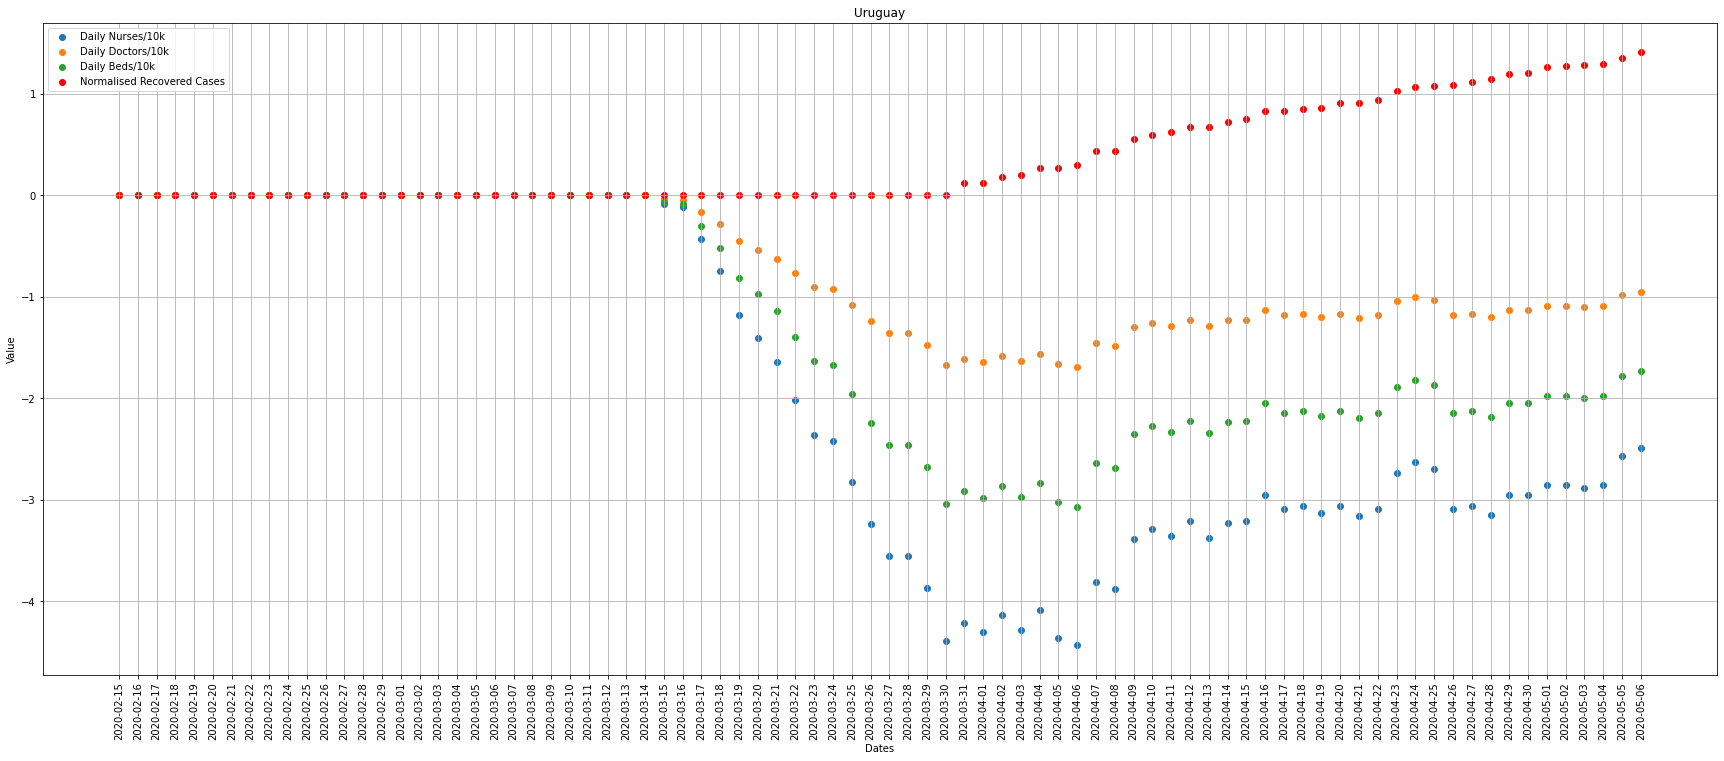

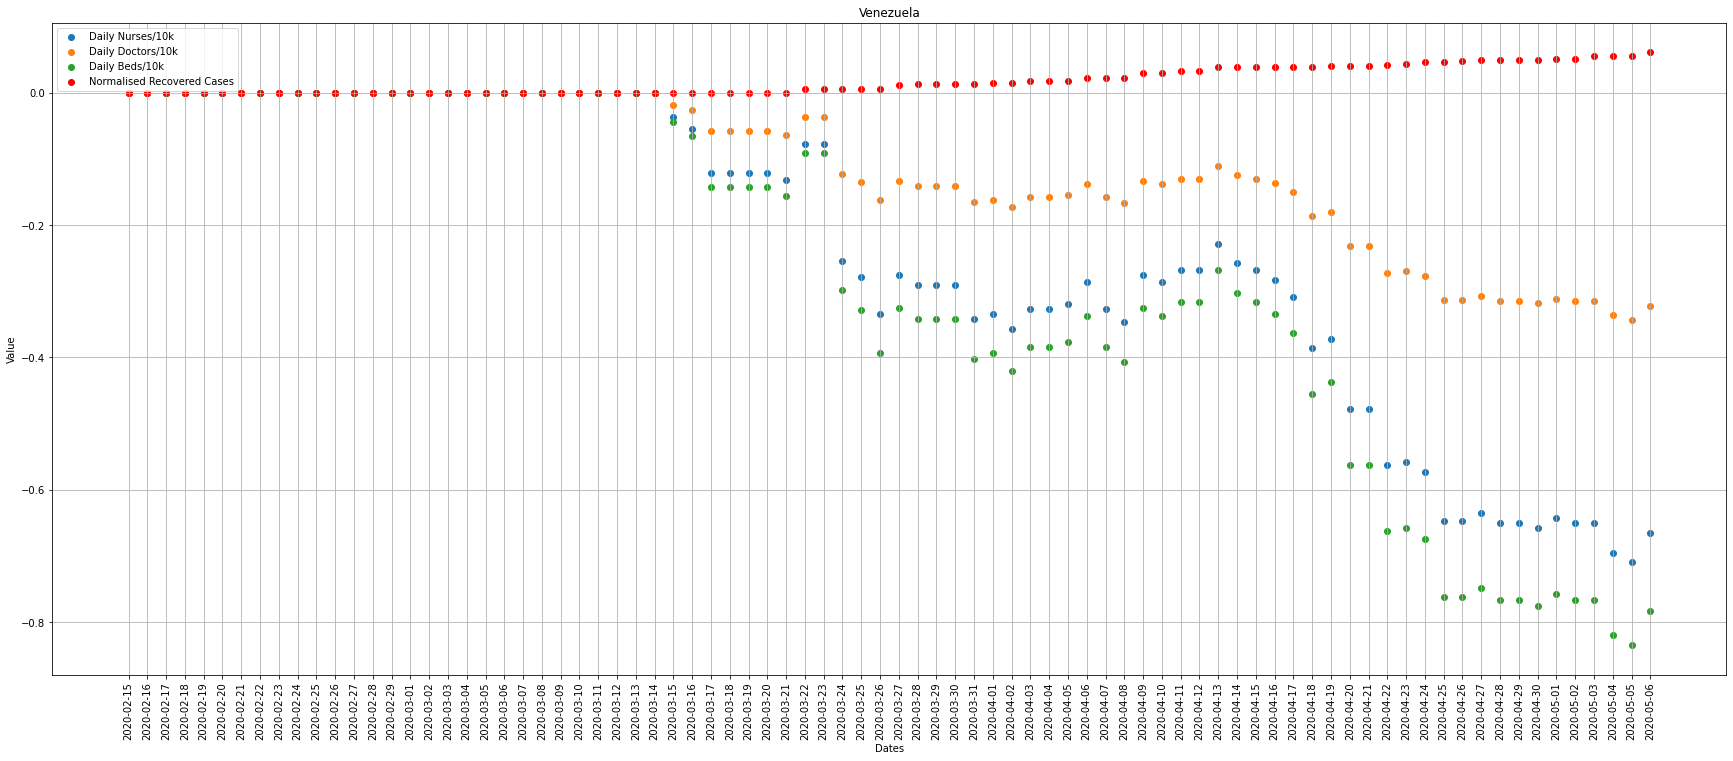

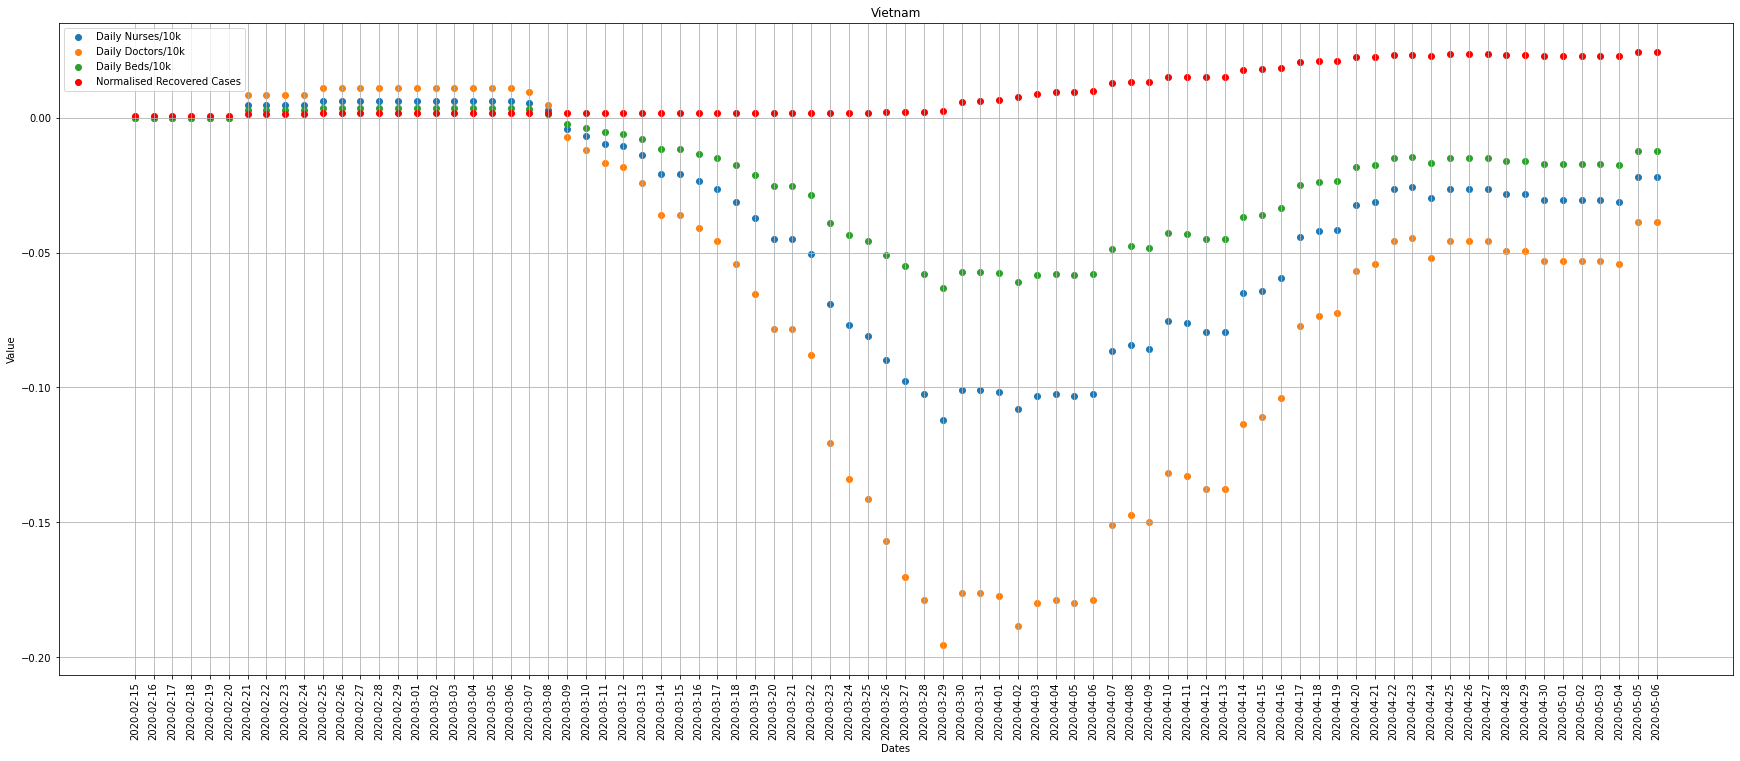

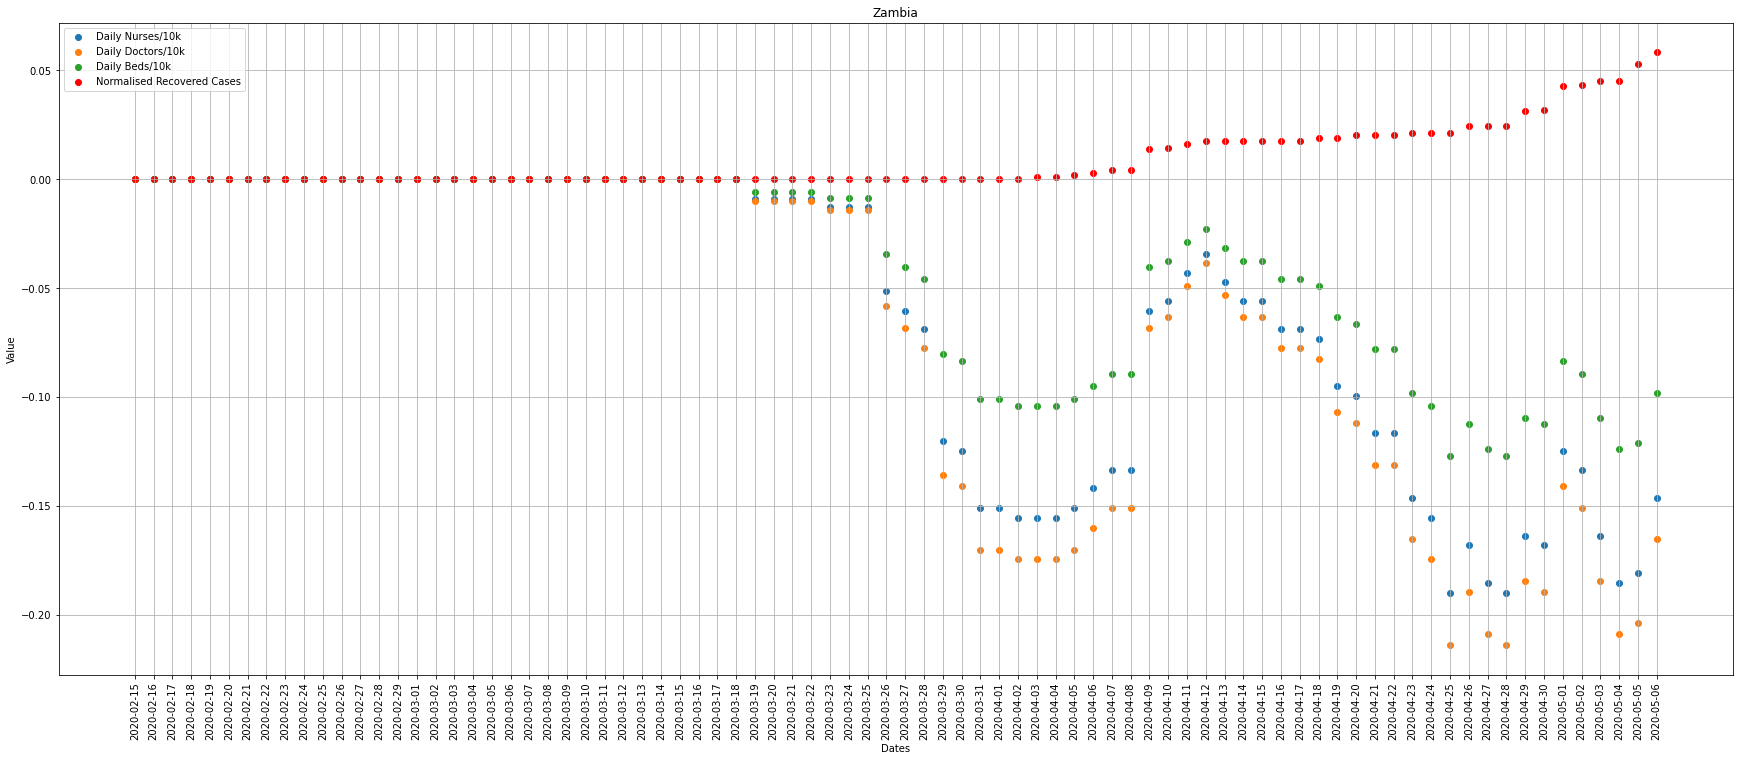

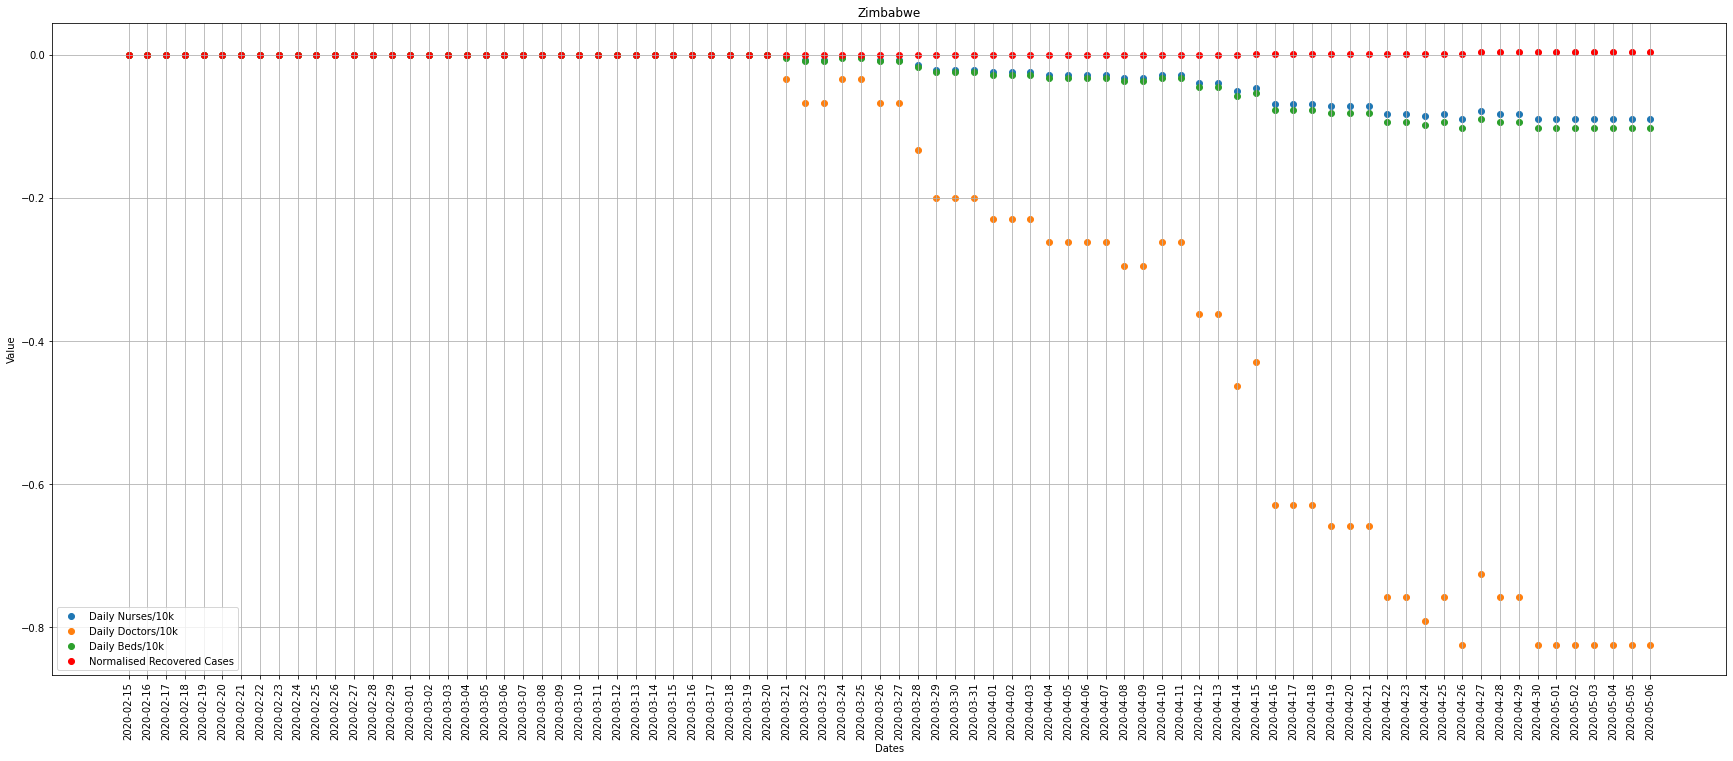

In [8]:
# plot_country('New Zealand')
for i in countries : 
  plot_country(i)